# Построение выборки для модели кредитного скоринга - 1 (разведочный анализ + WOE)

Загрузим данные соревнования https://www.kaggle.com/c/home-credit-default-risk/overview

In [351]:
# ! kaggle competitions download -c home-credit-default-risk

In [352]:
# ! mkdir data

In [353]:
# import zipfile
# with zipfile.ZipFile("home-credit-default-risk.zip","r") as zip_ref:
#     zip_ref.extractall("data")

In [354]:
import pandas as pd
import numpy as np

import helpers

In [355]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Посмотрим на данные. Отметим, что признаков очень много: 122.

# Таблица application

`
Основная таблица. Одна строка соответствует одной заявке.
`


- __SK_ID_CURR__ - ID of loan in our sample
- __TARGET__ - Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
- __NAME_CONTRACT_TYPE__ - Identification if loan is cash or revolving
- __CODE_GENDER__ - Gender of the client
- __FLAG_OWN_CAR__ - Flag if the client owns a car
- __FLAG_OWN_REALTY__ - Flag if client owns a house or flat
- __CNT_CHILDREN__ - Number of children the client has
- __AMT_INCOME_TOTAL__ - Income of the client
- __AMT_CREDIT__ - Credit amount of the loan
- __AMT_ANNUITY__ - Loan annuity
- __AMT_GOODS_PRICE__ - For consumer loans it is the price of the goods for which the loan is given
- __NAME_TYPE_SUITE__ - Who was accompanying client when he was applying for the loan
- __NAME_INCOME_TYPE__ - Clients income type (businessman, working, maternity leave,)
- __NAME_EDUCATION_TYPE__ - Level of highest education the client achieved
- __NAME_FAMILY_STATUS__ - Family status of the client
- __NAME_HOUSING_TYPE__ - What is the housing situation of the client (renting, living with parents, ...)
- __REGION_POPULATION_RELATIVE__ - Normalized population of region where client lives (higher number means the client lives in more populated region)
- __DAYS_BIRTH__ - Client's age in days at the time of application
- __DAYS_EMPLOYED__ - How many days before the application the person started current employment
- __DAYS_REGISTRATION__ - How many days before the application did client change his registration
- __DAYS_ID_PUBLISH__ - How many days before the application did client change the identity document with which he applied for the loan
- __OWN_CAR_AGE__ - Age of client's car
- __FLAG_MOBIL__ - Did client provide mobile phone (1=YES, 0=NO)
- __FLAG_EMP_PHONE__ - Did client provide work phone (1=YES, 0=NO)
- __FLAG_WORK_PHONE__ - Did client provide home phone (1=YES, 0=NO)
- __FLAG_CONT_MOBILE__ - Was mobile phone reachable (1=YES, 0=NO)
- __FLAG_PHONE__ - Did client provide home phone (1=YES, 0=NO)
- __FLAG_EMAIL__ - Did client provide email (1=YES, 0=NO)
- __OCCUPATION_TYPE__ - What kind of occupation does the client have
- __CNT_FAM_MEMBERS__ - How many family members does client have
- __REGION_RATING_CLIENT__ - Our rating of the region where client lives (1,2,3)
- __REGION_RATING_CLIENT_W_CITY__ - Our rating of the region where client lives with taking city into account (1,2,3)
- __WEEKDAY_APPR_PROCESS_START__ - On which day of the week did the client apply for the loan
- __HOUR_APPR_PROCESS_START__ - Approximately at what hour did the client apply for the loan
- __REG_REGION_NOT_LIVE_REGION__ - Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)
- __REG_REGION_NOT_WORK_REGION__ - Flag if client's permanent address does not match work address (1=different, 0=same, at region level)
- __LIVE_REGION_NOT_WORK_REGION__ - Flag if client's contact address does not match work address (1=different, 0=same, at region level)
- __REG_CITY_NOT_LIVE_CITY__ - Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)
- __REG_CITY_NOT_WORK_CITY__ - Flag if client's permanent address does not match work address (1=different, 0=same, at city level)
- __LIVE_CITY_NOT_WORK_CITY__ - Flag if client's contact address does not match work address (1=different, 0=same, at city level)
- __ORGANIZATION_TYPE__ - Type of organization where client works
- __EXT_SOURCE_1__ - Normalized score from external data source
- __EXT_SOURCE_2__ - Normalized score from external data source
- __EXT_SOURCE_3__ - Normalized score from external data source
- __APARTMENTS_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __BASEMENTAREA_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __YEARS_BEGINEXPLUATATION_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __YEARS_BUILD_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __COMMONAREA_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __ELEVATORS_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __ENTRANCES_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FLOORSMAX_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FLOORSMIN_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LANDAREA_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LIVINGAPARTMENTS_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LIVINGAREA_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __NONLIVINGAPARTMENTS_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __NONLIVINGAREA_AVG__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __APARTMENTS_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __BASEMENTAREA_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __YEARS_BEGINEXPLUATATION_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __YEARS_BUILD_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __COMMONAREA_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __ELEVATORS_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __ENTRANCES_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FLOORSMAX_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FLOORSMIN_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LANDAREA_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LIVINGAPARTMENTS_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LIVINGAREA_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __NONLIVINGAPARTMENTS_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __NONLIVINGAREA_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __APARTMENTS_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __BASEMENTAREA_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __YEARS_BEGINEXPLUATATION_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __YEARS_BUILD_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __COMMONAREA_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __ELEVATORS_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __ENTRANCES_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FLOORSMAX_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FLOORSMIN_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LANDAREA_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LIVINGAPARTMENTS_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __LIVINGAREA_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __NONLIVINGAPARTMENTS_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __NONLIVINGAREA_MEDI__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __FONDKAPREMONT_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __HOUSETYPE_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __TOTALAREA_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __WALLSMATERIAL_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __EMERGENCYSTATE_MODE__ - Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
- __OBS_30_CNT_SOCIAL_CIRCLE__ - How many observation of client's social surroundings with observable 30 DPD (days past due) default
- __DEF_30_CNT_SOCIAL_CIRCLE__ - How many observation of client's social surroundings defaulted on 30 DPD (days past due) 
- __OBS_60_CNT_SOCIAL_CIRCLE__ - How many observation of client's social surroundings with observable 60 DPD (days past due) default
- __DEF_60_CNT_SOCIAL_CIRCLE__ - How many observation of client's social surroundings defaulted on 60 (days past due) DPD
- __DAYS_LAST_PHONE_CHANGE__ - How many days before application did client change phone
- __FLAG_DOCUMENT_2__ - Did client provide document 2
- __FLAG_DOCUMENT_3__ - Did client provide document 3
- __FLAG_DOCUMENT_4__ - Did client provide document 4
- __FLAG_DOCUMENT_5__ - Did client provide document 5
- __FLAG_DOCUMENT_6__ - Did client provide document 6
- __FLAG_DOCUMENT_7__ - Did client provide document 7
- __FLAG_DOCUMENT_8__ - Did client provide document 8
- __FLAG_DOCUMENT_9__ - Did client provide document 9
- __FLAG_DOCUMENT_10__ - Did client provide document 10
- __FLAG_DOCUMENT_11__ - Did client provide document 11
- __FLAG_DOCUMENT_12__ - Did client provide document 12
- __FLAG_DOCUMENT_13__ - Did client provide document 13
- __FLAG_DOCUMENT_14__ - Did client provide document 14
- __FLAG_DOCUMENT_15__ - Did client provide document 15
- __FLAG_DOCUMENT_16__ - Did client provide document 16
- __FLAG_DOCUMENT_17__ - Did client provide document 17
- __FLAG_DOCUMENT_18__ - Did client provide document 18
- __FLAG_DOCUMENT_19__ - Did client provide document 19
- __FLAG_DOCUMENT_20__ - Did client provide document 20
- __FLAG_DOCUMENT_21__ - Did client provide document 21
- __AMT_REQ_CREDIT_BUREAU_HOUR__ - Number of enquiries to Credit Bureau about the client one hour before application
- __AMT_REQ_CREDIT_BUREAU_DAY__ - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)
- __AMT_REQ_CREDIT_BUREAU_WEEK__ - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)
- __AMT_REQ_CREDIT_BUREAU_MON__ - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application)
- __AMT_REQ_CREDIT_BUREAU_QRT__ - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
- __AMT_REQ_CREDIT_BUREAU_YEAR__ - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)


In [356]:
application = pd.read_csv('data/application_train.csv')
application_test = pd.read_csv('data/application_test.csv')
application.sample(7, random_state=57)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
170430      297531       0         Cash loans           M            Y   
77136       189440       0         Cash loans           F            Y   
236101      373468       0         Cash loans           F            Y   
139065      261246       0         Cash loans           F            N   
240305      378297       0         Cash loans           M            Y   
128737      249323       0         Cash loans           M            Y   
37088       142958       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
170430               N             0          157500.0    679500.0   
77136                Y             0          220500.0    432567.0   
236101               Y             0           90000.0    254700.0   
139065               Y             0          180000.0    724261.5   
240305               N             0          270000.0    761949.0   
128737               N             0          270000.0    497520.0   
37088                Y             0          135000.0    770292.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
170430      27076.5         679500.0   Unaccompanied  Commercial associate   
77136       19183.5         328500.0          Family               Working   
236101      14350.5         225000.0          Family             Pensioner   
139065      32031.0         576000.0   Unaccompanied             Pensioner   
240305      51048.0         697500.0   Unaccompanied  Commercial associate   
128737      36054.0         450000.0   Unaccompanied               Working   
37088       32764.5         688500.0          Family               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
170430  Secondary / secondary special               Married   
77136   Secondary / secondary special             Separated   
236101  Secondary / secondary special               Married   
139065  Secondary / secondary special               Married   
240305  Secondary / secondary special  Single / not married   
128737               Higher education               Married   
37088   Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
170430  House / apartment                    0.026392      -14705   
77136   House / apartment                    0.018029      -20590   
236101  House / apartment                    0.035792      -23878   
139065  House / apartment                    0.018850      -22840   
240305  House / apartment                    0.014464      -10902   
128737       With parents                    0.024610      -12316   
37088   House / apartment                    0.016612      -18215   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  \
170430          -7272            -6238.0             -220          8.0   
77136            -708            -1768.0            -4081         11.0   
236101         365243            -9575.0            -4358         15.0   
139065         365243           -13328.0            -4406          NaN   
240305          -1095            -2148.0            -2148         10.0   
128737          -2555            -6377.0            -4566          8.0   
37088          -10345            -7312.0            -1762         14.0   

        FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  \
170430           1               1                0                 1   
77136            1               1                0                 1   
236101           1               0                0                 1   
139065           1               0                0                 1   
240305           1               1                0                 1   
128737           1               1                1                 1   
37088            1               1                0                

In [357]:
application.shape

(307511, 122)

С таким большим количеством колонок работать неудобно. Разобьем их на группы.

In [358]:
FLAG_DOCUMENT_GROUP = ['FLAG_DOCUMENT_%s' % i for i in range(2, 22)]
TARGET_GROUP = ['TARGET']
GENERAL_BIO_GROUP = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
                     'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
                     'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
                     'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                     'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE',
                     'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']
DAYS_BIO_GROUP = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']
AMT_GROUP = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE'] + [
    'AMT_REQ_CREDIT_BUREAU_%s' % i for i in ['HOUR', 'DAY', 'WEEK', 'MON', 'QRT', 'YEAR']]
REGION_GROUP = ['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION', 
                'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REGION_POPULATION_RELATIVE']
APARTMENT_GROUP = ['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
                   'COMMONAREA_AVG', 'ELEVATORS_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
                   'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
                   'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
                   'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
                   'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
                   'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
                   'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
                   'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                   'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
                   'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
                   'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
SOCIAL_CIRCLE_GROUP = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
APPR_PROCESS_GROUP = ['HOUR_APPR_PROCESS_START', 'WEEKDAY_APPR_PROCESS_START']
EXT_SOURCE_GROUP = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
OTHER_GROUP = ['ENTRANCES_AVG', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE']
USELESS_FEATURES = []


In [359]:
ALL_COLUMNS = set(application.columns)
COLUMNS_IN_GROUPS = FLAG_DOCUMENT_GROUP + TARGET_GROUP + GENERAL_BIO_GROUP + DAYS_BIO_GROUP +\
                    AMT_GROUP + REGION_GROUP + APARTMENT_GROUP + SOCIAL_CIRCLE_GROUP +\
                    APPR_PROCESS_GROUP + EXT_SOURCE_GROUP + OTHER_GROUP
print(len(ALL_COLUMNS) == len(COLUMNS_IN_GROUPS), len(ALL_COLUMNS), len(COLUMNS_IN_GROUPS))
print(set(COLUMNS_IN_GROUPS) == set(ALL_COLUMNS), set(ALL_COLUMNS) - set(COLUMNS_IN_GROUPS))

True 122 122
True set()


Посмотрим на различные общие статистики по данным

In [360]:
column_statistics = helpers.get_df_general_stats(application)
column_statistics_test = helpers.get_df_general_stats(application_test)

## Анализ пропущенных данных

Train

In [361]:
nan_cols = helpers.get_nan_cols_stats(column_statistics)
nan_cols.head(67)

Число признаков, у которых в данных есть пропуски: 67 из 122


CountNaN  RateNaN%  CountUnique      MinValue  \
COMMONAREA_MEDI                 214865        69         3202  0.000000e+00   
NONLIVINGAPARTMENTS_MEDI        213514        69          214  0.000000e+00   
NONLIVINGAPARTMENTS_MODE        213514        69          167  0.000000e+00   
NONLIVINGAPARTMENTS_AVG         213514        69          386  0.000000e+00   
COMMONAREA_AVG                  214865        69         3181  0.000000e+00   
COMMONAREA_MODE                 214865        69         3128  0.000000e+00   
LIVINGAPARTMENTS_MODE           210199        68          736  0.000000e+00   
FONDKAPREMONT_MODE              210295        68            4           NaN   
LIVINGAPARTMENTS_AVG            210199        68         1868  0.000000e+00   
LIVINGAPARTMENTS_MEDI           210199        68         1097  0.000000e+00   
FLOORSMIN_MODE                  208642        67           25  0.000000e+00   
FLOORSMIN_AVG                   208642        67          305  0.000000e+00   
FLOORSMIN_MEDI                  208642        67           47  0.000000e+00   
YEARS_BUILD_AVG                 204488        66          149  0.000000e+00   
YEARS_BUILD_MEDI                204488        66          151  0.000000e+00   
YEARS_BUILD_MODE                204488        66          154  0.000000e+00   
OWN_CAR_AGE                     202929        65           62  0.000000e+00   
LANDAREA_AVG                    182590        59         3527  0.000000e+00   
LANDAREA_MEDI                   182590        59         3560  0.000000e+00   
LANDAREA_MODE                   182590        59         3563  0.000000e+00   
BASEMENTAREA_MEDI               179943        58         3772  0.000000e+00   
BASEMENTAREA_AVG                179943        58         3780  0.000000e+00   
BASEMENTAREA_MODE               179943        58         3841  0.000000e+00   
EXT_SOURCE_1                    173378        56       114584  1.456813e-02   
NONLIVINGAREA_MEDI              169682        55         3323  0.000000e+00   
NONLIVINGAREA_MODE              169682        55         3327  0.000000e+00   
NONLIVINGAREA_AVG               169682        55         3290  0.000000e+00   
ELEVATORS_MEDI                  163891        53           46  0.000000e+00   
ELEVATORS_MODE                  163891        53           26  0.000000e+00   
ELEVATORS_AVG                   163891        53          257  0.000000e+00   
ENTRANCES_MODE                  154828        50           30  0.000000e+00   
APARTMENTS_AVG                  156061        50         2339  0.000000e+00   
WALLSMATERIAL_MODE              156341        50            7           NaN   
HOUSETYPE_MODE                  154297        50            3           NaN   
LIVINGAREA_MODE                 154350        50         5301  0.000000e+00   
APARTMENTS_MODE                 156061        50          760  0.000000e+00   
LIVINGAREA_AVG                  154350        50         5199  0.000000e+00   
APARTMENTS_MEDI                 156061        50         1148  0.000000e+00   
LIVINGAREA_MEDI                 154350        50         5281  0.000000e+00   
ENTRANCES_AVG                   154828        50          285  0.000000e+00   
ENTRANCES_MEDI                  154828        50           46  0.000000e+00   
FLOORSMAX_AVG                   153020        49          403  0.000000e+00   
FLOORSMAX_MODE                  153020        49           25  0.000000e+00   
FLOORSMAX_MEDI                  153020        49           49  0.000000e+00   
TOTALAREA_MODE                  148431        48         5116  0.000000e+00   
YEARS_BEGINEXPLUATATION_AVG     150007        48          285  0.000000e+00   
YEARS_BEGINEXPLUATATION_MEDI    150007        48          245  0.000000e+00   
YEARS_BEGINEXPLUATATION_MODE    150007        48          221  0.000000e+00   
EMERGENCYSTATE_MODE             145755        47            2           NaN   
OCCUPATION_TYPE                  96391        31           18           NaN   
E

Test

In [362]:
nan_cols_test = helpers.get_nan_cols_stats(column_statistics_test)
nan_cols_test.head(10)

Число признаков, у которых в данных есть пропуски: 64 из 121


CountNaN  RateNaN%  CountUnique  MinValue  MaxValue  \
NONLIVINGAPARTMENTS_MODE     33347        68          106       0.0       1.0   
NONLIVINGAPARTMENTS_MEDI     33347        68          134       0.0       1.0   
NONLIVINGAPARTMENTS_AVG      33347        68          241       0.0       1.0   
COMMONAREA_AVG               33495        68         2042       0.0       1.0   
COMMONAREA_MODE              33495        68         2001       0.0       1.0   
COMMONAREA_MEDI              33495        68         2034       0.0       1.0   
FONDKAPREMONT_MODE           32797        67            4       NaN       NaN   
LIVINGAPARTMENTS_MEDI        32780        67          843       0.0       1.0   
LIVINGAPARTMENTS_MODE        32780        67          602       0.0       1.0   
LIVINGAPARTMENTS_AVG         32780        67         1211       0.0       1.0   

                              Mean       Std  Median  
NONLIVINGAPARTMENTS_MODE  0.008358  0.046657  0.0000  
NONLIVINGAPARTMENTS_MEDI  0.008979  0.048148  0.0000  
NONLIVINGAPARTMENTS_AVG   0.009231  0.048749  0.0000  
COMMONAREA_AVG            0.047624  0.082868  0.0227  
COMMONAREA_MODE           0.045223  0.081169  0.0203  
COMMONAREA_MEDI           0.047420  0.082892  0.0223  
FONDKAPREMONT_MODE             NaN       NaN     NaN  
LIVINGAPARTMENTS_MEDI     0.107063  0.099737  0.0770  
LIVINGAPARTMENTS_MODE     0.110874  0.103980  0.0817  
LIVINGAPARTMENTS_AVG      0.105885  0.098284  0.0756

В таблице очень много признаков с большим процентом пропущенных значений.
С этим придется что-то сделать в дальнейшем, пока непонятно, какой метод обработки пропусков предпочтительнее.

In [363]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

Функции для составления/визуализации статистик

In [364]:
def draw_pies_for_columns(columns, dff):
    for col in columns:
        counts = Counter(dff[col])
        df = pd.DataFrame.from_dict(counts, orient='index')
        df.index.name = col
        df.columns = ['count']
        df.plot(kind='pie', rot=0, figsize=(5, 5), y='count', autopct='%1.1f%%')
        plt.title('Data distribution by %s' % col)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()
        
def draw_hists_for_categorical_columns(columns, dff):
    for col in columns:
        counts = Counter(dff[col])
        df = pd.DataFrame.from_dict(counts, orient='index')
        df.index.name = col
        df.columns = ['count']
        df.plot(kind='bar', rot=90, figsize=(15,4))
        plt.title('Data distribution by %s' % col)
        plt.xlabel(col)
        plt.ylabel('count')
        plt.show()
        
def draw_hists_for_numerical_columns(columns, dff):
    for col in columns:
        plt.figure(figsize=(16,6))
        plt.hist(dff[col], bins=50)
        plt.title('Data distribution by %s' % col)
        plt.xlabel(col)
        plt.show()

def draw_correlations_for_numerical_columns(columns, dff):
    plt.figure(figsize=(18, 18))
    cor = dff[columns].corr()
    sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
    plt.show()

def get_df_general_stats(df):
    column_statistics = pd.DataFrame(index=df.columns)
    column_statistics['CountNaN'] = df.isna().sum()
    column_statistics['RateNaN%'] = (df.isna().sum() / df.shape[0] * 100).astype(int)
    column_statistics['CountUnique'] = df.nunique()
    described = df.describe()
    column_statistics['MinValue'] = described.loc['min']
    column_statistics['MaxValue'] = described.loc['max']
    column_statistics['Mean'] = described.loc['mean']
    column_statistics['Std'] = described.loc['std']
    column_statistics['Median'] = described.loc['50%']
    return column_statistics

С данными целиком работать сложно, поэтому для начала посмотрим на различные группы.

## Анализ групп признаков

### GENERAL_BIO_GROUP - общие признаки клиента

In [365]:
general_bio_application = application[GENERAL_BIO_GROUP]

In [366]:
general_bio_application.sample(7, random_state=57)

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN NAME_TYPE_SUITE  \
170430           M            Y               N             0   Unaccompanied   
77136            F            Y               Y             0          Family   
236101           F            Y               Y             0          Family   
139065           F            N               Y             0   Unaccompanied   
240305           M            Y               N             0   Unaccompanied   
128737           M            Y               N             0   Unaccompanied   
37088            M            Y               Y             0          Family   

            NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
170430  Commercial associate  Secondary / secondary special   
77136                Working  Secondary / secondary special   
236101             Pensioner  Secondary / secondary special   
139065             Pensioner  Secondary / secondary special   
240305  Commercial associate  Secondary / secondary special   
128737               Working               Higher education   
37088                Working  Secondary / secondary special   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  FLAG_MOBIL  \
170430               Married  House / apartment         Drivers           1   
77136              Separated  House / apartment        Laborers           1   
236101               Married  House / apartment             NaN           1   
139065               Married  House / apartment             NaN           1   
240305  Single / not married  House / apartment     Sales staff           1   
128737               Married       With parents        Managers           1   
37088                Married  House / apartment        Laborers           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
170430               1                0                 1           1   
77136                1                0                 1           0   
236101               0                0                 1           1   
139065               0                0                 1           0   
240305               1                0                 1           0   
128737               1                1                 1           0   
37088                1                0                 1           1   

        FLAG_EMAIL  CNT_FAM_MEMBERS       ORGANIZATION_TYPE  OWN_CAR_AGE  \
170430           0              2.0        Industry: type 7          8.0   
77136            0              1.0              Government         11.0   
236101           0              2.0                     XNA         15.0   
139065           0              2.0                     XNA          NaN   
240305           0              1.0           Trade: type 7         10.0   
128737           0              2.0  Business Entity Type 3          8.0   
37088            0              2.0  Business Entity Type 2         14.0   

        DAYS_LAST_PHONE_CHANGE  
170430                 -2252.0  
77136                   -119.0  
236101                 -2400.0  
139065                 -1695.0  
240305                 -1479.0  
128737                 -2747.0  
37088                  -1133.0

In [367]:
get_df_general_stats(general_bio_application)

CountNaN  RateNaN%  CountUnique  MinValue  MaxValue  \
CODE_GENDER                    0         0            3       NaN       NaN   
FLAG_OWN_CAR                   0         0            2       NaN       NaN   
FLAG_OWN_REALTY                0         0            2       NaN       NaN   
CNT_CHILDREN                   0         0           15       0.0      19.0   
NAME_TYPE_SUITE             1292         0            7       NaN       NaN   
NAME_INCOME_TYPE               0         0            8       NaN       NaN   
NAME_EDUCATION_TYPE            0         0            5       NaN       NaN   
NAME_FAMILY_STATUS             0         0            6       NaN       NaN   
NAME_HOUSING_TYPE              0         0            6       NaN       NaN   
OCCUPATION_TYPE            96391        31           18       NaN       NaN   
FLAG_MOBIL                     0         0            2       0.0       1.0   
FLAG_EMP_PHONE                 0         0            2       0.0       1.0   
FLAG_WORK_PHONE                0         0            2       0.0       1.0   
FLAG_CONT_MOBILE               0         0            2       0.0       1.0   
FLAG_PHONE                     0         0            2       0.0       1.0   
FLAG_EMAIL                     0         0            2       0.0       1.0   
CNT_FAM_MEMBERS                2         0           17       1.0      20.0   
ORGANIZATION_TYPE              0         0           58       NaN       NaN   
OWN_CAR_AGE               202929        65           62       0.0      91.0   
DAYS_LAST_PHONE_CHANGE         1         0         3773   -4292.0       0.0   

                              Mean         Std  Median  
CODE_GENDER                    NaN         NaN     NaN  
FLAG_OWN_CAR                   NaN         NaN     NaN  
FLAG_OWN_REALTY                NaN         NaN     NaN  
CNT_CHILDREN              0.417052    0.722121     0.0  
NAME_TYPE_SUITE                NaN         NaN     NaN  
NAME_INCOME_TYPE               NaN         NaN     NaN  
NAME_EDUCATION_TYPE            NaN         NaN     NaN  
NAME_FAMILY_STATUS             NaN         NaN     NaN  
NAME_HOUSING_TYPE              NaN         NaN     NaN  
OCCUPATION_TYPE                NaN         NaN     NaN  
FLAG_MOBIL                0.999997    0.001803     1.0  
FLAG_EMP_PHONE            0.819889    0.384280     1.0  
FLAG_WORK_PHONE           0.199368    0.399526     0.0  
FLAG_CONT_MOBILE          0.998133    0.043164     1.0  
FLAG_PHONE                0.281066    0.449521     0.0  
FLAG_EMAIL                0.056720    0.231307     0.0  
CNT_FAM_MEMBERS           2.152665    0.910682     2.0  
ORGANIZATION_TYPE              NaN         NaN     NaN  
OWN_CAR_AGE              12.061091   11.944812     9.0  
DAYS_LAST_PHONE_CHANGE -962.858788  826.808487  -757.0

Признаки с пропусками в данных: NAME_TYPE_SUITE, OCCUPATION_TYPE, OWN_CAR_AGE. Посмотрим на них отдельно, чтобы понять, что лучше сделать с пропусками.

#### NAME_TYPE_SUITE

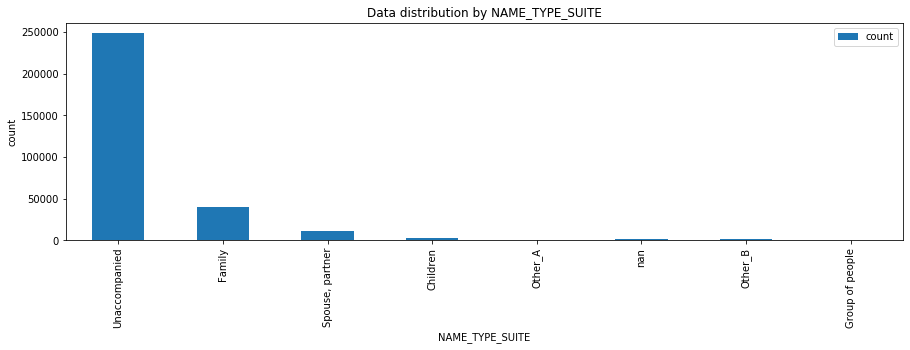

In [368]:
draw_hists_for_categorical_columns(['NAME_TYPE_SUITE'], general_bio_application)

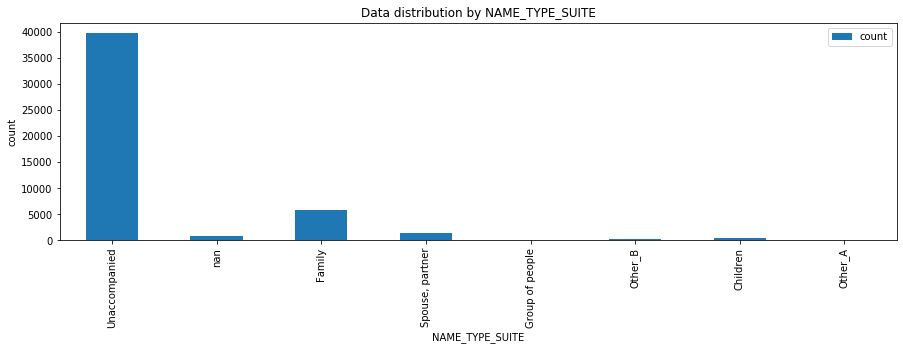

In [369]:
draw_hists_for_categorical_columns(['NAME_TYPE_SUITE'], application_test)

Заметим, что во всех колонках, кроме Unaccompanied и Family очень мало клиентов.

Поэтому объединим их вместе с Family в одну колонку Accompanied.

In [370]:
def update_data_NAME_TYPE_SUITE(df):
    df.loc[df['NAME_TYPE_SUITE'] != 'Unaccompanied', 'NAME_TYPE_SUITE'] = 'Accompanied'

In [371]:
update_data_NAME_TYPE_SUITE(general_bio_application)

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


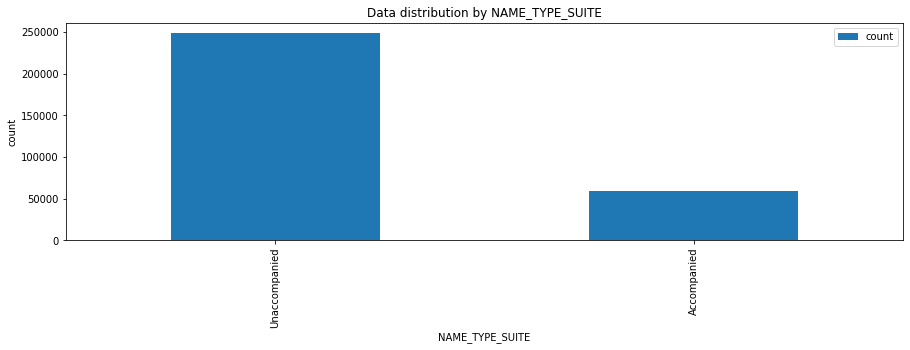

In [372]:
draw_hists_for_categorical_columns(['NAME_TYPE_SUITE'], general_bio_application)

In [373]:
x1 = application[application['NAME_TYPE_SUITE'] == 'Unaccompanied']
x2 = application[application['NAME_TYPE_SUITE'] != 'Unaccompanied']
print('Одиночные заявки в среднем не выплачиваются в {}% случаев'.format(100 * x1['TARGET'].mean()))
print('Совместные заявки в среднем не выплачиваются в {}% случаев'.format(100 * x2['TARGET'].mean()))

Одиночные заявки в среднем не выплачиваются в 8.183047246565751% случаев
Совместные заявки в среднем не выплачиваются в 7.6087140798508095% случаев


#### OCCUPATION_TYPE

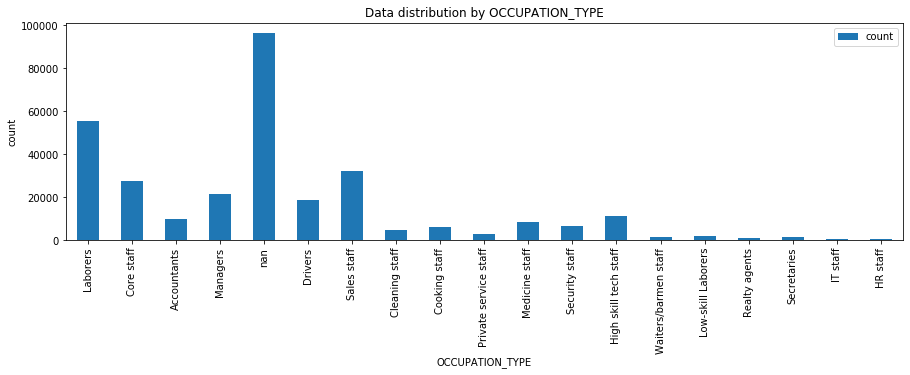

In [374]:
counts = Counter(general_bio_application['OCCUPATION_TYPE'])
df = pd.DataFrame.from_dict(counts, orient='index')
df.index.name = 'OCCUPATION_TYPE'
df.columns = ['count']
df.plot(kind='bar', rot=90, figsize=(15,4))
plt.title('Data distribution by %s' % 'OCCUPATION_TYPE')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('count')
plt.show()

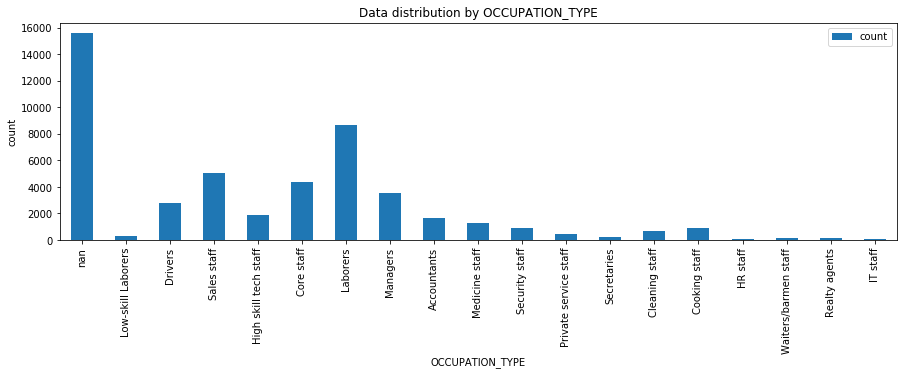

In [375]:
counts = Counter(application_test['OCCUPATION_TYPE'])
df = pd.DataFrame.from_dict(counts, orient='index')
df.index.name = 'OCCUPATION_TYPE'
df.columns = ['count']
df.plot(kind='bar', rot=90, figsize=(15,4))
plt.title('Data distribution by %s' % 'OCCUPATION_TYPE')
plt.xlabel('OCCUPATION_TYPE')
plt.ylabel('count')
plt.show()

In [376]:
for occupation in np.unique(
        application[~application['OCCUPATION_TYPE'].isna()]['OCCUPATION_TYPE']
):
    x1 = application[application['OCCUPATION_TYPE'] == occupation]
    x2 = application_test[application_test['OCCUPATION_TYPE'] == occupation]
    print(('Заявки для {} в среднем не выплачиваются в {}% случаев.'
           ' Таких заявок {} в train и {} в test').format(
        occupation, 100 * x1['TARGET'].mean(), x1.shape[0], x2.shape[0]))
x1 = application[application['OCCUPATION_TYPE'].isna()]
x2 = application_test[application['OCCUPATION_TYPE'].isna()]
print(('Заявки для nan в среднем не выплачиваются в {}% случаев.'
       ' Таких заявок {} в train и {} в test').format(
    100 * x1['TARGET'].mean(), x1.shape[0], x2.shape[0]))

Заявки для Accountants в среднем не выплачиваются в 4.830327117089575% случаев. Таких заявок 9813 в train и 1628 в test
Заявки для Cleaning staff в среднем не выплачиваются в 9.606705351386202% случаев. Таких заявок 4653 в train и 656 в test
Заявки для Cooking staff в среднем не выплачиваются в 10.443995963673057% случаев. Таких заявок 5946 в train и 894 в test
Заявки для Core staff в среднем не выплачиваются в 6.303953572723975% случаев. Таких заявок 27570 в train и 4361 в test
Заявки для Drivers в среднем не выплачиваются в 11.326130194054722% случаев. Таких заявок 18603 в train и 2773 в test
Заявки для HR staff в среднем не выплачиваются в 6.394316163410302% случаев. Таких заявок 563 в train и 104 в test
Заявки для High skill tech staff в среднем не выплачиваются в 6.1599297012302285% случаев. Таких заявок 11380 в train и 1854 в test
Заявки для IT staff в среднем не выплачиваются в 6.4638783269961975% случаев. Таких заявок 526 в train и 81 в test
Заявки для Laborers в среднем не вып

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


Конечно, это довольно проблемный признак, потому что сильное различие размеров классов. Но он кажется довольно полезным.

#### OWN_CAR_AGE

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


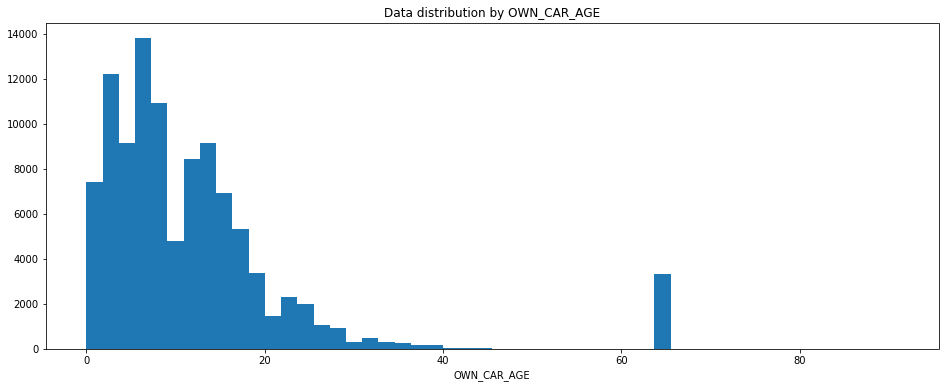

In [377]:
draw_hists_for_numerical_columns(['OWN_CAR_AGE'], general_bio_application)

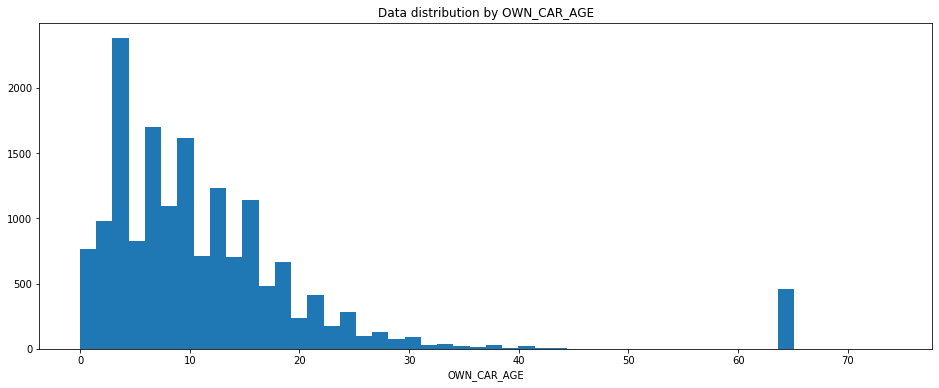

In [378]:
draw_hists_for_numerical_columns(['OWN_CAR_AGE'], application_test)

In [379]:
x1 = application[(application['OWN_CAR_AGE'] >= 60) & (~application['OWN_CAR_AGE'].isna())]
x2 = application[(application['OWN_CAR_AGE'] < 60) & (~application['OWN_CAR_AGE'].isna())]
x3 = application[application['OWN_CAR_AGE'].isna()]
x4 = application[(application['OWN_CAR_AGE'] == 0) & (~application['OWN_CAR_AGE'].isna())]
x5 = application[(application['OWN_CAR_AGE'] <= 8) & (~application['OWN_CAR_AGE'].isna())]
x6 = application[
    (application['OWN_CAR_AGE'] > 7) & (application['OWN_CAR_AGE'] <= 12) &\
    (~application['OWN_CAR_AGE'].isna())]
x7 = application[
    (application['OWN_CAR_AGE'] > 12) & (application['OWN_CAR_AGE'] < 60) &\
    (~application['OWN_CAR_AGE'].isna())]
print('>60 {}% случаев'.format(100 * x1['TARGET'].mean()))
print('<60 в {}% случаев'.format(100 * x2['TARGET'].mean()))
print('nan в {}% случаев'.format(100 * x3['TARGET'].mean()))
print('0 в {}% случаев'.format(100 * x4['TARGET'].mean()))
print('<=8 в {}% случаев'.format(100 * x5['TARGET'].mean()))
print('> 8; <= 12 в {}% случаев'.format(100 * x6['TARGET'].mean()))
print('> 12; <= 60 в {}% случаев'.format(100 * x7['TARGET'].mean()))

>60 8.385744234800839% случаев
<60 в 7.206424147842321% случаев
nan в 8.500017247411657% случаев
0 в 6.888472352389878% случаев
<=8 в 5.771333099564778% случаев
> 8; <= 12 в 7.264514524885003% случаев
> 12; <= 60 в 9.027174227939046% случаев


#### Остальные признаки

In [380]:
GENERAL_BIO_GROUP_CATEGORICAL_SMALL = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
                     'NAME_TYPE_SUITE',
                     'NAME_FAMILY_STATUS',
                     'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                     'FLAG_PHONE', 'FLAG_EMAIL']
GENERAL_BIO_GROUP_CATEGORICAL_BIG = ['CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_INCOME_TYPE', 
                                     'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE',
                                     'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']
GENERAL_BIO_GROUP_NUMERIC = ['OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE']

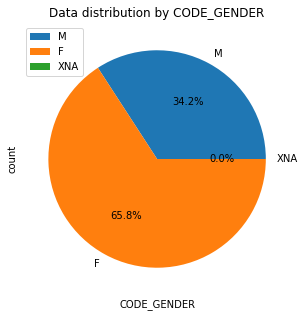

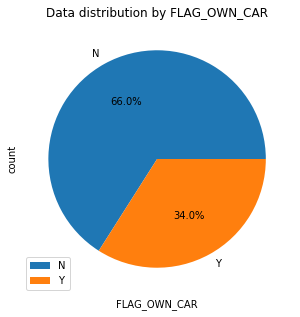

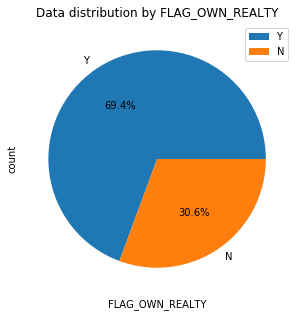

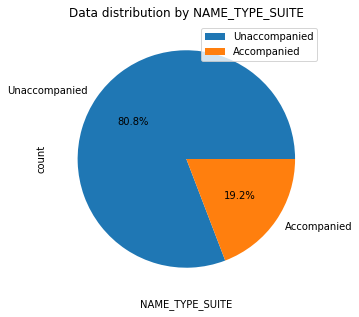

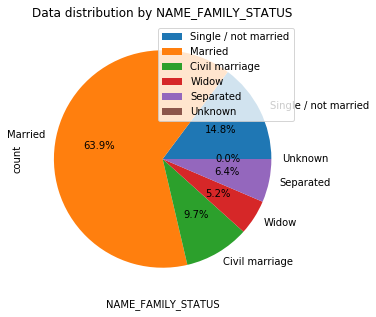

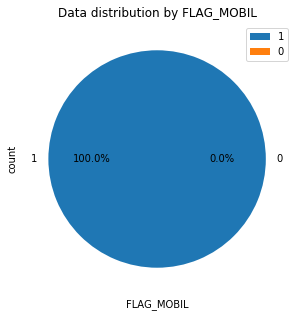

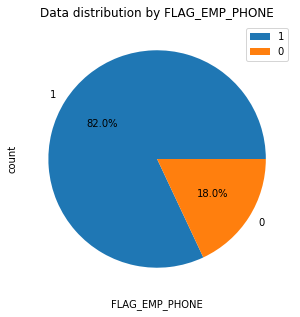

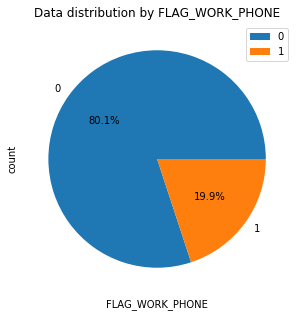

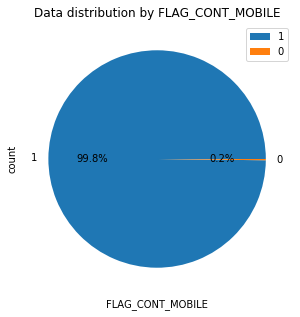

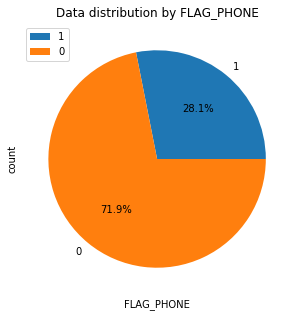

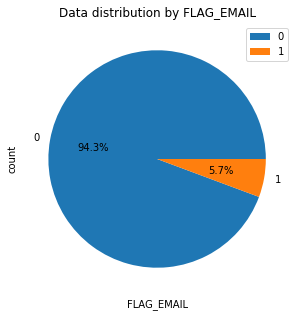

In [381]:
draw_pies_for_columns(GENERAL_BIO_GROUP_CATEGORICAL_SMALL, general_bio_application)

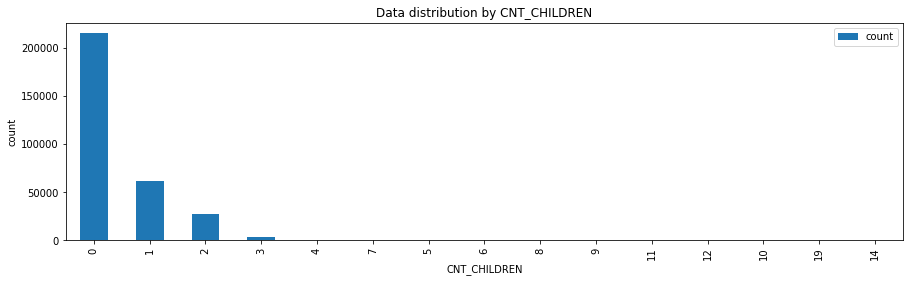

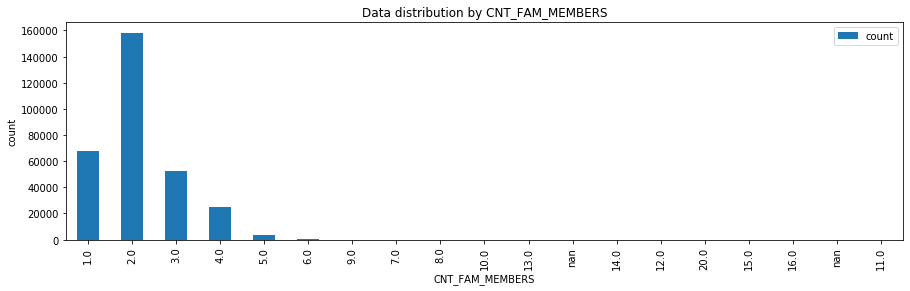

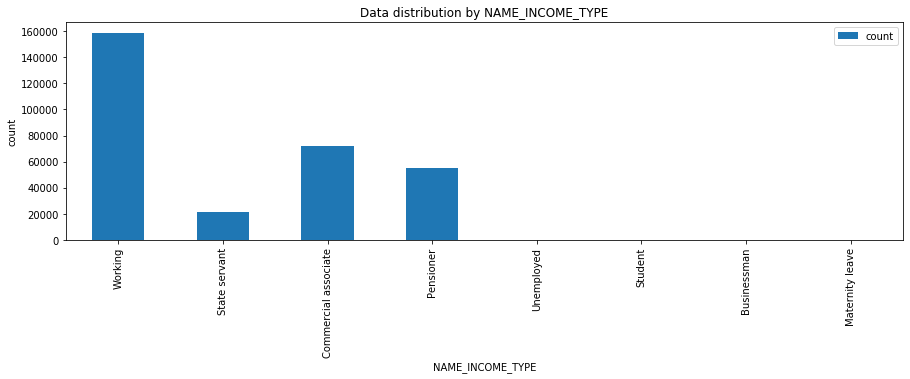

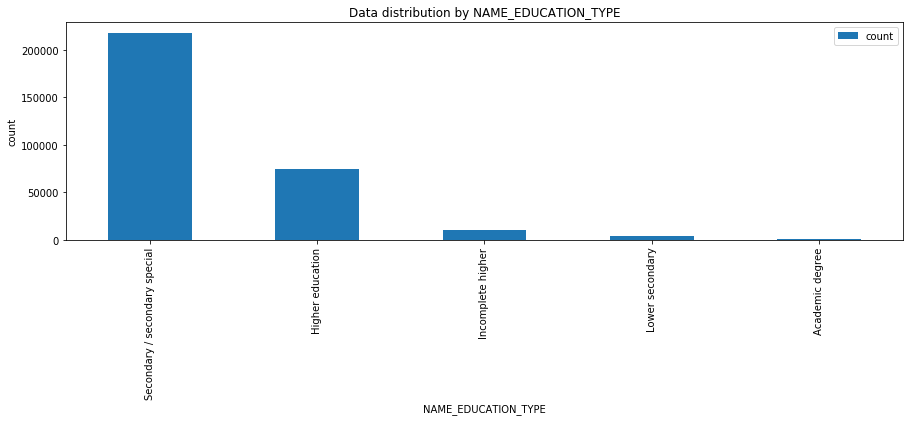

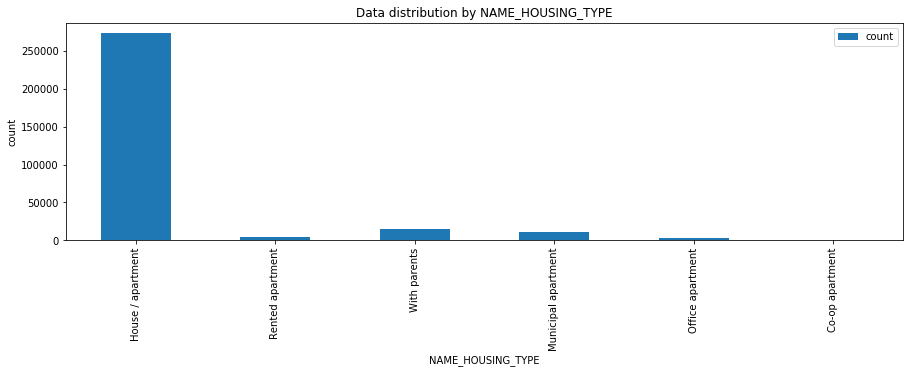

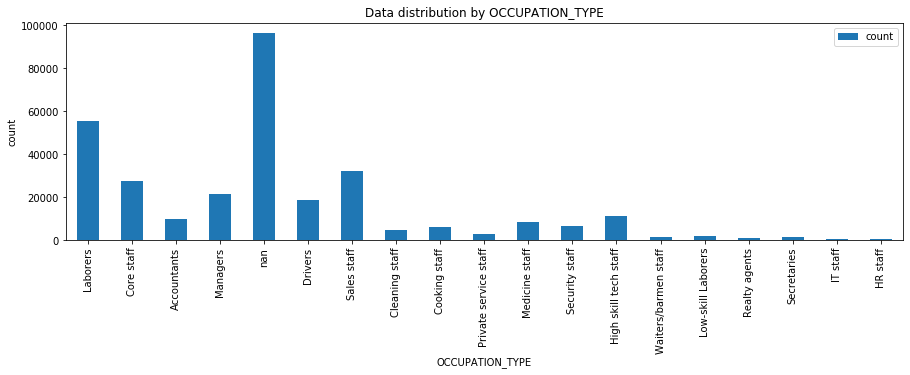

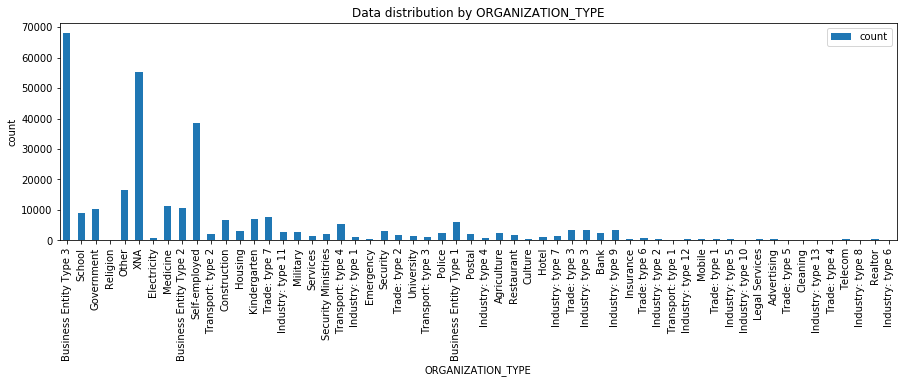

In [382]:
draw_hists_for_categorical_columns(GENERAL_BIO_GROUP_CATEGORICAL_BIG, general_bio_application)

In [383]:
feature = 'ORGANIZATION_TYPE'
for occupation in np.unique(
        application[~application[feature].isna()][feature]
):
    x1 = application[application[feature] == occupation]
    x2 = application_test[application_test[feature] == occupation]
    print(('Заявки для {} в среднем не выплачиваются в {}% случаев.'
           ' Таких заявок {} в train и {} в test').format(
        occupation, 100 * x1['TARGET'].mean(), x1.shape[0], x2.shape[0]))
x1 = application[application[feature].isna()]
x2 = application_test[application[feature].isna()]
print(('Заявки для nan в среднем не выплачиваются в {}% случаев.'
       ' Таких заявок {} в train и {} в test').format(
    100 * x1['TARGET'].mean(), x1.shape[0], x2.shape[0]))

Заявки для Advertising в среднем не выплачиваются в 8.158508158508159% случаев. Таких заявок 429 в train и 71 в test
Заявки для Agriculture в среднем не выплачиваются в 10.472697636511818% случаев. Таких заявок 2454 в train и 292 в test
Заявки для Bank в среднем не выплачиваются в 5.1854806541683285% случаев. Таких заявок 2507 в train и 374 в test
Заявки для Business Entity Type 1 в среднем не выплачиваются в 8.13836898395722% случаев. Таких заявок 5984 в train и 887 в test
Заявки для Business Entity Type 2 в среднем не выплачиваются в 8.528380555292333% случаев. Таких заявок 10553 в train и 1479 в test
Заявки для Business Entity Type 3 в среднем не выплачиваются в 9.299623485115896% случаев. Таких заявок 67992 в train и 10840 в test
Заявки для Cleaning в среднем не выплачиваются в 11.153846153846155% случаев. Таких заявок 260 в train и 43 в test
Заявки для Construction в среднем не выплачиваются в 11.679809552149978% случаев. Таких заявок 6721 в train и 1039 в test
Заявки для Culture 

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


In [384]:
general_bio_application.groupby(['NAME_INCOME_TYPE']).count()

CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
NAME_INCOME_TYPE                                                   
Businessman                    10            10               10   
Commercial associate        71617         71617            71617   
Maternity leave                 5             5                5   
Pensioner                   55362         55362            55362   
State servant               21703         21703            21703   
Student                        18            18               18   
Unemployed                     22            22               22   
Working                    158774        158774           158774   

                      CNT_CHILDREN  NAME_TYPE_SUITE  NAME_EDUCATION_TYPE  \
NAME_INCOME_TYPE                                                           
Businessman                     10               10                   10   
Commercial associate         71617            71617                71617   
Maternity leave                  5                5                    5   
Pensioner                    55362            55362                55362   
State servant                21703            21703                21703   
Student                         18               18                   18   
Unemployed                      22               22                   22   
Working                     158774           158774               158774   

                      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  OCCUPATION_TYPE  \
NAME_INCOME_TYPE                                                               
Businessman                           10                 10                8   
Commercial associate               71617              71617            59320   
Maternity leave                        5                  5                4   
Pensioner                          55362              55362                5   
State servant                      21703              21703            17916   
Student                               18                 18               13   
Unemployed                            22                 22                0   
Working                           158774             158774           133854   

                      FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
NAME_INCOME_TYPE                                                    
Businessman                   10              10               10   
Commercial associate       71617           71617            71617   
Maternity leave                5               5                5   
Pensioner                  55362           55362            55362   
State servant              21703           21703            21703   
Student                       18              18               18   
Unemployed                    22              22               22   
Working                   158774          158774           158774   

                      FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
NAME_INCOME_TYPE                                                 
Businessman                         10          10          10   
Commercial associate             71617       71617       71617   
Maternity leave                      5           5           5   
Pensioner                        55362       55362       55362   
State servant                    21703       21703       21703   
Student                             18          18          18   
Unemployed                          22          22          22   
Working                         158774      158774      158774   

                      CNT_FAM_MEMBERS  ORGANIZATION_TYPE  OWN_CAR_AGE  \
NAME_INCOME_TYPE                                                        
Businessman                        10                 10            8   
Commercial associate            71615              71617        28038   
Maternity leave                     5                  5            1   
Pensioner                       55362              55362      

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


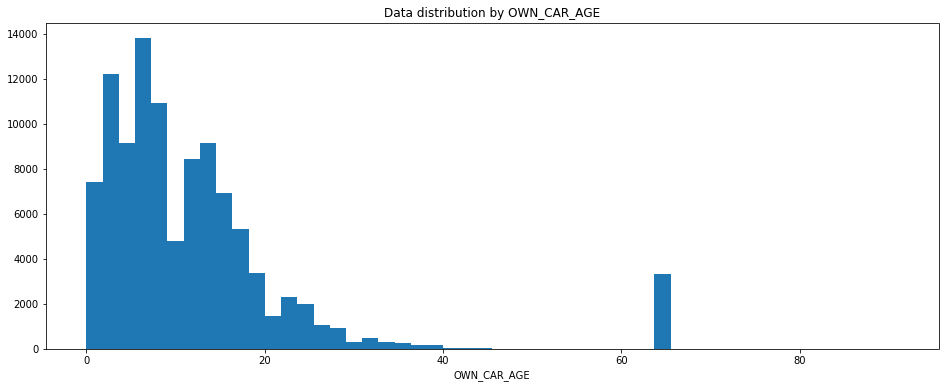

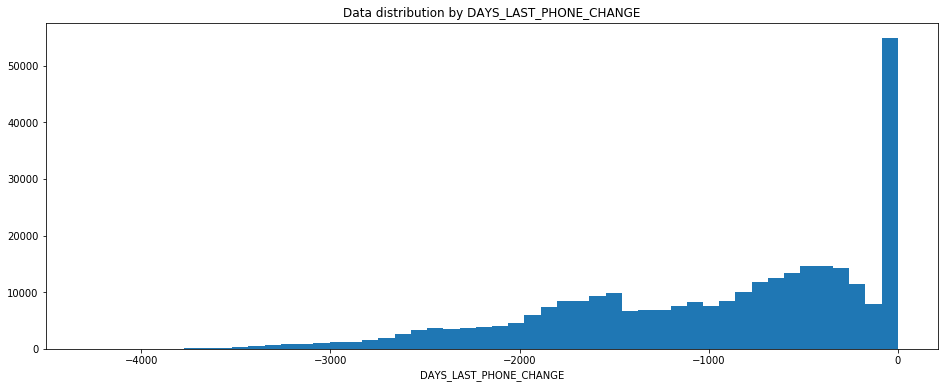

In [385]:
draw_hists_for_numerical_columns(GENERAL_BIO_GROUP_NUMERIC, general_bio_application)

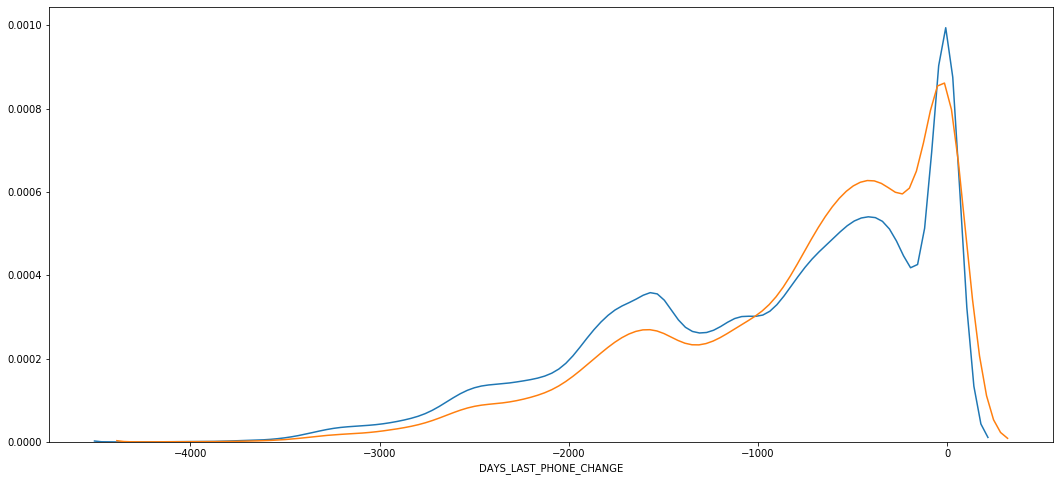

In [386]:
plt.figure(figsize=(18, 8))

sns.distplot(application[application['TARGET'] == 0]['DAYS_LAST_PHONE_CHANGE'], 
             hist=False)
sns.distplot(application[application['TARGET'] == 1]['DAYS_LAST_PHONE_CHANGE'], 
             hist=False)
plt.show()

### DAYS_BIO_GROUP

In [387]:
days_bio_application = application[DAYS_BIO_GROUP]
days_bio_application.sample(7, random_state=57)

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH
170430      -14705          -7272            -6238.0             -220
77136       -20590           -708            -1768.0            -4081
236101      -23878         365243            -9575.0            -4358
139065      -22840         365243           -13328.0            -4406
240305      -10902          -1095            -2148.0            -2148
128737      -12316          -2555            -6377.0            -4566
37088       -18215         -10345            -7312.0            -1762

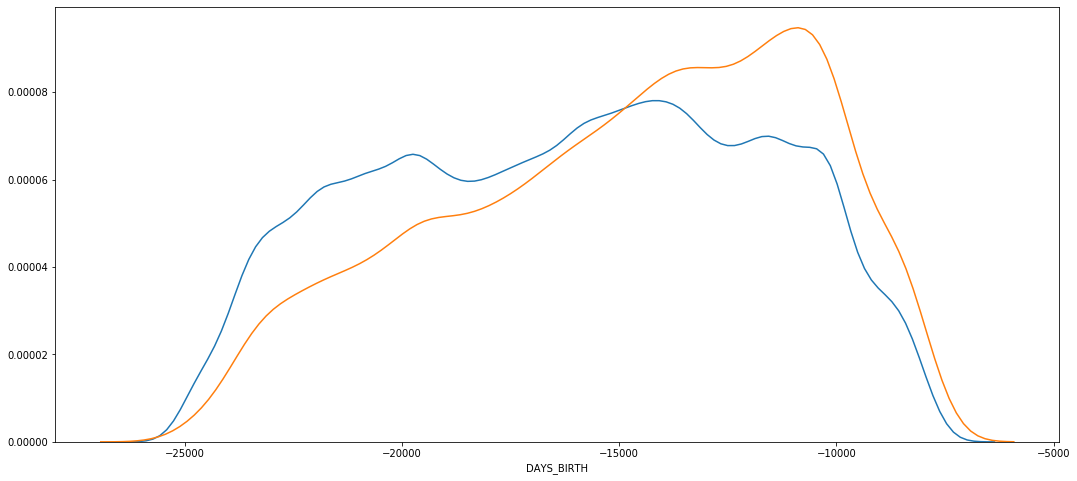

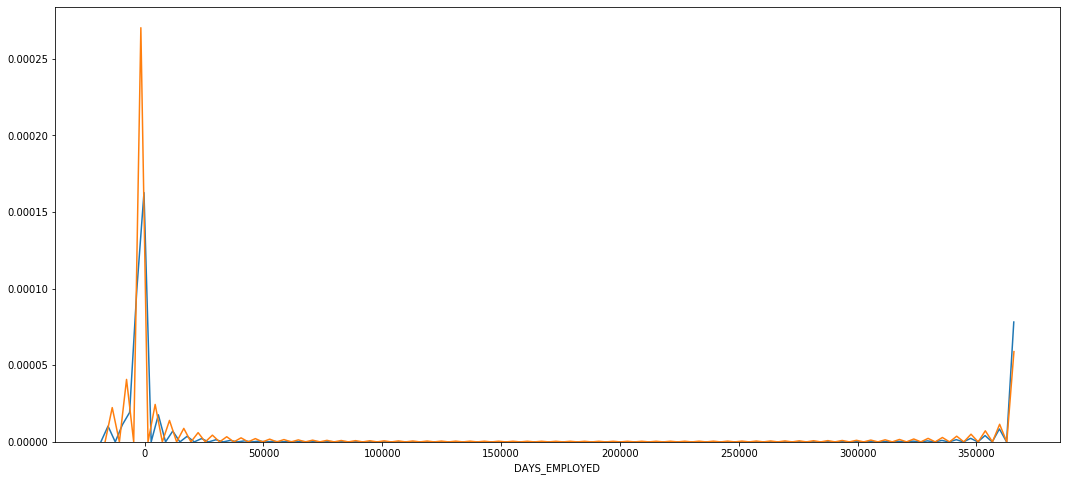

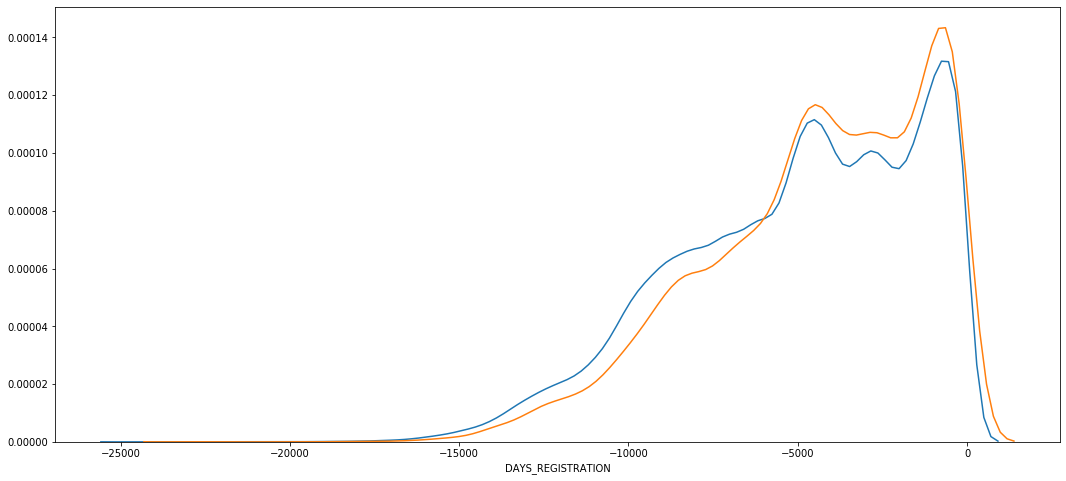

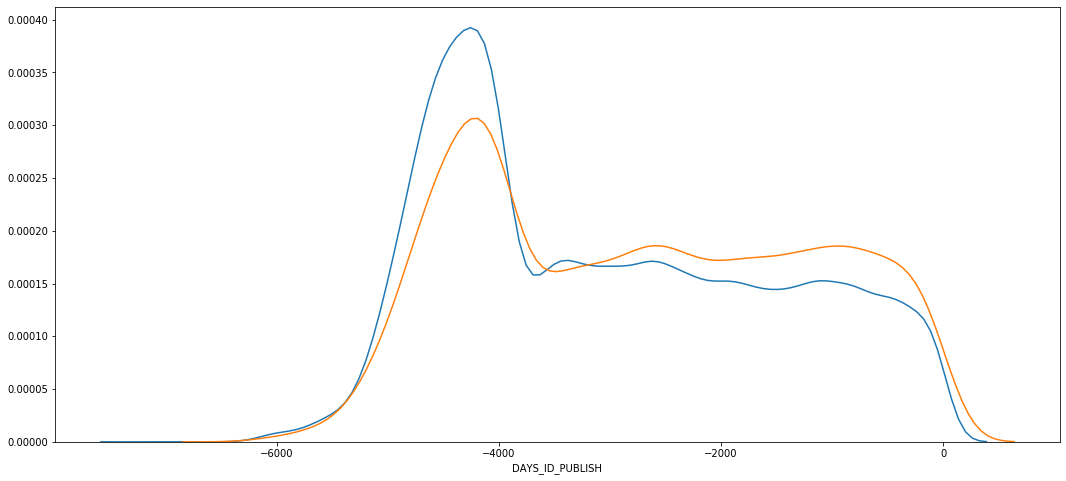

In [388]:
for feature in days_bio_application:
    plt.figure(figsize=(18, 8))

    sns.distplot(application[application['TARGET'] == 0][feature], 
                 hist=False)
    sns.distplot(application[application['TARGET'] == 1][feature], 
                 hist=False)
    plt.show()

In [389]:
get_df_general_stats(days_bio_application)

CountNaN  RateNaN%  CountUnique  MinValue  MaxValue  \
DAYS_BIRTH                0         0        17460  -25229.0   -7489.0   
DAYS_EMPLOYED             0         0        12574  -17912.0  365243.0   
DAYS_REGISTRATION         0         0        15688  -24672.0       0.0   
DAYS_ID_PUBLISH           0         0         6168   -7197.0       0.0   

                           Mean            Std   Median  
DAYS_BIRTH        -16036.995067    4363.988632 -15750.0  
DAYS_EMPLOYED      63815.045904  141275.766519  -1213.0  
DAYS_REGISTRATION  -4986.120328    3522.886321  -4504.0  
DAYS_ID_PUBLISH    -2994.202373    1509.450419  -3254.0

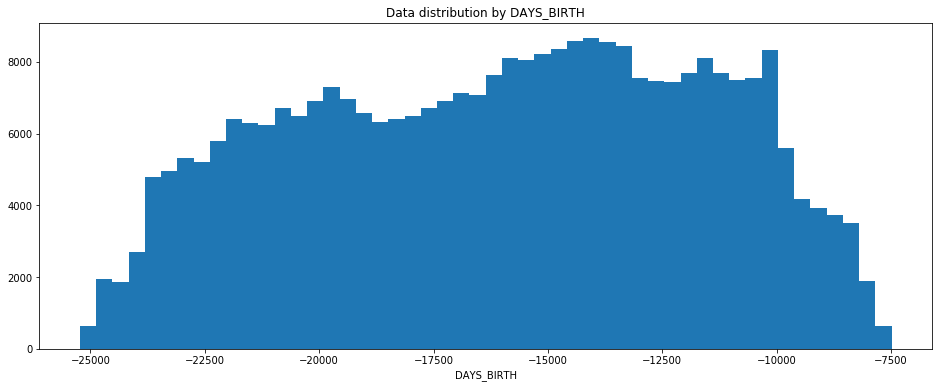

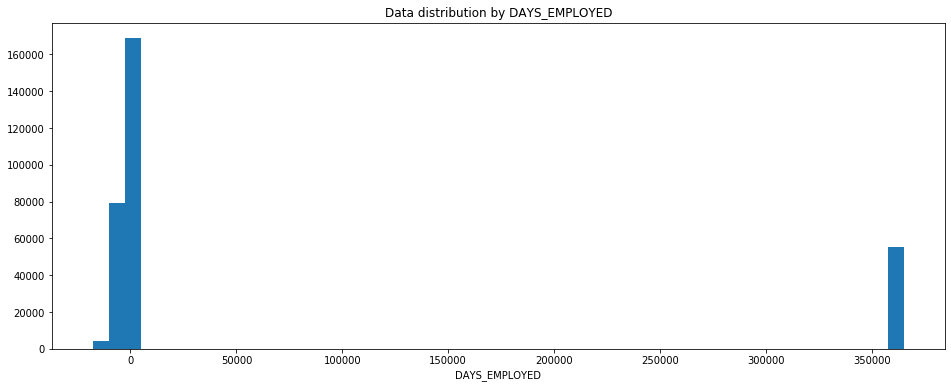

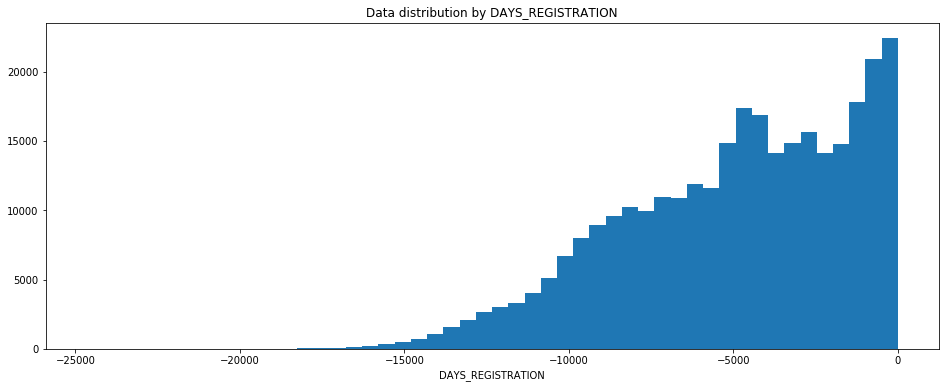

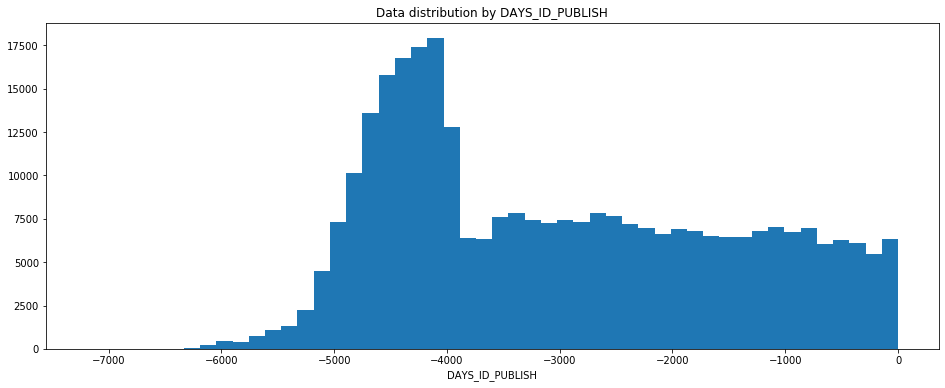

In [390]:
draw_hists_for_numerical_columns(DAYS_BIO_GROUP, days_bio_application)

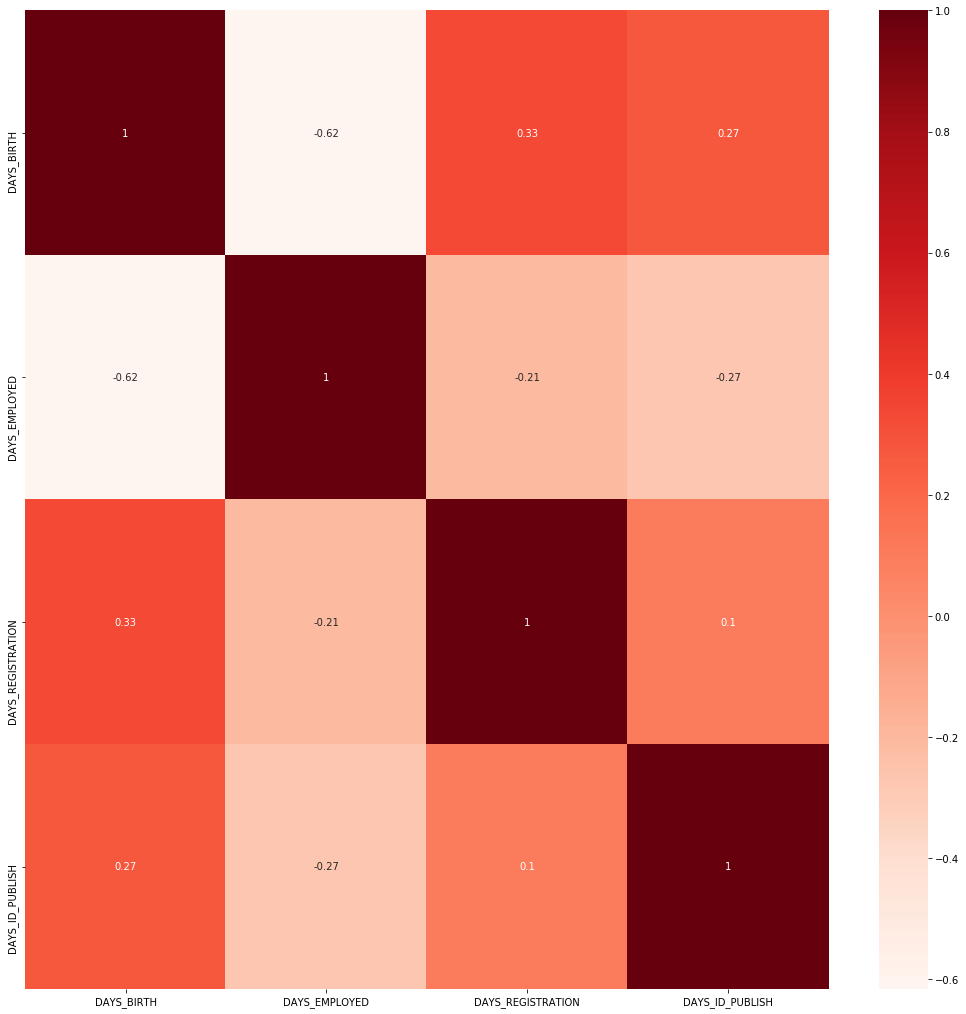

In [391]:
draw_correlations_for_numerical_columns(DAYS_BIO_GROUP, days_bio_application)

Наблюдения:

1. DAYS_EMPLOYED: очень странное распределение

### AMT_GROUP

In [392]:
amt_application = application[AMT_GROUP]
amt_application.sample(7, random_state=57)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
170430          157500.0    679500.0      27076.5         679500.0   
77136           220500.0    432567.0      19183.5         328500.0   
236101           90000.0    254700.0      14350.5         225000.0   
139065          180000.0    724261.5      32031.0         576000.0   
240305          270000.0    761949.0      51048.0         697500.0   
128737          270000.0    497520.0      36054.0         450000.0   
37088           135000.0    770292.0      32764.5         688500.0   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
170430                         0.0                        0.0   
77136                          0.0                        0.0   
236101                         0.0                        0.0   
139065                         0.0                        0.0   
240305                         NaN                        NaN   
128737                         0.0                        0.0   
37088                          NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
170430                         0.0                        0.0   
77136                          0.0                        0.0   
236101                         0.0                        0.0   
139065                         0.0                        1.0   
240305                         NaN                        NaN   
128737                         0.0                        0.0   
37088                          NaN                        NaN   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
170430                        0.0                         2.0  
77136                         0.0                         7.0  
236101                        0.0                         0.0  
139065                        0.0                         3.0  
240305                        NaN                         NaN  
128737                        1.0                         6.0  
37088                         NaN                         NaN

In [393]:
application.loc[application['AMT_INCOME_TOTAL'] > 500000, 'AMT_INCOME_TOTAL'] = 500000
application.loc[application['AMT_CREDIT'] > 2000000, 'AMT_CREDIT'] = 2000000
# AMT_GOODS_PRICE
# AMT_ANNUITY
application.loc[application['AMT_ANNUITY'] > 80000, 'AMT_ANNUITY'] = 80000
application.loc[application['AMT_GOODS_PRICE'] > 200000, 'AMT_GOODS_PRICE'] = 200000

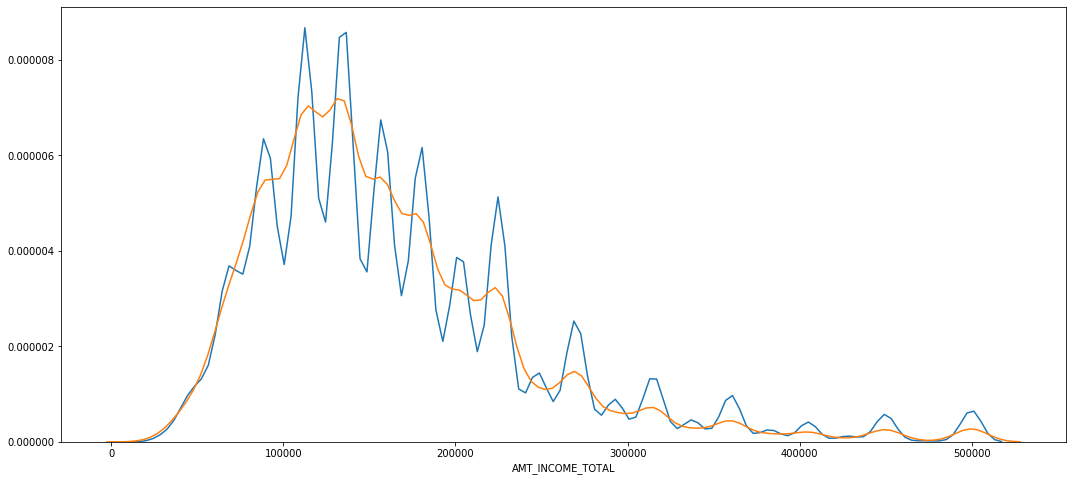

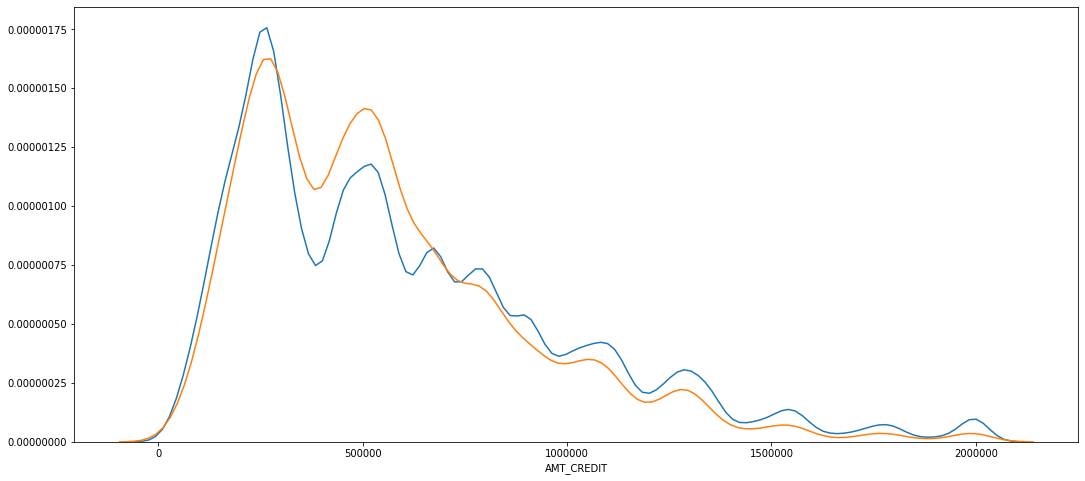

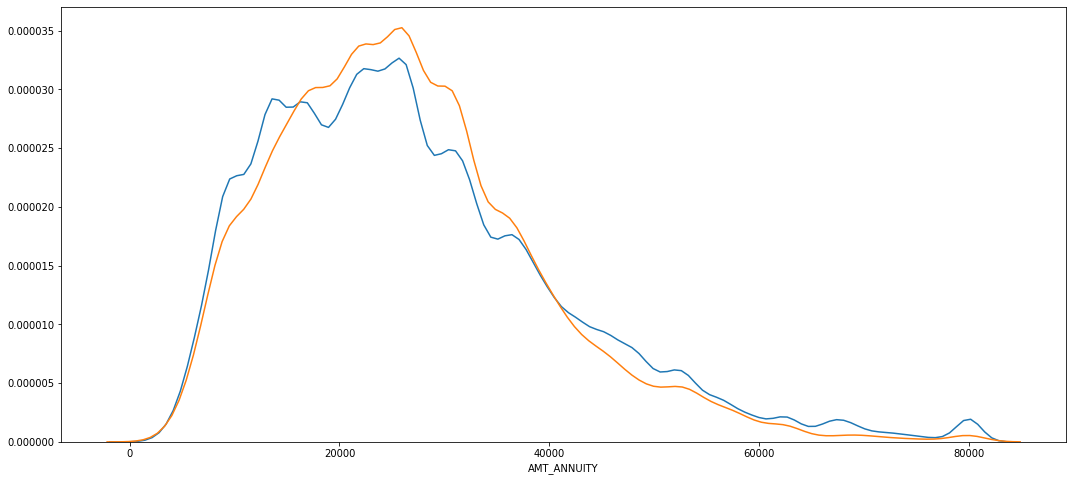

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


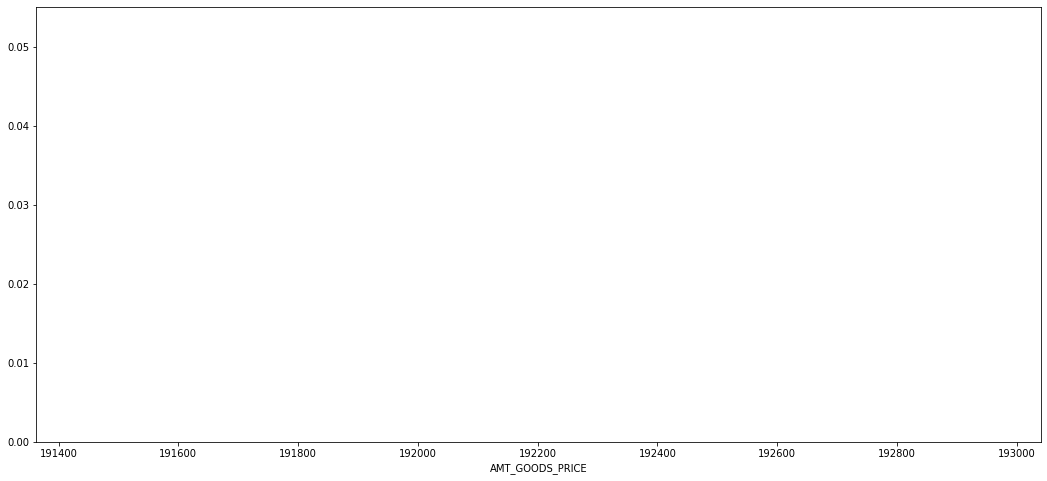

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


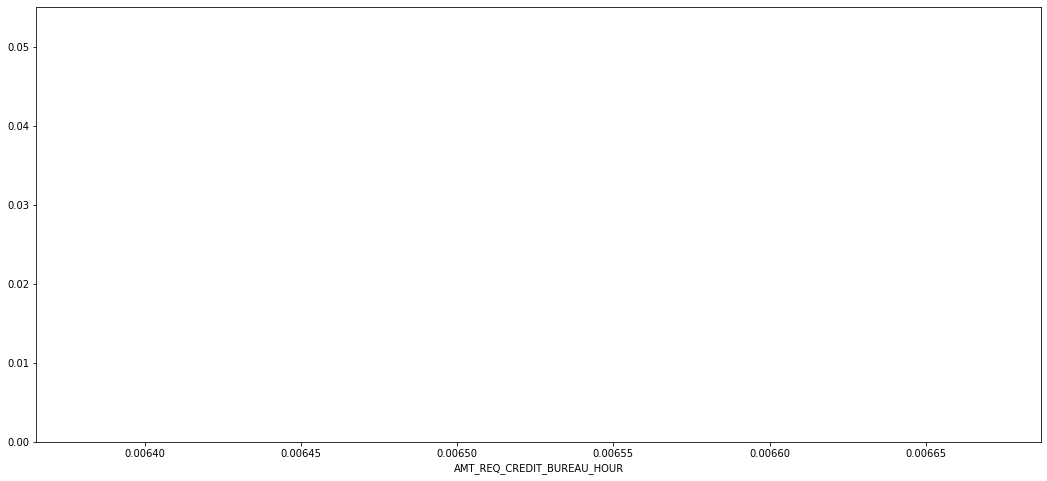

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


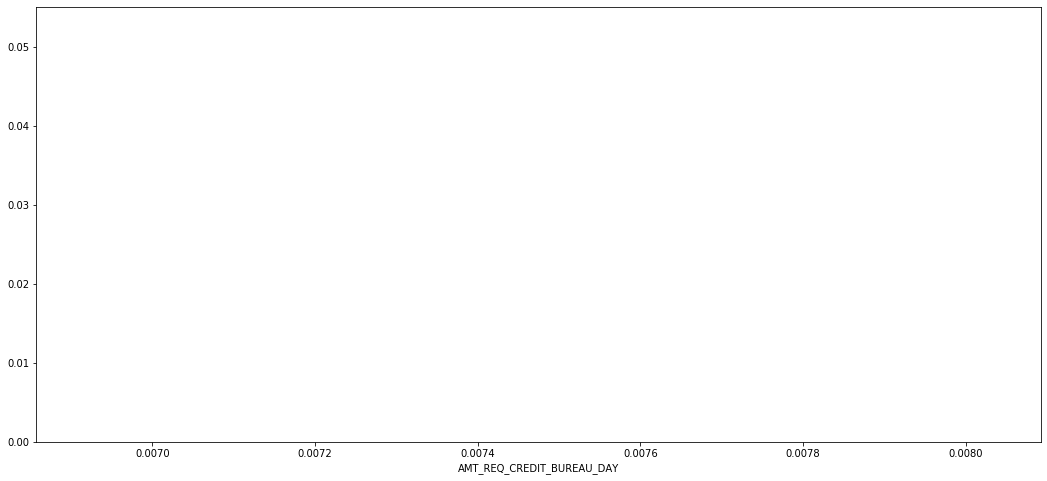

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


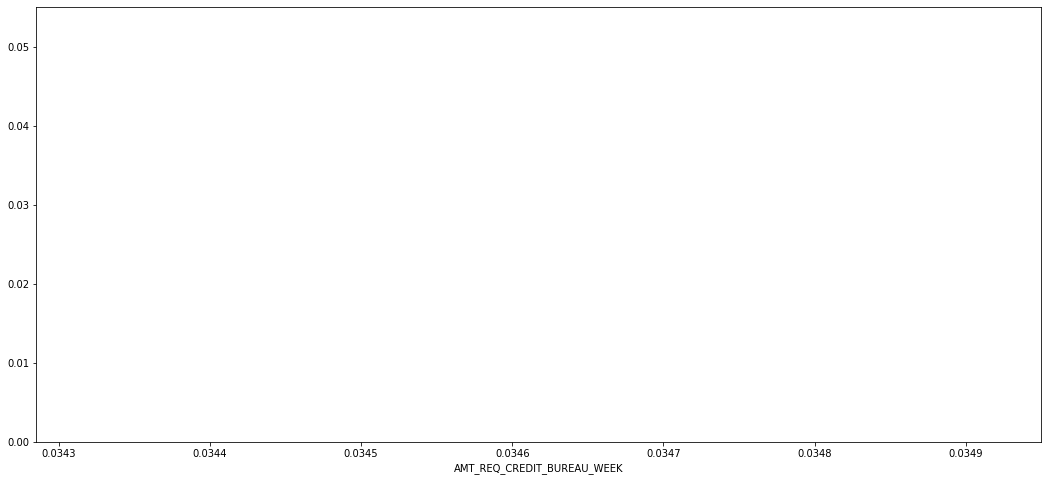

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


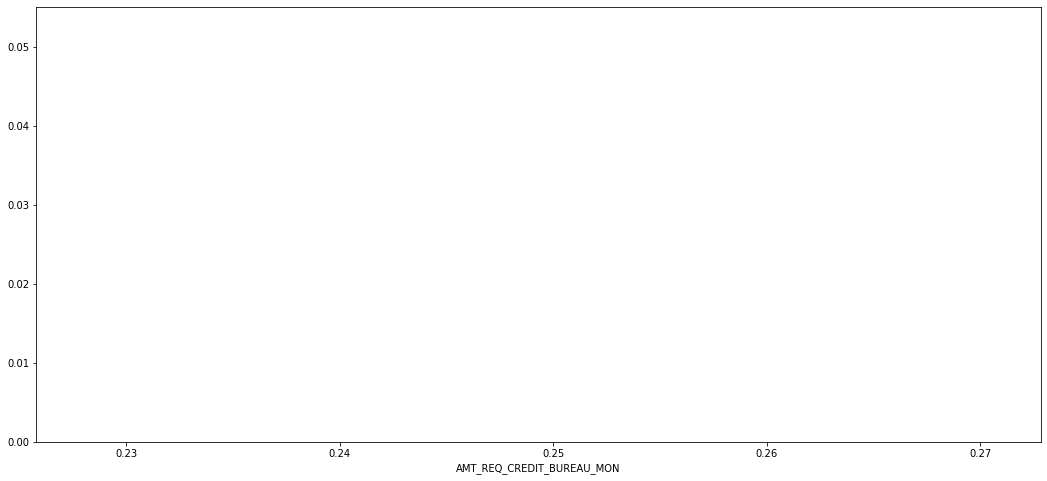

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


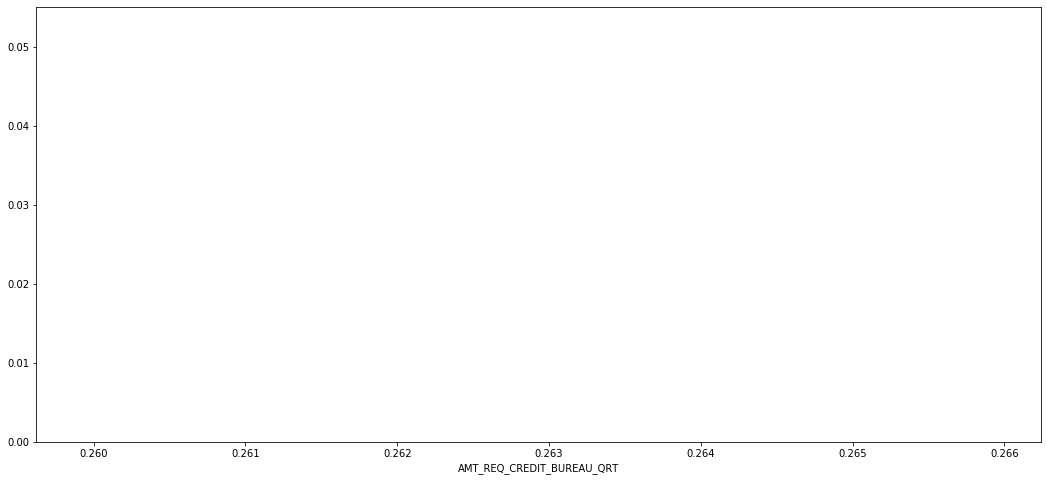

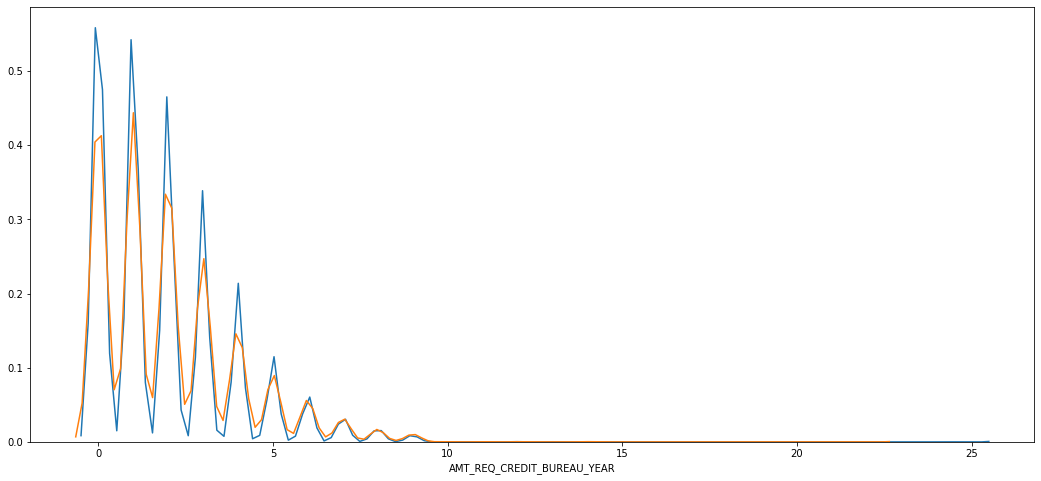

In [394]:
for feature in AMT_GROUP:
    plt.figure(figsize=(18, 8))

    sns.distplot(application[application['TARGET'] == 0][feature], 
                 hist=False)
    sns.distplot(application[application['TARGET'] == 1][feature], 
                 hist=False)
    plt.show()

In [395]:
application.loc[application['AMT_INCOME_TOTAL'] > 500000, 'AMT_INCOME_TOTAL'] = 500000

In [396]:
d = 6
x1 = application[(application['AMT_REQ_CREDIT_BUREAU_YEAR'] < d)]
x2 = application[(application['AMT_REQ_CREDIT_BUREAU_YEAR'] >= d)]

print('<0.003 1e8 {}% случаев'.format(100 * x1['TARGET'].mean()), x1.shape[0])
print('>0.003 1e8 {}% случаев'.format(100 * x2['TARGET'].mean()), x2.shape[0])

<0.003 1e8 7.637256147931626% случаев 251792
>0.003 1e8 9.176056338028168% случаев 14200


In [397]:
d = 300000
x1 = application[(application['AMT_INCOME_TOTAL'] < d)]
x2 = application[(application['AMT_INCOME_TOTAL'] >= d)]

print('<0.003 1e8 {}% случаев'.format(100 * x1['TARGET'].mean()), x1.shape[0])
print('>0.003 1e8 {}% случаев'.format(100 * x2['TARGET'].mean()), x2.shape[0])

<0.003 1e8 8.242383380388521% случаев 284772
>0.003 1e8 5.950129733057742% случаев 22739


In [398]:
get_df_general_stats(amt_application)

CountNaN  RateNaN%  CountUnique  MinValue  \
AMT_INCOME_TOTAL                   0         0         2548   25650.0   
AMT_CREDIT                         0         0         5603   45000.0   
AMT_ANNUITY                       12         0        13672    1615.5   
AMT_GOODS_PRICE                  278         0         1002   40500.0   
AMT_REQ_CREDIT_BUREAU_HOUR     41519        13            5       0.0   
AMT_REQ_CREDIT_BUREAU_DAY      41519        13            9       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK     41519        13            9       0.0   
AMT_REQ_CREDIT_BUREAU_MON      41519        13           24       0.0   
AMT_REQ_CREDIT_BUREAU_QRT      41519        13           11       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR     41519        13           25       0.0   

                               MaxValue           Mean            Std  \
AMT_INCOME_TOTAL            117000000.0  168797.919297  237123.146279   
AMT_CREDIT                    4050000.0  599025.999706  402490.776996   
AMT_ANNUITY                    258025.5   27108.573909   14493.737315   
AMT_GOODS_PRICE               4050000.0  538396.207429  369446.460540   
AMT_REQ_CREDIT_BUREAU_HOUR          4.0       0.006402       0.083849   
AMT_REQ_CREDIT_BUREAU_DAY           9.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK          8.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON          27.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT         261.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR         25.0       1.899974       1.869295   

                              Median  
AMT_INCOME_TOTAL            147150.0  
AMT_CREDIT                  513531.0  
AMT_ANNUITY                  24903.0  
AMT_GOODS_PRICE             450000.0  
AMT_REQ_CREDIT_BUREAU_HOUR       0.0  
AMT_REQ_CREDIT_BUREAU_DAY        0.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0  
AMT_REQ_CREDIT_BUREAU_YEAR       1.0

In [399]:
AMT_GROUP_NUMERIC = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
AMT_GROUP_CATEGORICAL = ['AMT_REQ_CREDIT_BUREAU_%s' % i for i in ['HOUR', 'DAY', 'WEEK', 'MON', 'QRT', 'YEAR']]

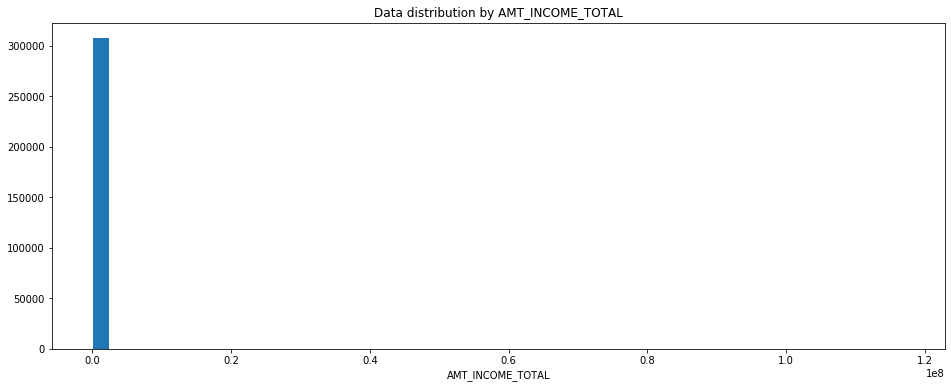

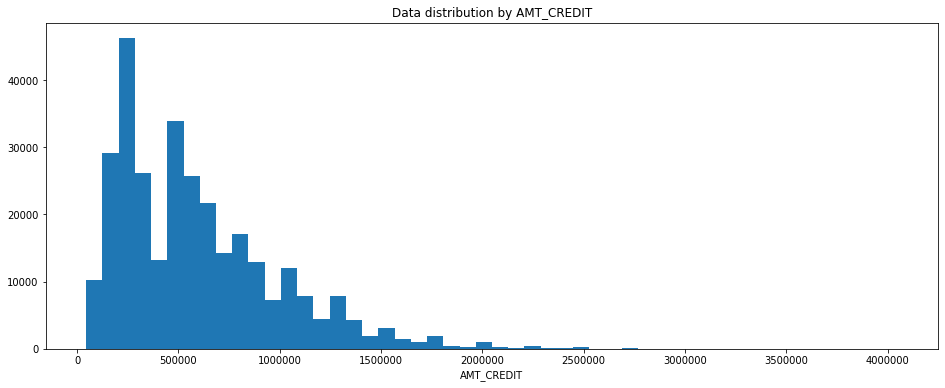

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


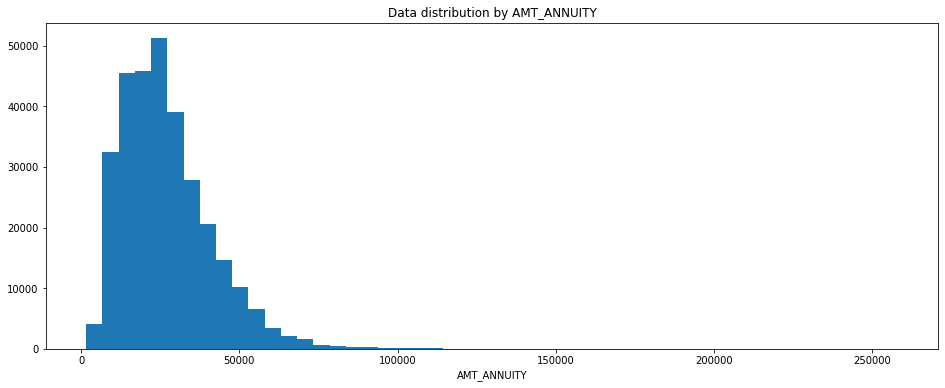

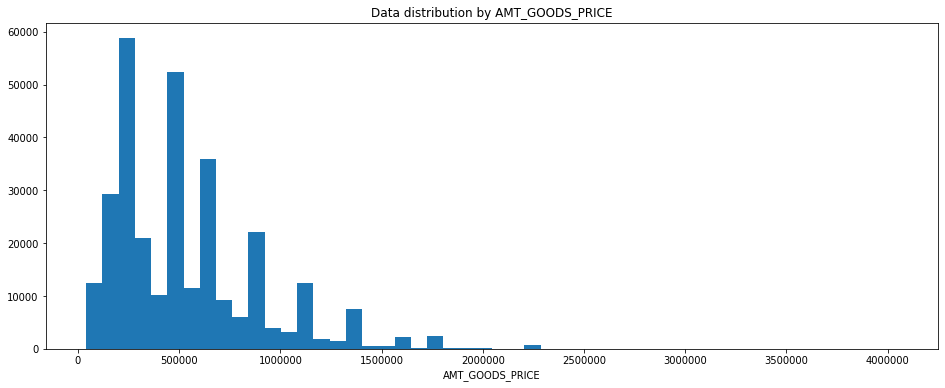

In [400]:
draw_hists_for_numerical_columns(AMT_GROUP_NUMERIC, amt_application)

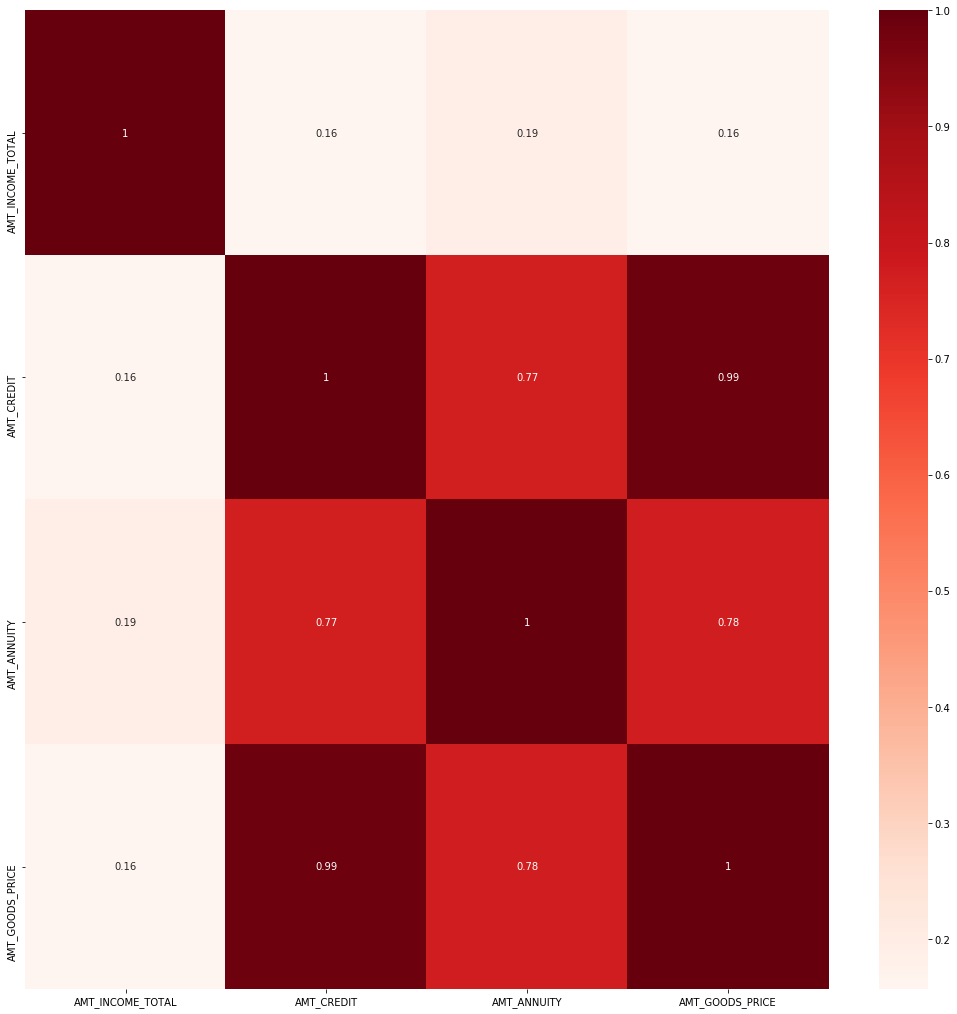

In [401]:
draw_correlations_for_numerical_columns(AMT_GROUP_NUMERIC, amt_application)

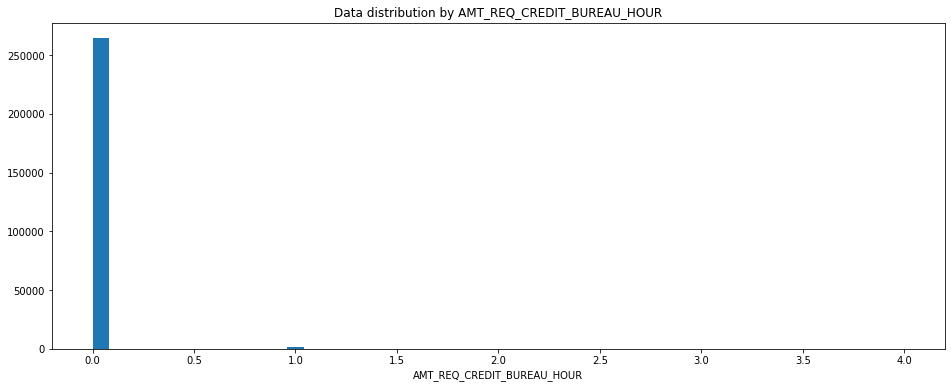

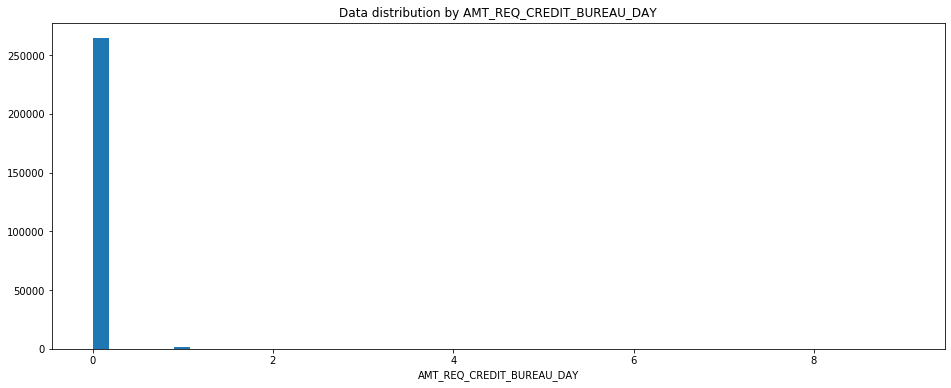

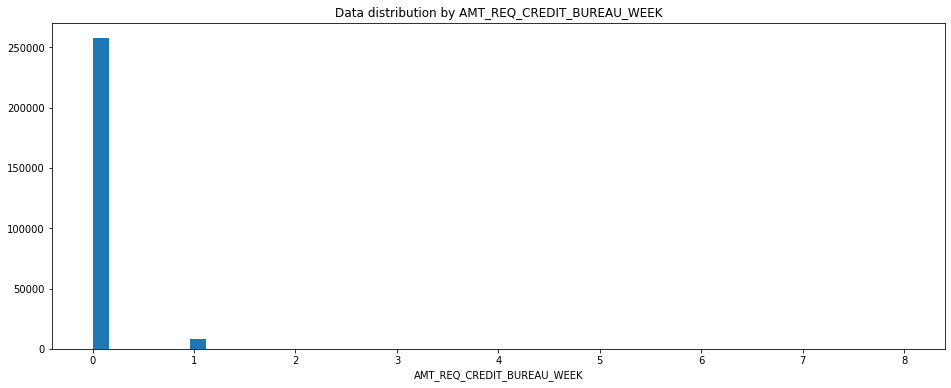

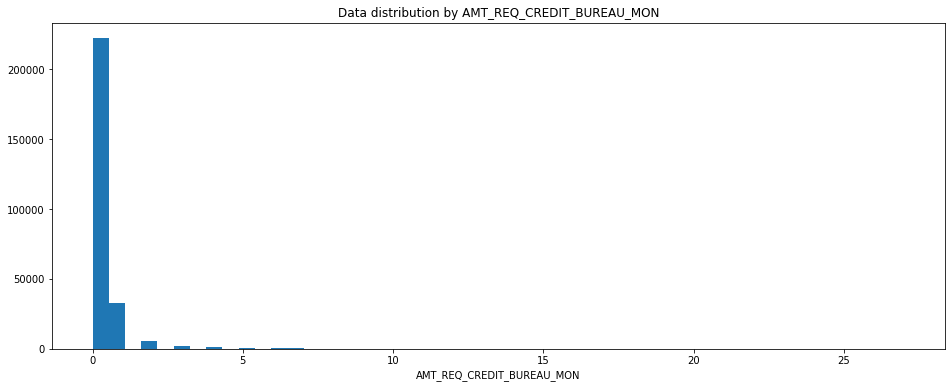

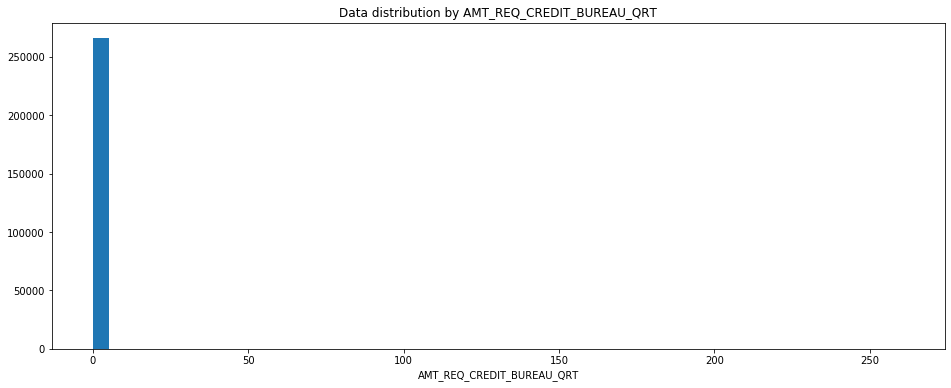

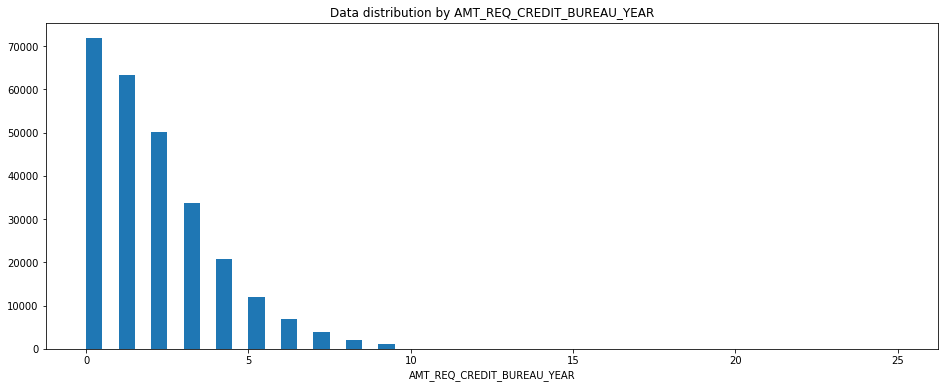

In [402]:
draw_hists_for_numerical_columns(AMT_GROUP_CATEGORICAL, amt_application)

### APARTMENT_GROUP

In [403]:
apartment_application = application[APARTMENT_GROUP]
apartment_application.sample(7, random_state=57)

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
170430          0.1206               NaN                       0.9916   
77136           0.0722               NaN                       0.9846   
236101          0.0897               NaN                       0.9816   
139065          0.1227            0.0990                       0.9816   
240305          0.0608            0.0556                       0.9786   
128737             NaN               NaN                          NaN   
37088              NaN               NaN                          NaN   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  FLOORSMAX_AVG  \
170430              NaN             NaN           0.16         0.3333   
77136               NaN             NaN           0.00         0.2083   
236101              NaN             NaN            NaN         0.1667   
139065           0.7484          0.0160           0.00         0.1667   
240305           0.7076          0.0471           0.00         0.1667   
128737              NaN             NaN            NaN            NaN   
37088               NaN             NaN            NaN            NaN   

        FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  \
170430            NaN           NaN                   NaN          0.1478   
77136             NaN           NaN                   NaN          0.0422   
236101            NaN        0.0908                   NaN          0.0766   
139065         0.2083        0.0547                0.1000          0.1023   
240305         0.2083        0.0632                0.0488          0.0503   
128737            NaN           NaN                   NaN             NaN   
37088             NaN           NaN                   NaN             NaN   

        NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  \
170430                      NaN             0.0037           0.1229   
77136                       NaN             0.0000           0.0735   
236101                      NaN             0.0098           0.0914   
139065                   0.0000             0.0000           0.1250   
240305                   0.0039             0.0055           0.0620   
128737                      NaN                NaN              NaN   
37088                       NaN                NaN              NaN   

        BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  \
170430                NaN                        0.9916               NaN   
77136                 NaN                        0.9846               NaN   
236101                NaN                        0.9816               NaN   
139065             0.1027                        0.9816            0.7583   
240305             0.0577                        0.9786            0.7190   
128737                NaN                           NaN               NaN   
37088                 NaN                           NaN               NaN   

        COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  \
170430              NaN          0.1611          0.1379          0.3333   
77136               NaN          0.0000          0.0345          0.2083   
236101              NaN             NaN          0.2069          0.1667   
139065           0.0161          0.0000          0.2759          0.1667   
240305           0.0475          0.0000          0.1379          0.1667   
128737              NaN             NaN             NaN             NaN   
37088               NaN             NaN             NaN             NaN   

        FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  \
170430             NaN            NaN                    NaN           0.1540   
77136              NaN            NaN                    NaN           0.0439   
236101             NaN         0.0928                    NaN           0.0799   
139065          0.2083         0.0560                 0.1093           0.1066   
240305          0.2083       

In [404]:
for feature in APARTMENT_GROUP:
    if feature in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                   'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']:
        continue
    ql, qr = application[feature].quantile(0.01), application[feature].quantile(0.99)
    print(feature, ql, qr)
    application.loc[application[feature] > qr, feature] = qr
    application.loc[application[feature] < ql, feature] = ql
#     plt.figure(figsize=(18, 8))

#     sns.distplot(application[application['TARGET'] == 0][feature], 
#                  hist=False)
#     sns.distplot(application[application['TARGET'] == 1][feature], 
#                  hist=False)
#     plt.show()

APARTMENTS_AVG 0.0021 0.5448610000000103
BASEMENTAREA_AVG 0.0 0.38596600000000036
YEARS_BEGINEXPLUATATION_AVG 0.9488 0.9990000000000001
YEARS_BUILD_AVG 0.34719999999999995 0.9864000000000002
COMMONAREA_AVG 0.0 0.3765550000000003
ELEVATORS_AVG 0.0 0.6
FLOORSMAX_AVG 0.0 0.6667
FLOORSMIN_AVG 0.0 0.7083
LANDAREA_AVG 0.0 0.3746
LIVINGAPARTMENTS_AVG 0.0034000000000000002 0.45389999999999997
LIVINGAREA_AVG 0.0022 0.5509
NONLIVINGAPARTMENTS_AVG 0.0 0.1081
NONLIVINGAREA_AVG 0.0 0.3165
APARTMENTS_MODE 0.0021 0.541
BASEMENTAREA_MODE 0.0 0.3962
YEARS_BEGINEXPLUATATION_MODE 0.9489 0.9990000000000001
YEARS_BUILD_MODE 0.3662 0.9869
COMMONAREA_MODE 0.0 0.3655550000000003
ELEVATORS_MODE 0.0 0.6042
ENTRANCES_MODE 0.0345 0.5172
FLOORSMAX_MODE 0.0 0.6667
FLOORSMIN_MODE 0.0 0.7083
LANDAREA_MODE 0.0 0.37888000000000177
LIVINGAPARTMENTS_MODE 0.0028 0.4885
LIVINGAREA_MODE 0.0019000000000000002 0.5616399999999994
NONLIVINGAPARTMENTS_MODE 0.0 0.0973
NONLIVINGAREA_MODE 0.0 0.3221
APARTMENTS_MEDI 0.0021 0.5501100

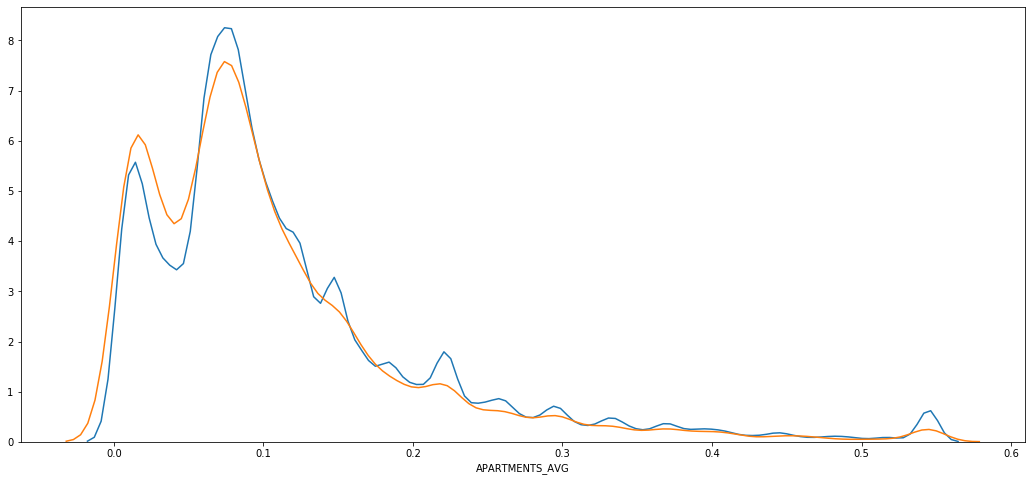

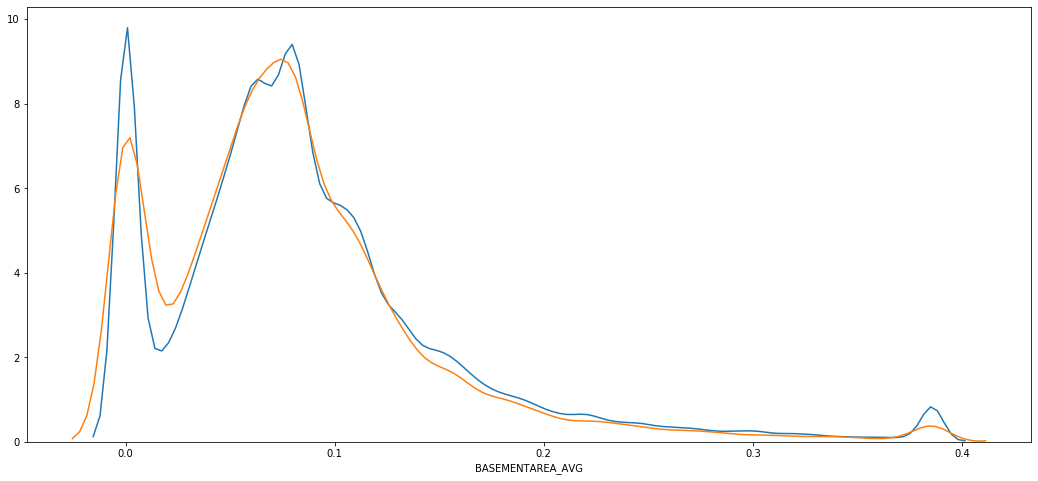

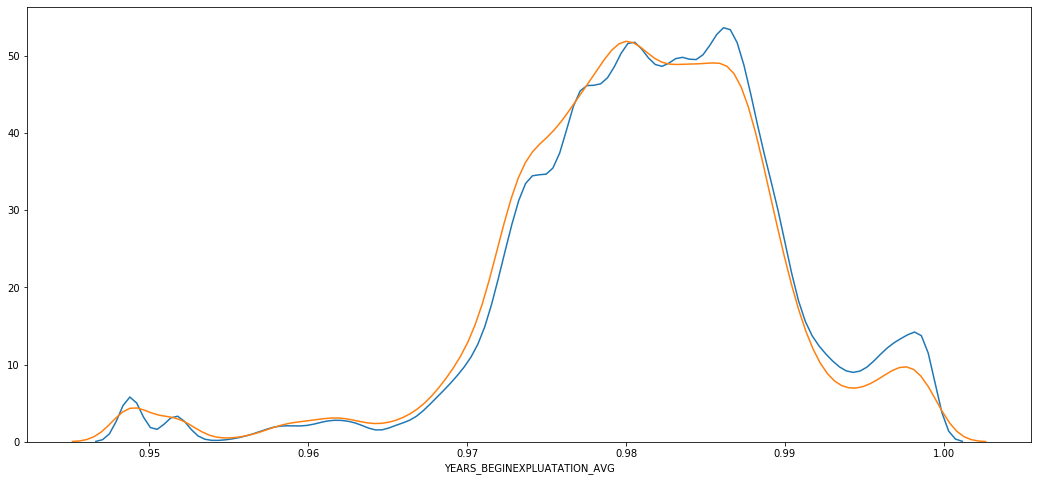

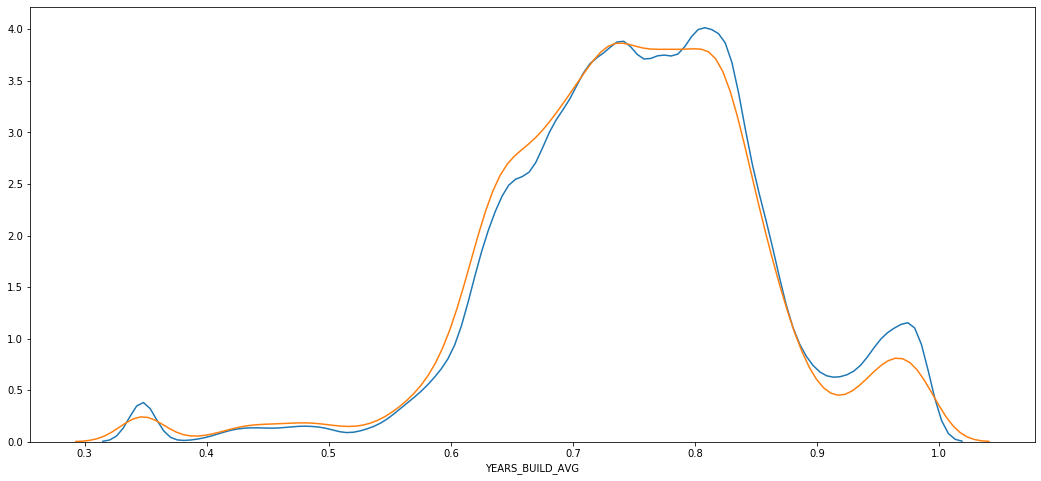

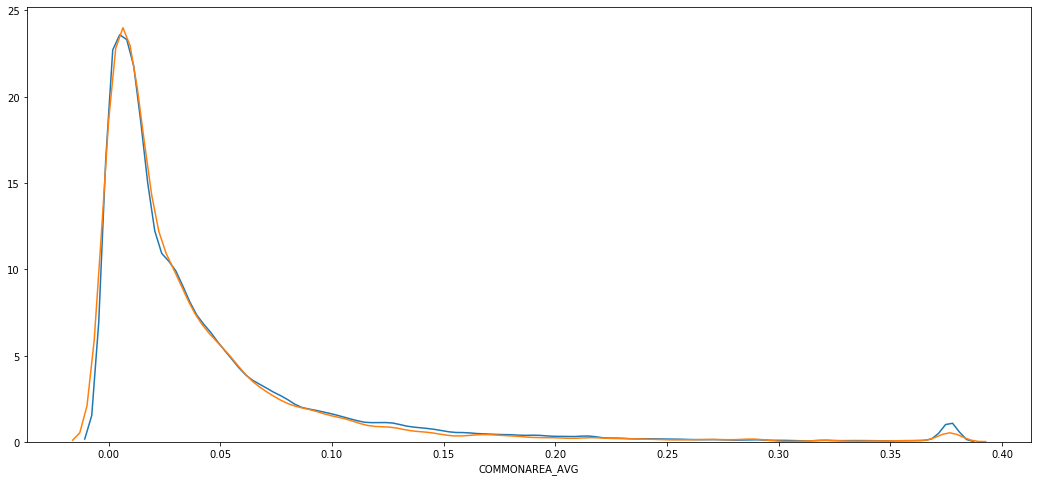

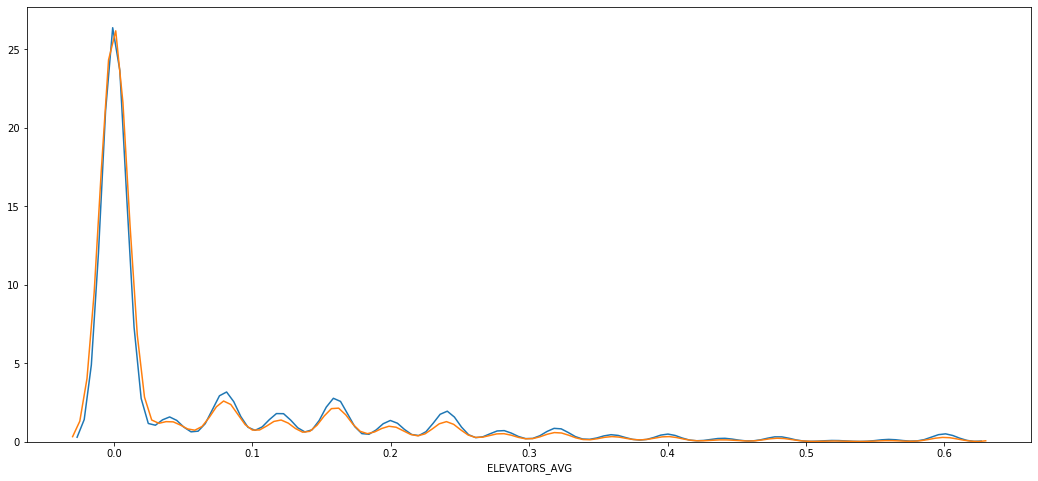

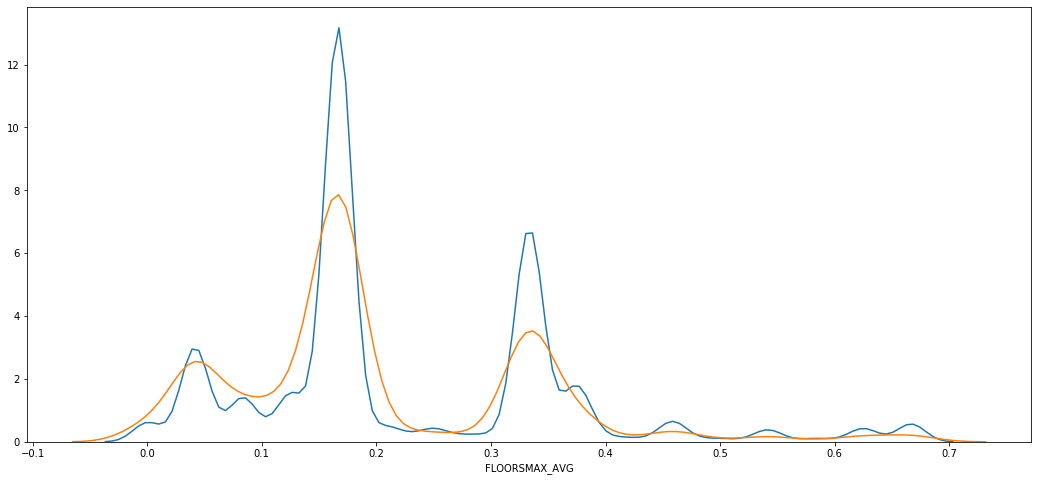

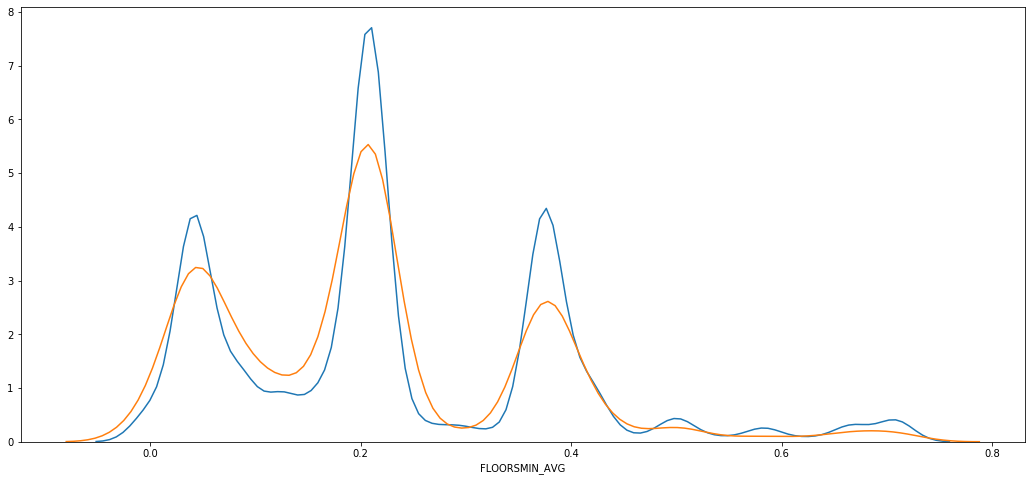

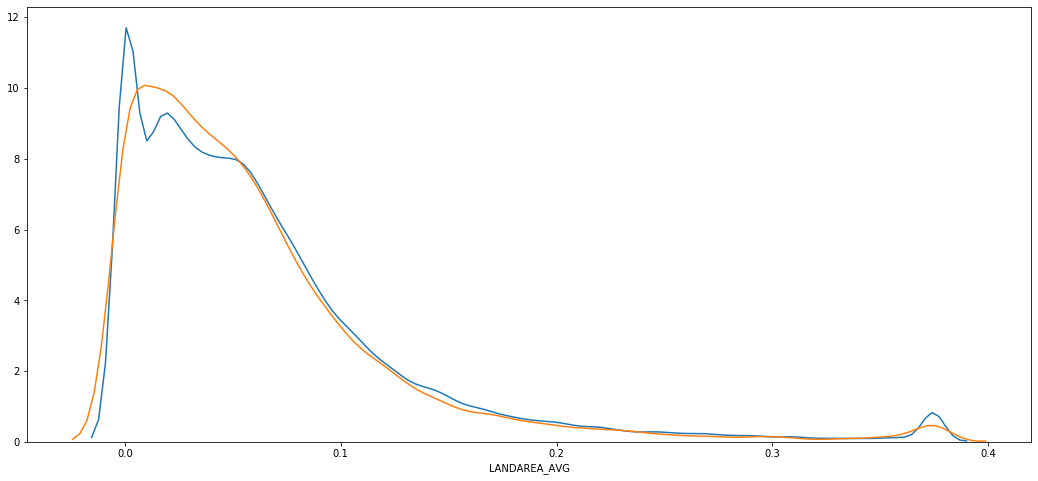

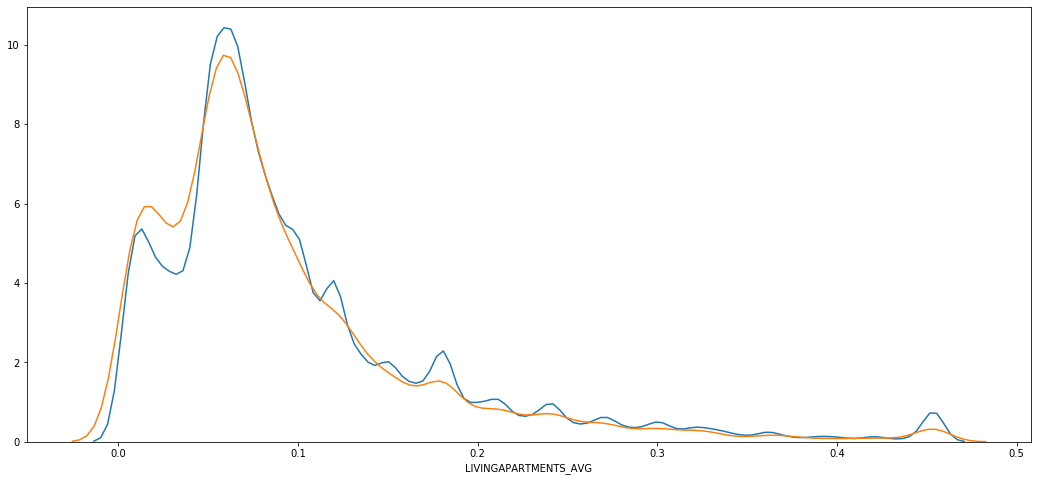

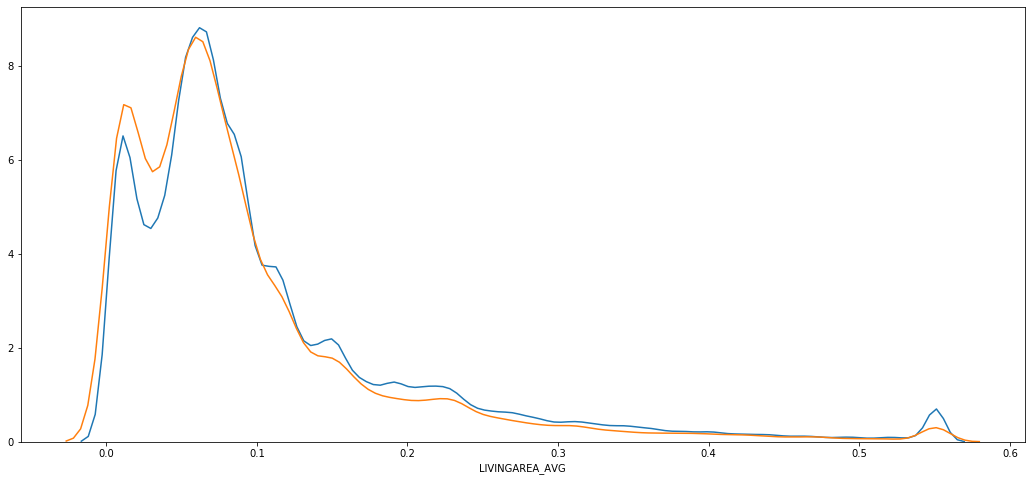

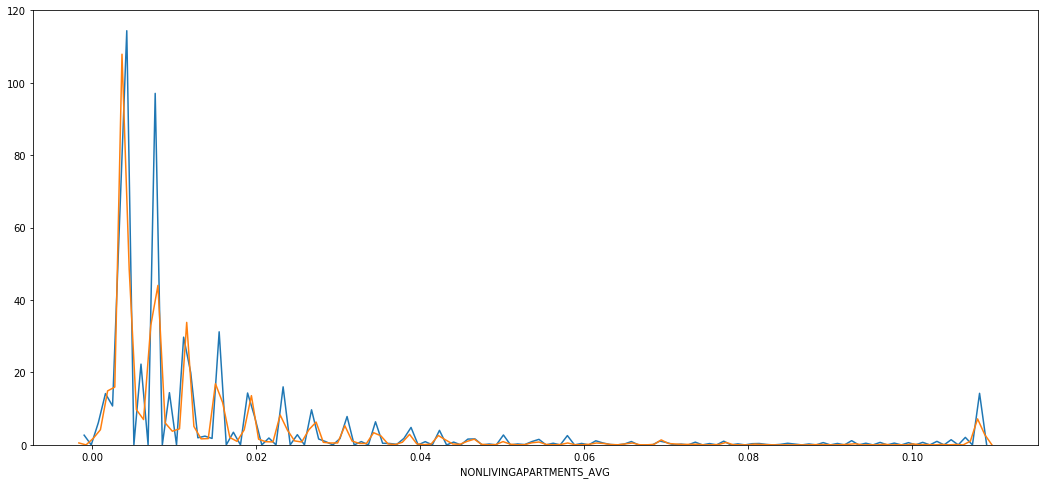

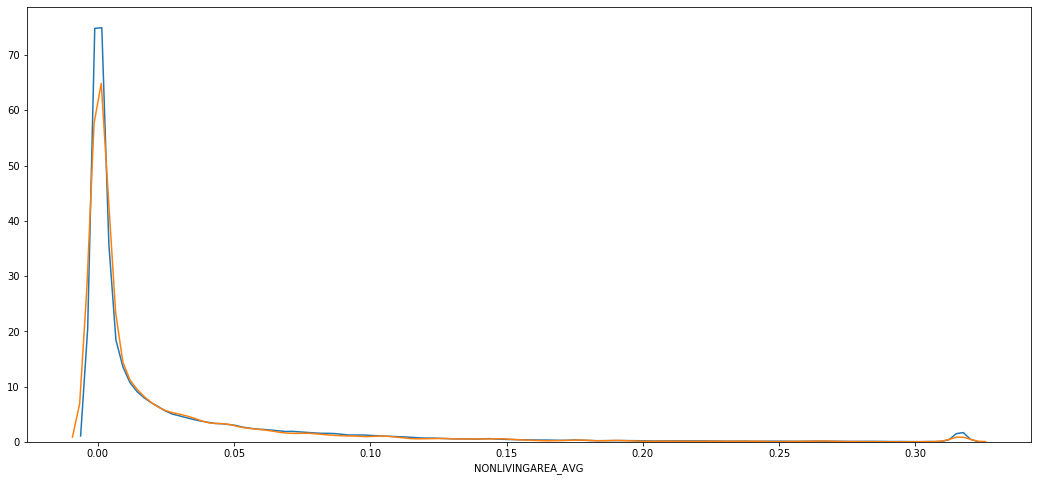

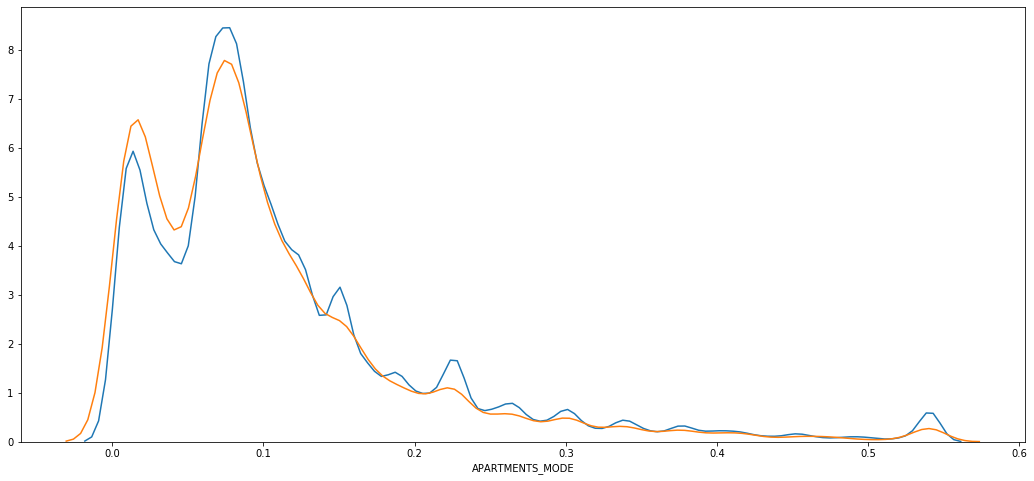

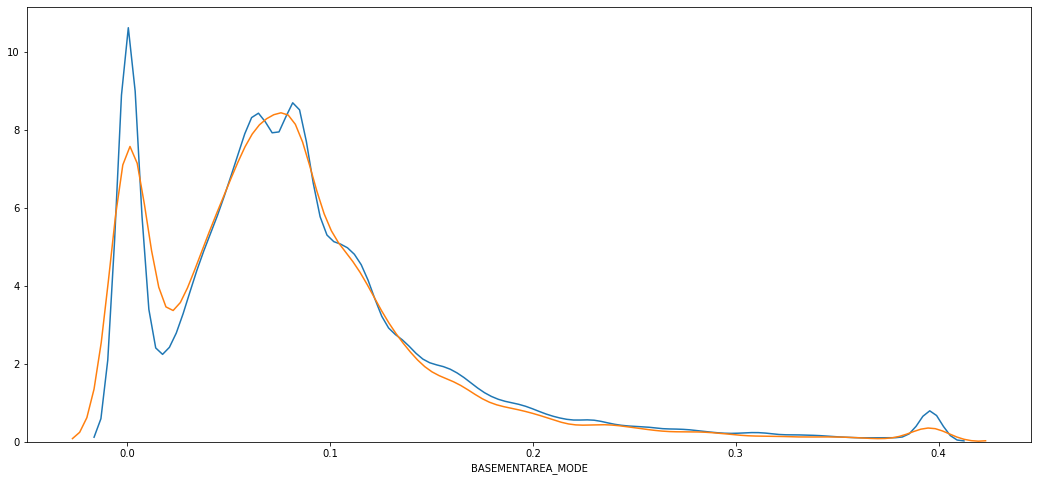

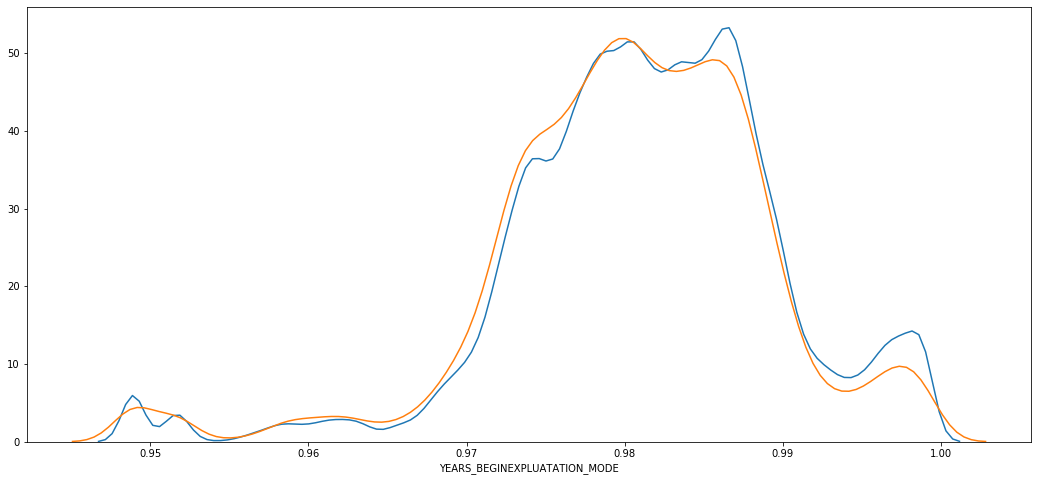

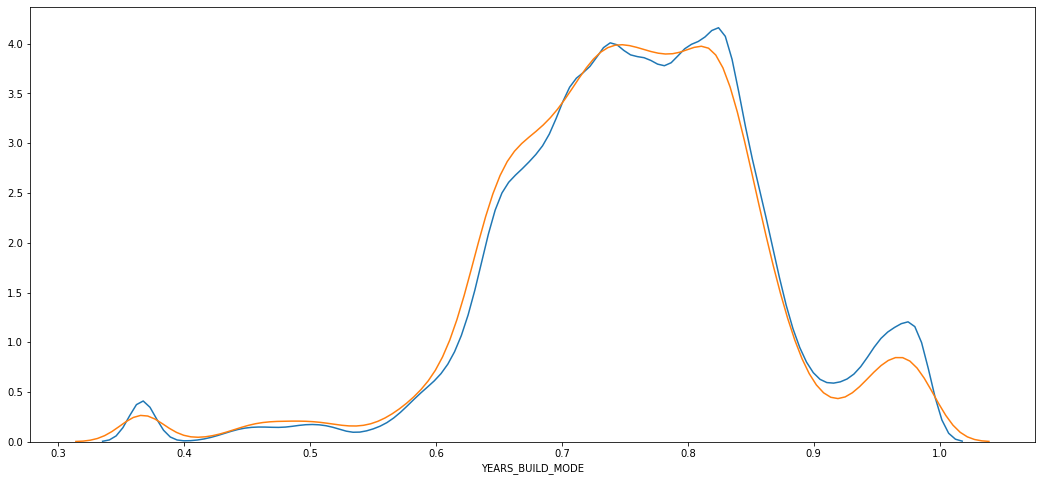

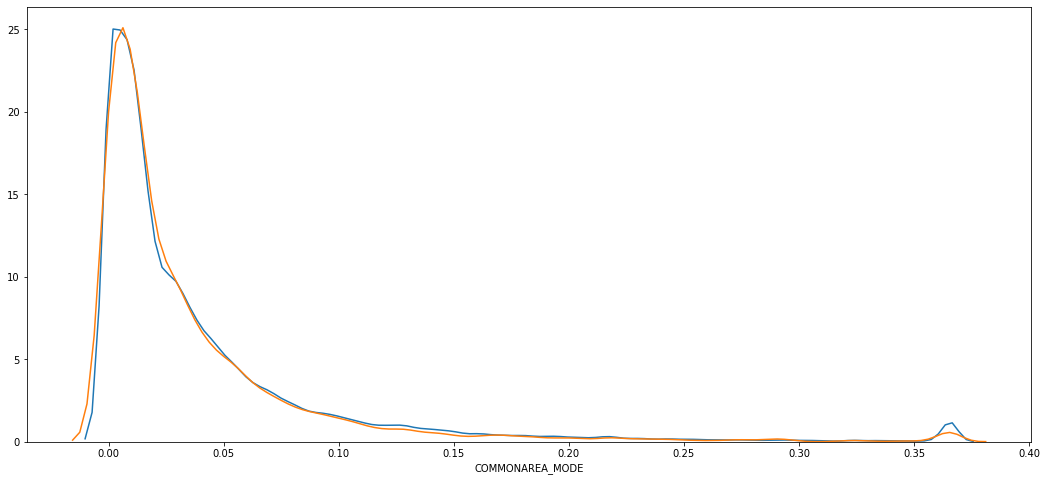

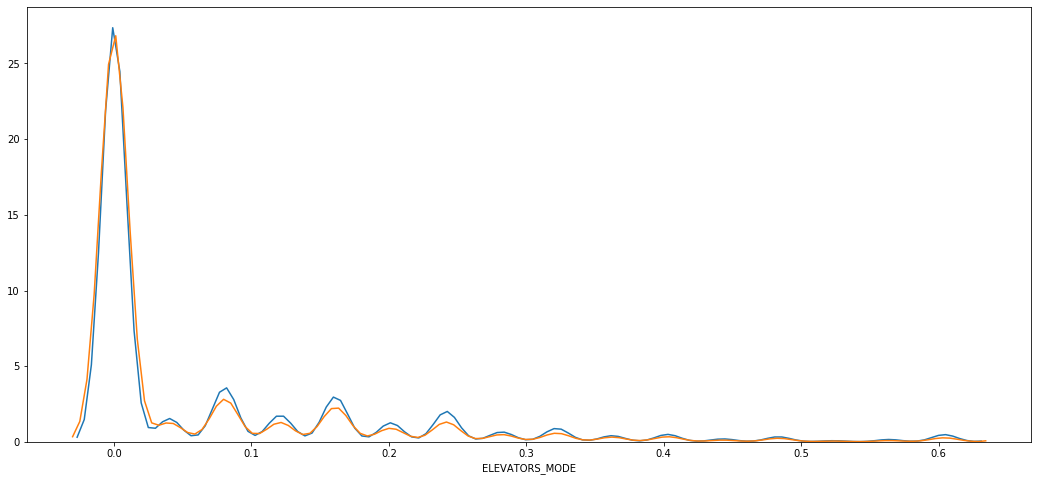

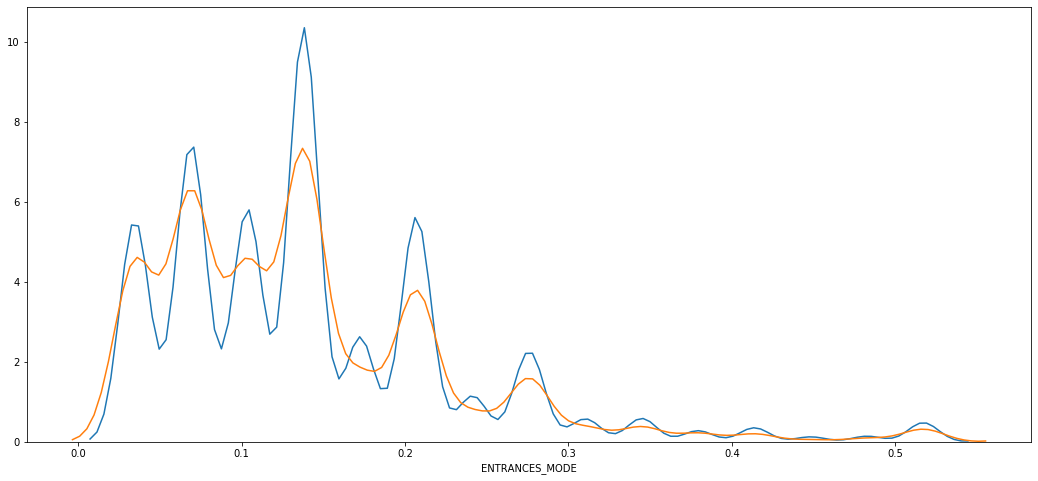

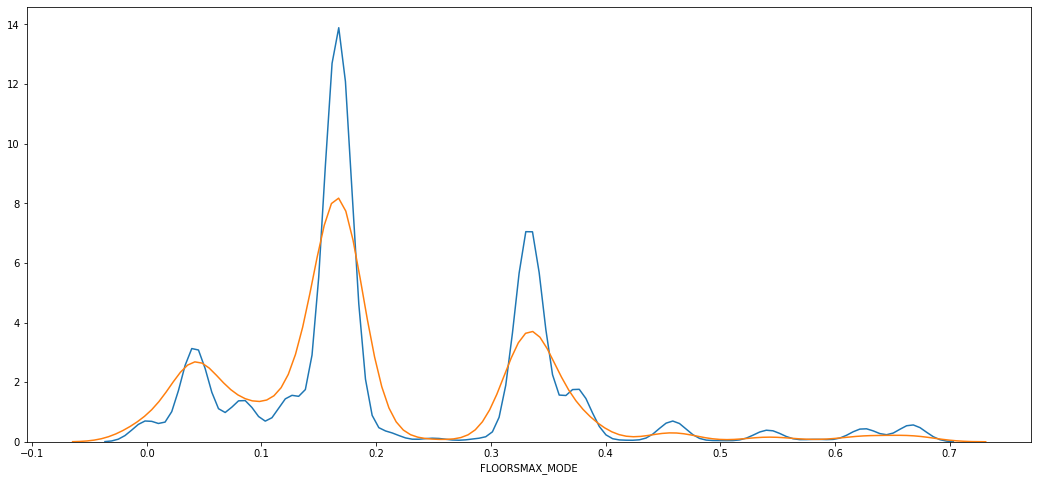

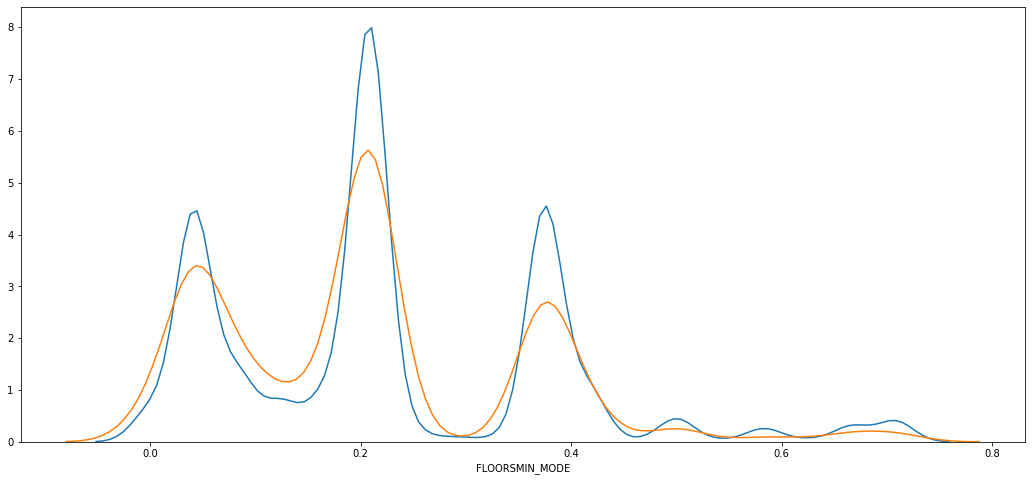

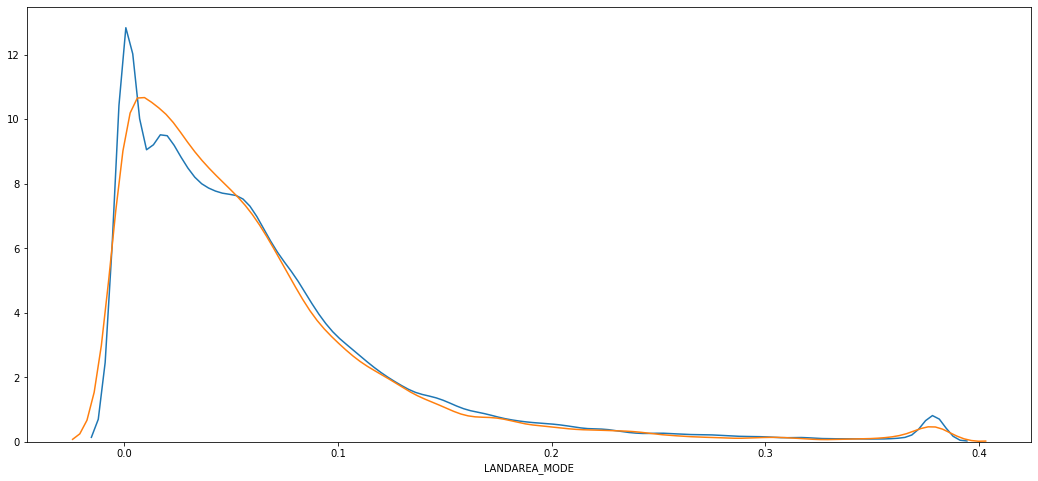

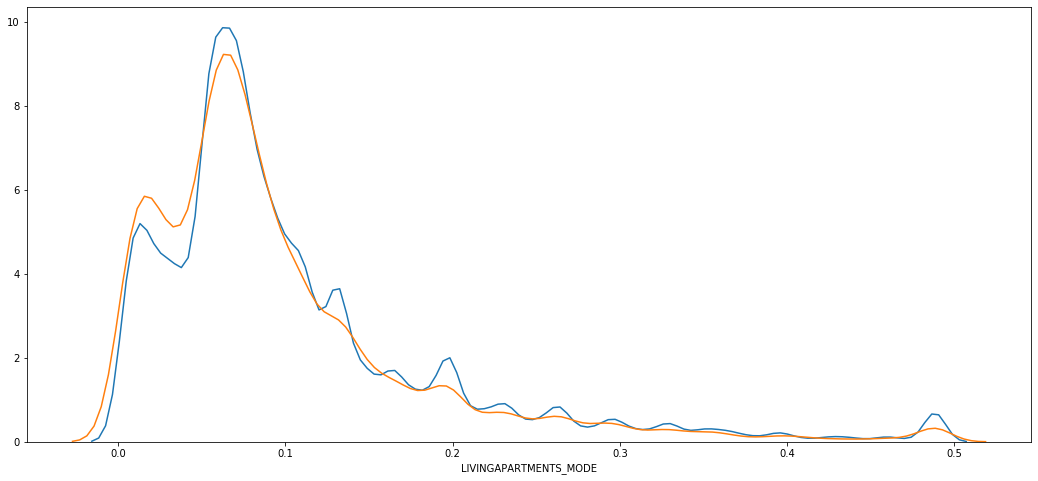

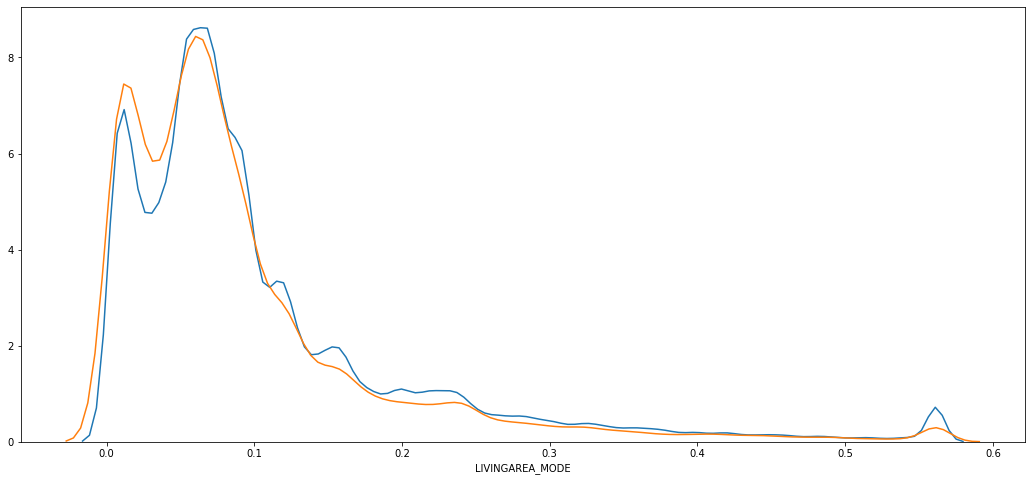

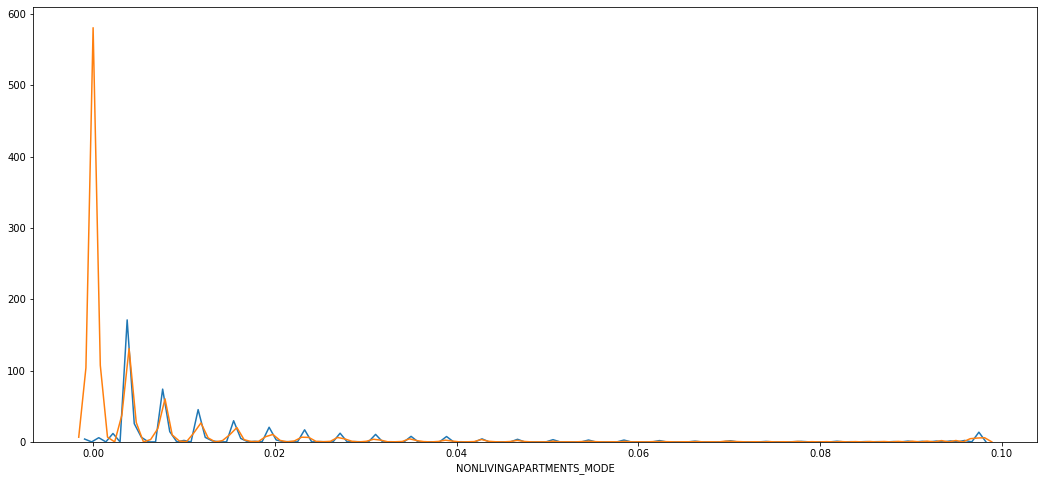

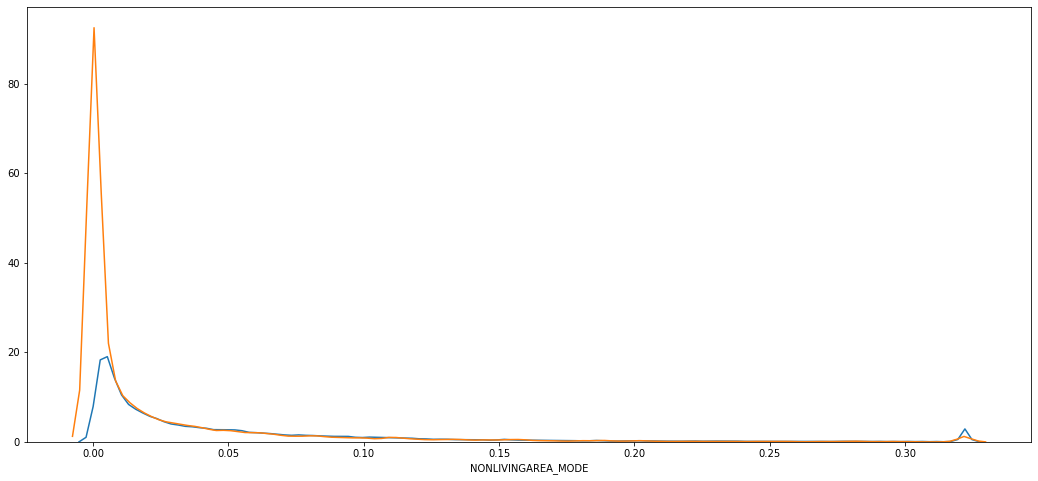

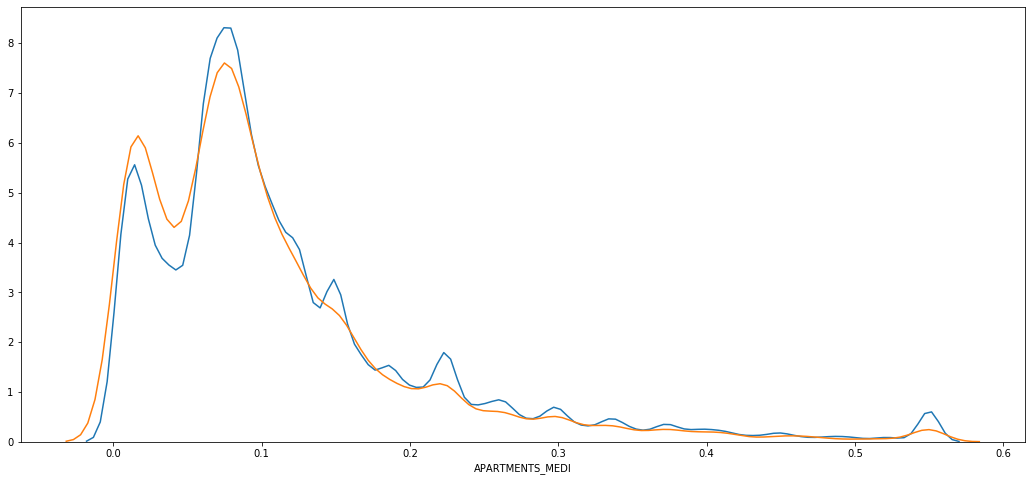

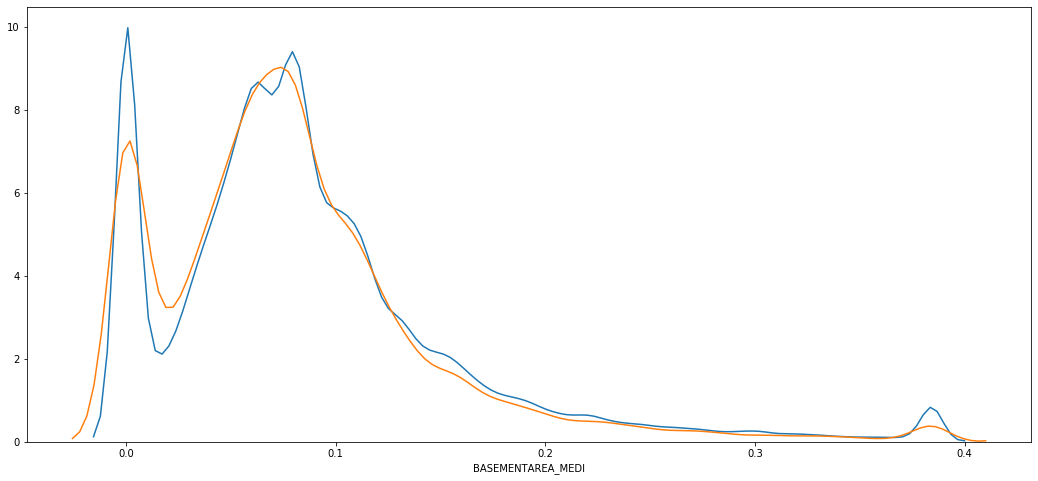

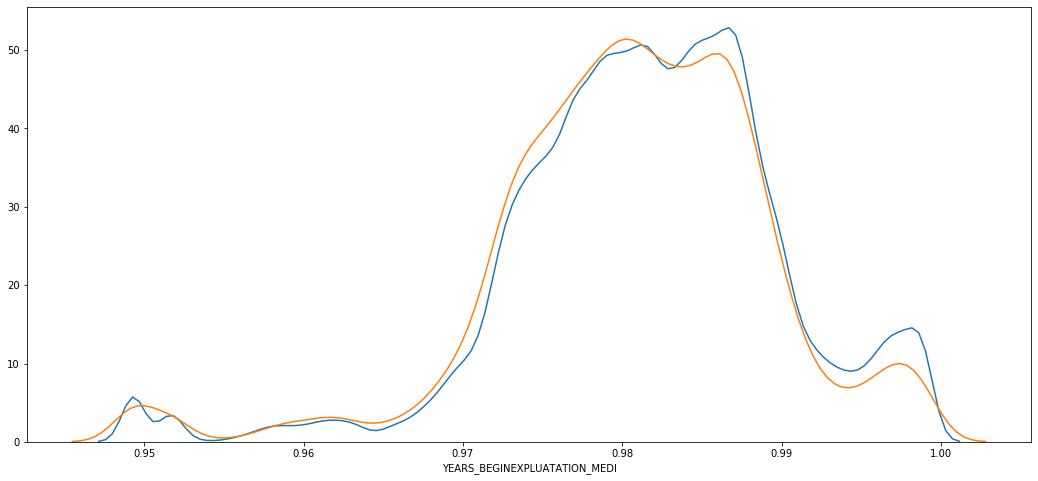

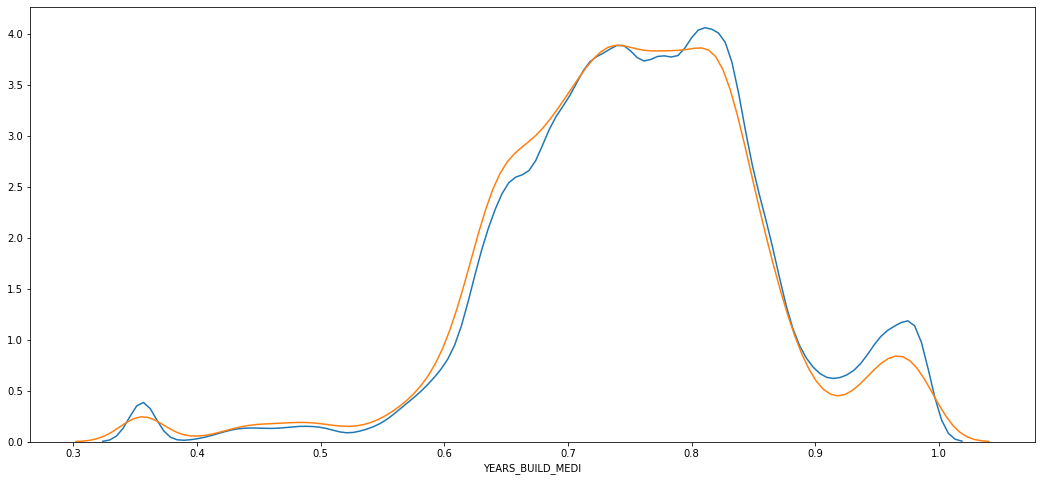

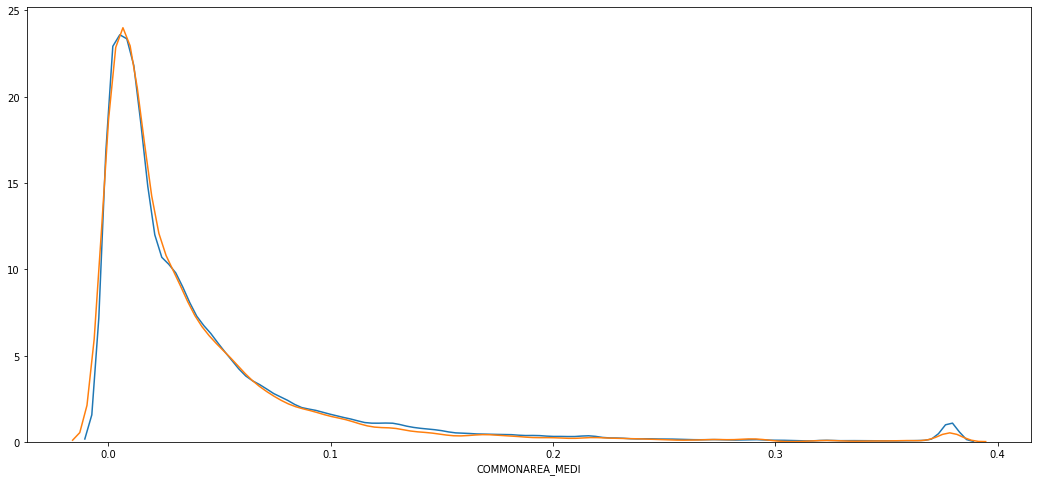

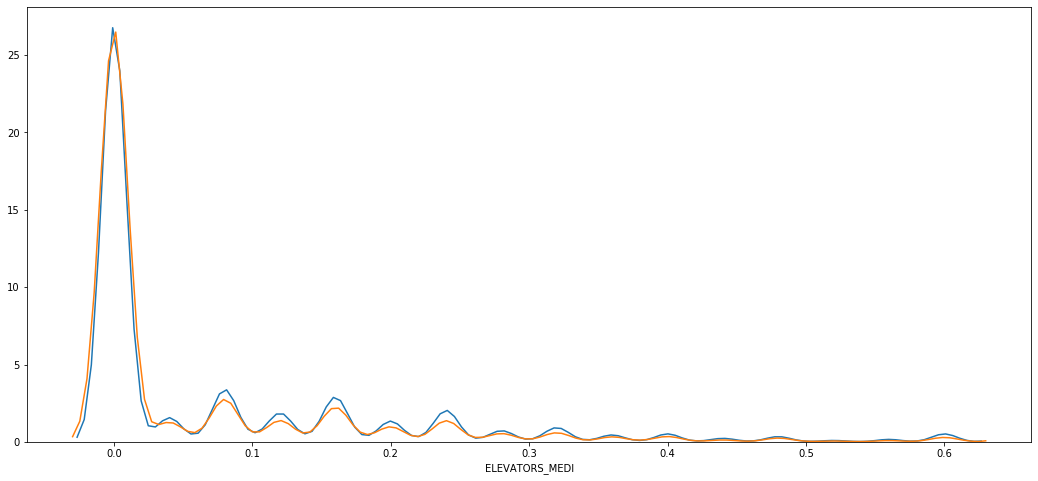

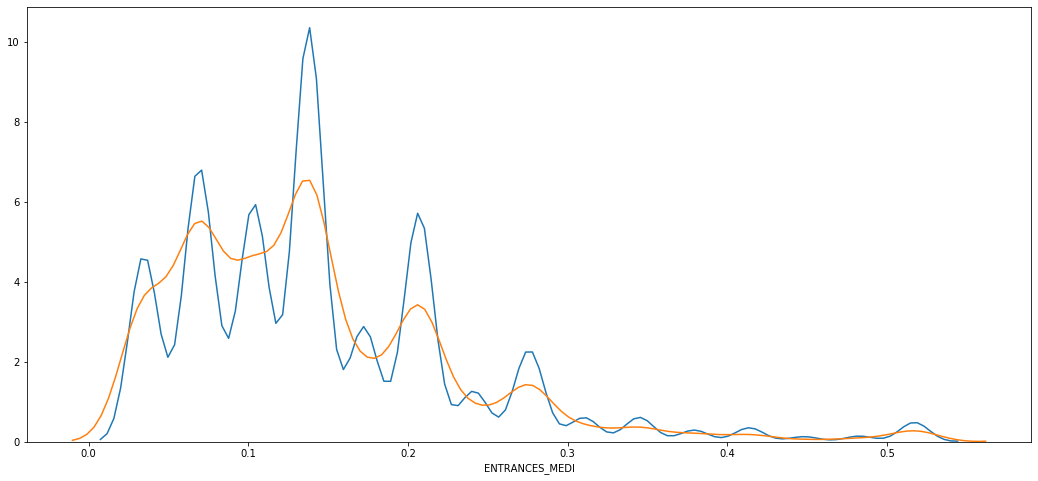

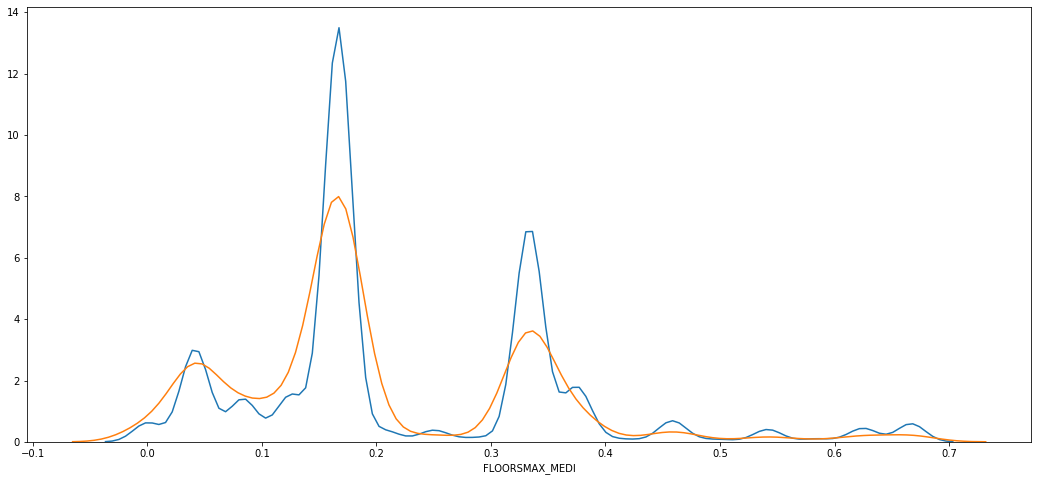

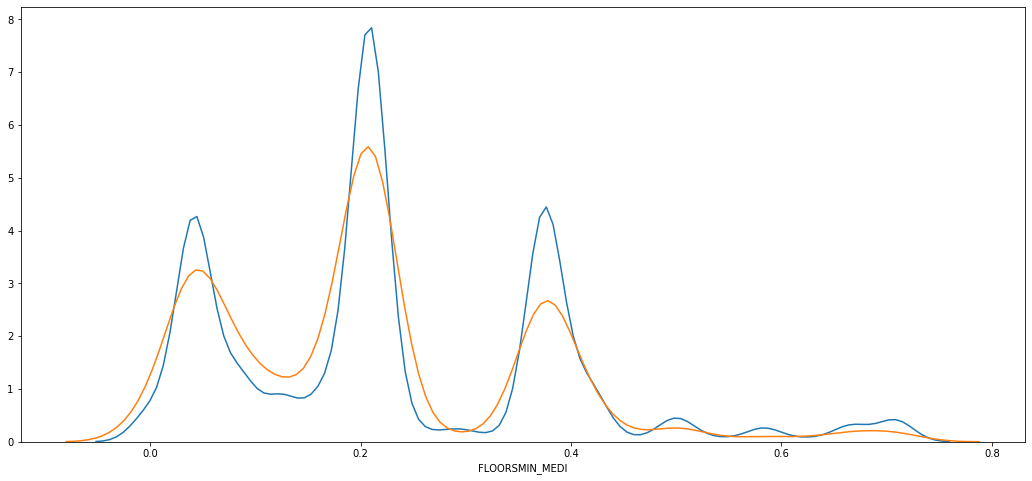

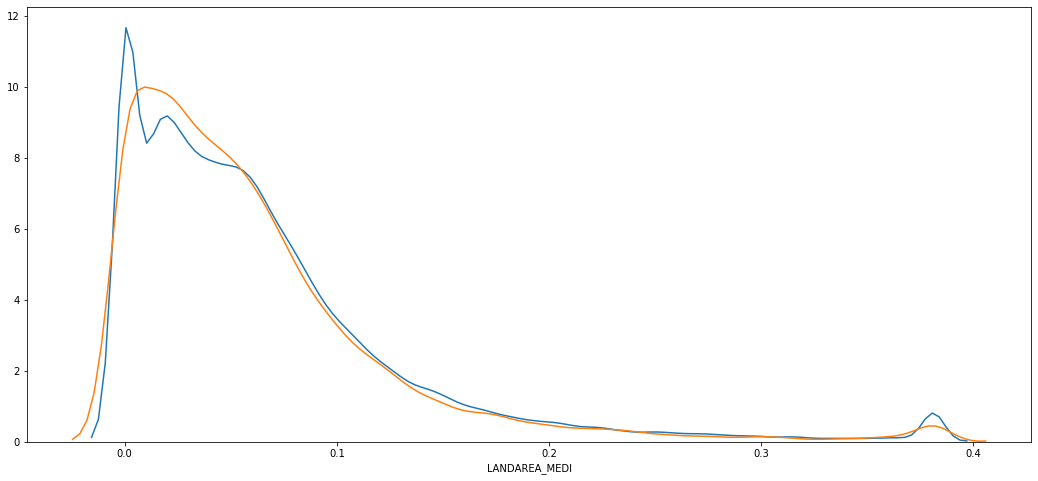

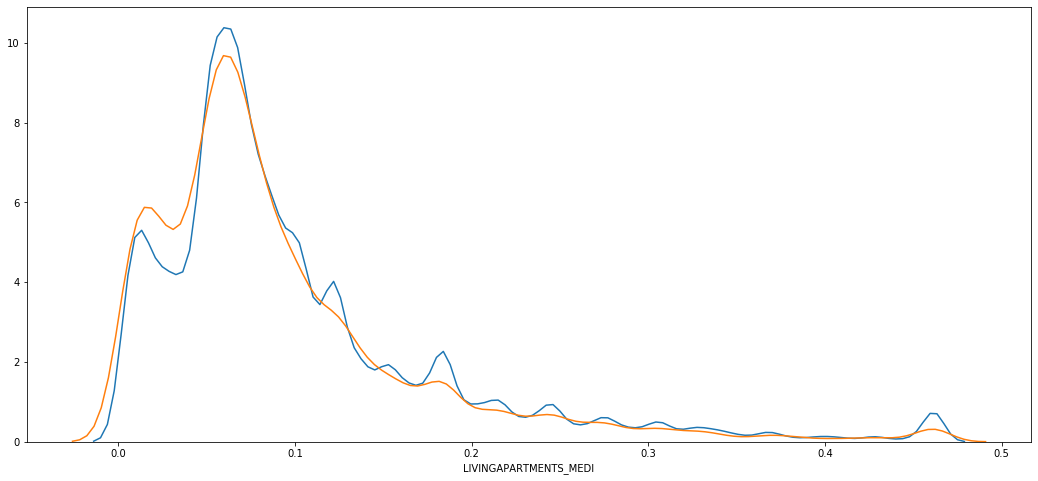

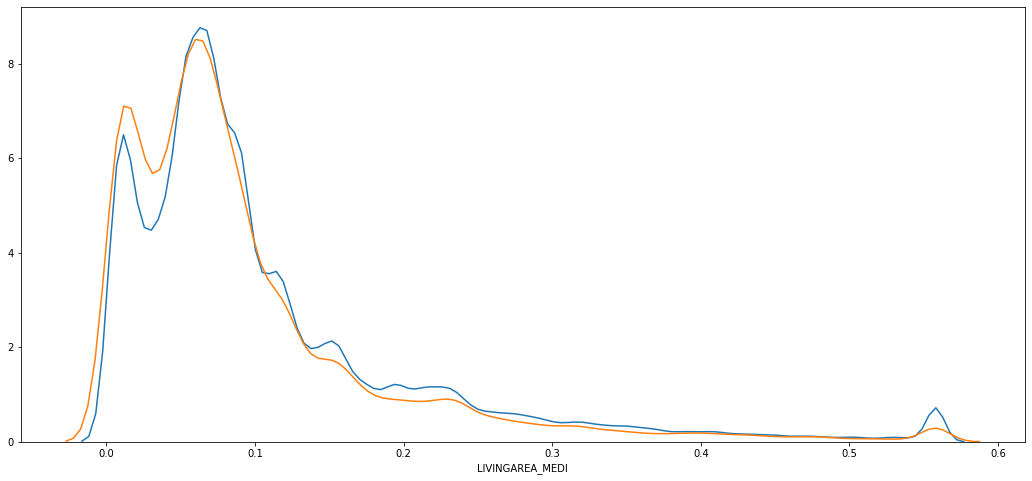

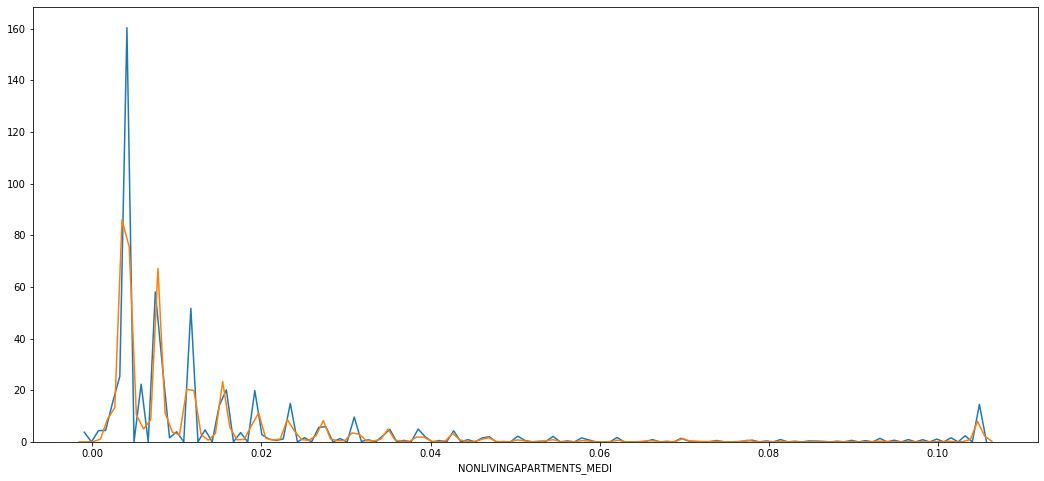

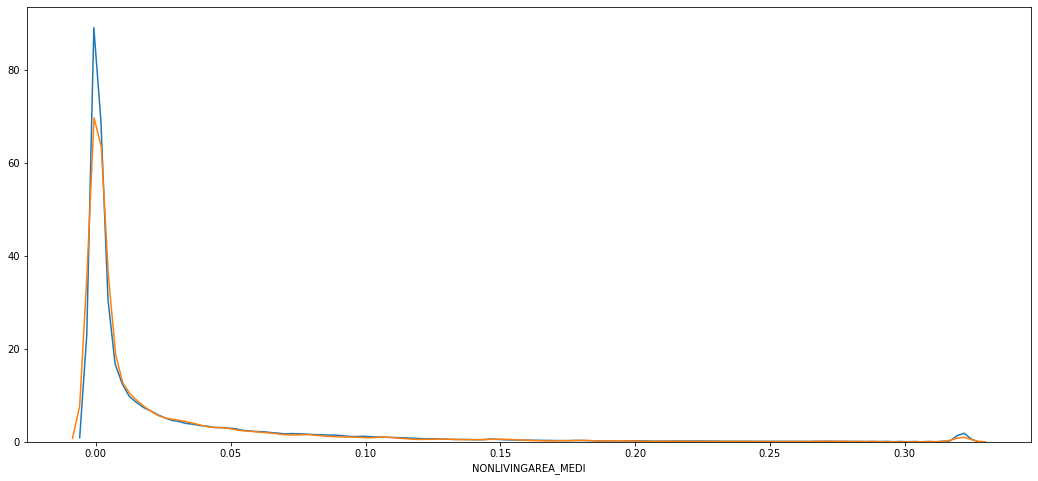

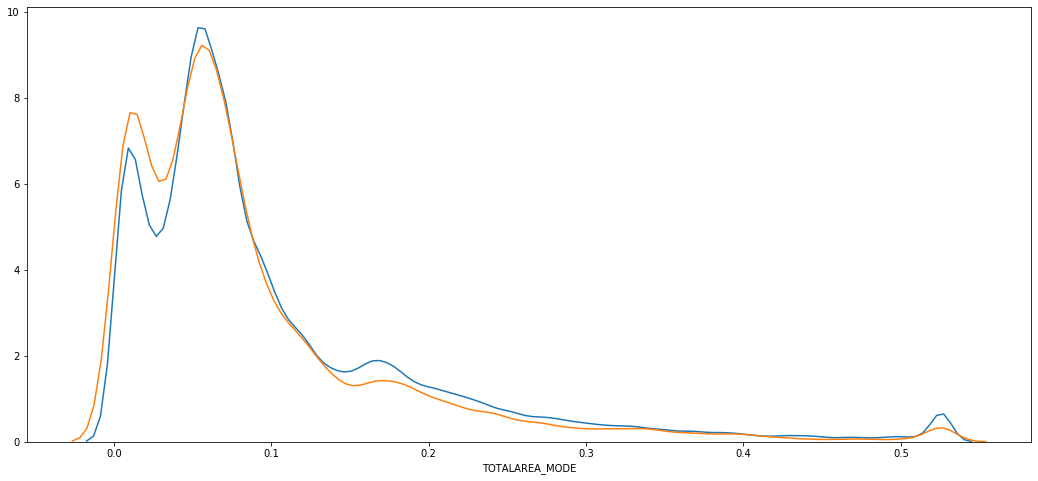

In [405]:
for feature in APARTMENT_GROUP:
    if feature in ['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
                   'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']:
        continue
    plt.figure(figsize=(18, 8))

    sns.distplot(application[application['TARGET'] == 0][feature], 
                 hist=False)
    sns.distplot(application[application['TARGET'] == 1][feature], 
                 hist=False)
    plt.show()

In [339]:
d = 0.2
ql, qr = application[feature].quantile(0.01), application[feature].quantile(0.99)
print(ql, qr)
feature = 'APARTMENTS_AVG'
x1 = application[(application[feature] < d)]
x2 = application[(application[feature] >= d)]

print('<0.003 1e8 {}% случаев'.format(100 * x1['TARGET'].mean()), x1.shape[0])
print('>0.003 1e8 {}% случаев'.format(100 * x2['TARGET'].mean()), x2.shape[0])

0.0021 0.5448610000000103
<0.003 1e8 7.199202597786897% случаев 128417
>0.003 1e8 5.622367906916164% случаев 23033


In [66]:
stats = get_df_general_stats(apartment_application)
stats

CountNaN  RateNaN%  CountUnique  MinValue  \
APARTMENTS_AVG                  156061        50         2339       0.0   
BASEMENTAREA_AVG                179943        58         3780       0.0   
YEARS_BEGINEXPLUATATION_AVG     150007        48          285       0.0   
YEARS_BUILD_AVG                 204488        66          149       0.0   
COMMONAREA_AVG                  214865        69         3181       0.0   
ELEVATORS_AVG                   163891        53          257       0.0   
FLOORSMAX_AVG                   153020        49          403       0.0   
FLOORSMIN_AVG                   208642        67          305       0.0   
LANDAREA_AVG                    182590        59         3527       0.0   
LIVINGAPARTMENTS_AVG            210199        68         1868       0.0   
LIVINGAREA_AVG                  154350        50         5199       0.0   
NONLIVINGAPARTMENTS_AVG         213514        69          386       0.0   
NONLIVINGAREA_AVG               169682        55         3290       0.0   
APARTMENTS_MODE                 156061        50          760       0.0   
BASEMENTAREA_MODE               179943        58         3841       0.0   
YEARS_BEGINEXPLUATATION_MODE    150007        48          221       0.0   
YEARS_BUILD_MODE                204488        66          154       0.0   
COMMONAREA_MODE                 214865        69         3128       0.0   
ELEVATORS_MODE                  163891        53           26       0.0   
ENTRANCES_MODE                  154828        50           30       0.0   
FLOORSMAX_MODE                  153020        49           25       0.0   
FLOORSMIN_MODE                  208642        67           25       0.0   
LANDAREA_MODE                   182590        59         3563       0.0   
LIVINGAPARTMENTS_MODE           210199        68          736       0.0   
LIVINGAREA_MODE                 154350        50         5301       0.0   
NONLIVINGAPARTMENTS_MODE        213514        69          167       0.0   
NONLIVINGAREA_MODE              169682        55         3327       0.0   
APARTMENTS_MEDI                 156061        50         1148       0.0   
BASEMENTAREA_MEDI               179943        58         3772       0.0   
YEARS_BEGINEXPLUATATION_MEDI    150007        48          245       0.0   
YEARS_BUILD_MEDI                204488        66          151       0.0   
COMMONAREA_MEDI                 214865        69         3202       0.0   
ELEVATORS_MEDI                  163891        53           46       0.0   
ENTRANCES_MEDI                  154828        50           46       0.0   
FLOORSMAX_MEDI                  153020        49           49       0.0   
FLOORSMIN_MEDI                  208642        67           47       0.0   
LANDAREA_MEDI                   182590        59         3560       0.0   
LIVINGAPARTMENTS_MEDI           210199        68         1097       0.0   
LIVINGAREA_MEDI                 154350        50         5281       0.0   
NONLIVINGAPARTMENTS_MEDI        213514        69          214       0.0   
NONLIVINGAREA_MEDI              169682        55         3323       0.0   
FONDKAPREMONT_MODE              210295        68            4       NaN   
HOUSETYPE_MODE                  154297        50            3       NaN   
TOTALAREA_MODE                  148431        48         5116       0.0   
WALLSMATERIAL_MODE              156341        50            7       NaN   
EMERGENCYSTATE_MODE             145755        47            2       NaN   

                              MaxValue      Mean       Std  Median  
APARTMENTS_AVG                     1.0  0.117440  0.108240  0.0876  
BASEMENTAREA_AVG                   1.0  0.088442  0.082438  0.0763  
YEARS_BEGINEXPLUATATION_AVG        1.0  0.977735  0.059223  0.9816  
YEARS_BUILD_AVG                    1.0  0.752471  0.113280  0.7552  
COMMONAREA_AVG                     1.0  0.044621  0.076036  0.0211  
ELEVATORS_AVG                      1.0  0.078942  0.134576  0.0000  
FLOORSMAX_AVG        

In [70]:
APARTMENT_GROUP_CATEGORICAL = stats[stats['CountUnique'] < 8].index.tolist()
APARTMENT_GROUP_NUMERIC = stats[stats['CountUnique'] >= 8].index.tolist()

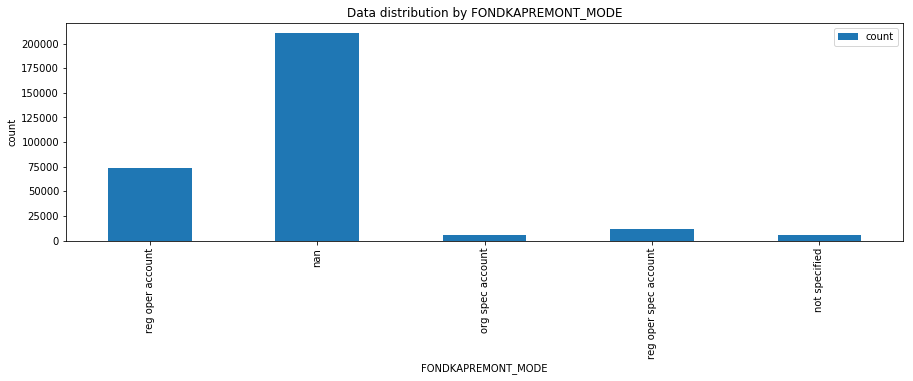

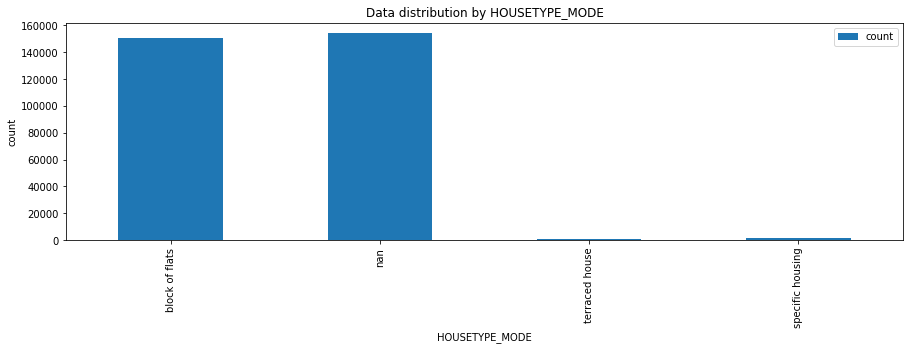

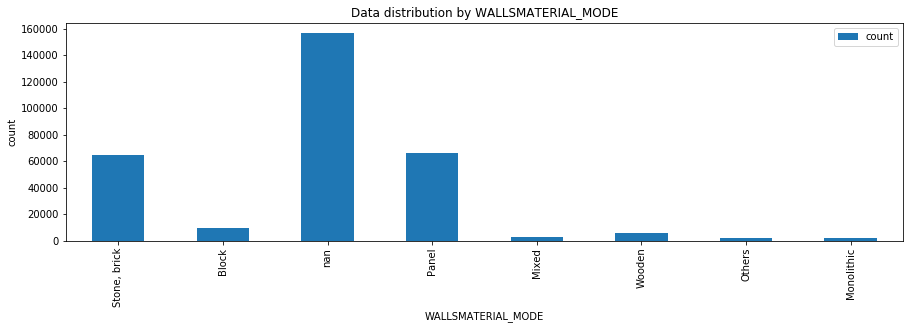

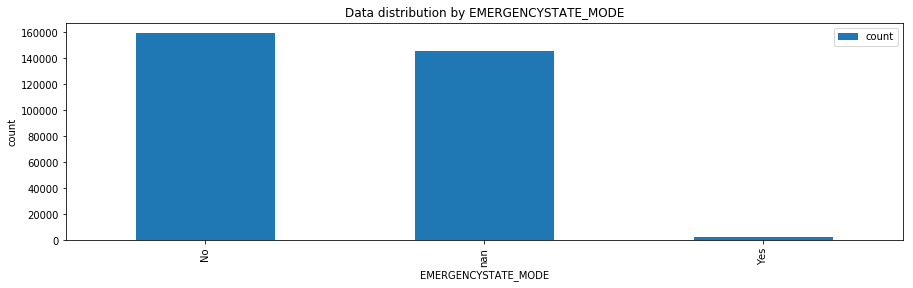

In [71]:
draw_hists_for_categorical_columns(APARTMENT_GROUP_CATEGORICAL, apartment_application)

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


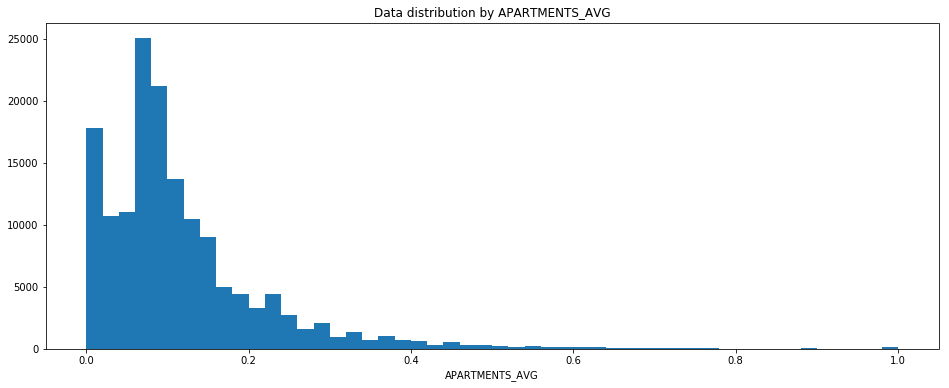

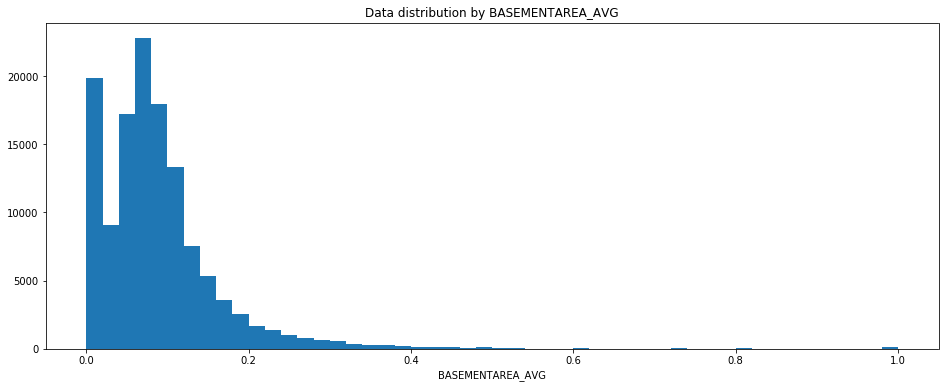

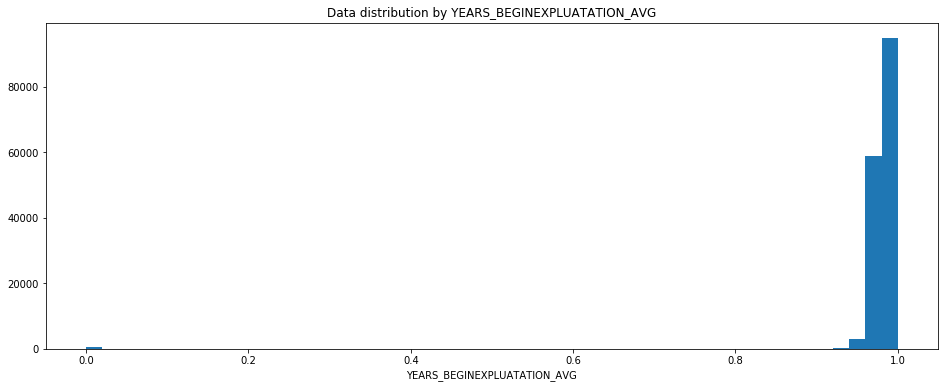

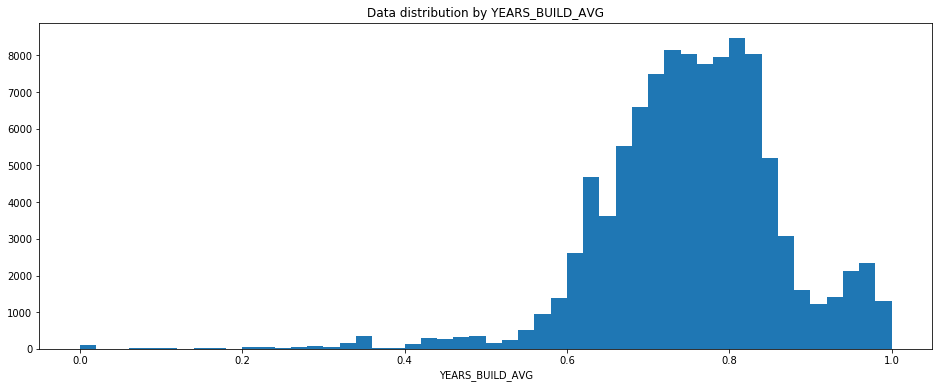

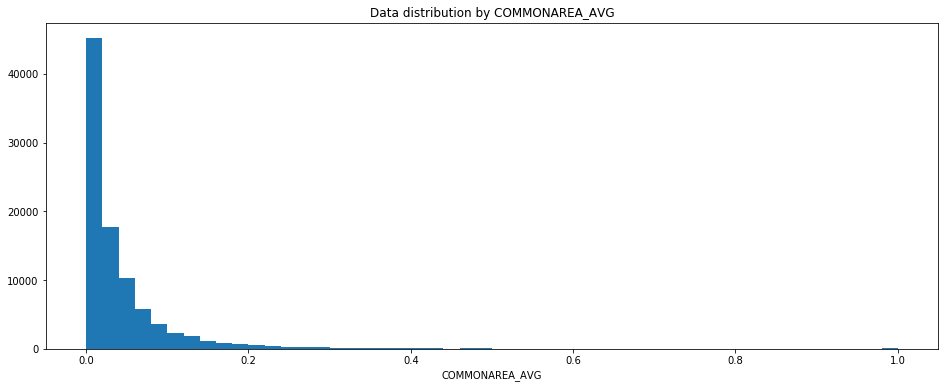

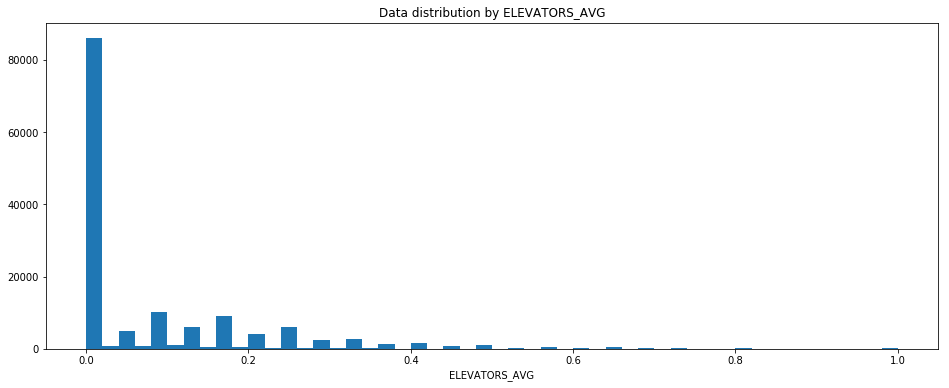

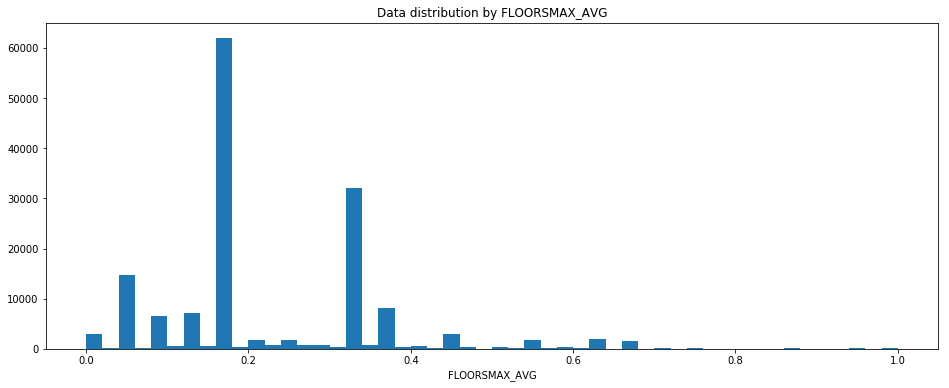

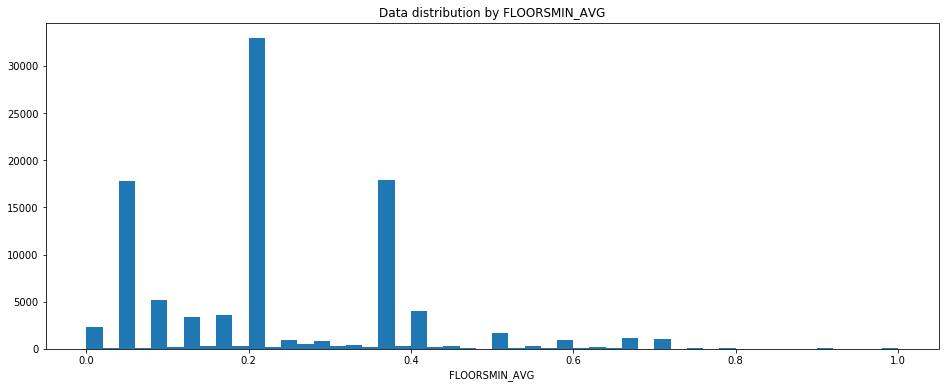

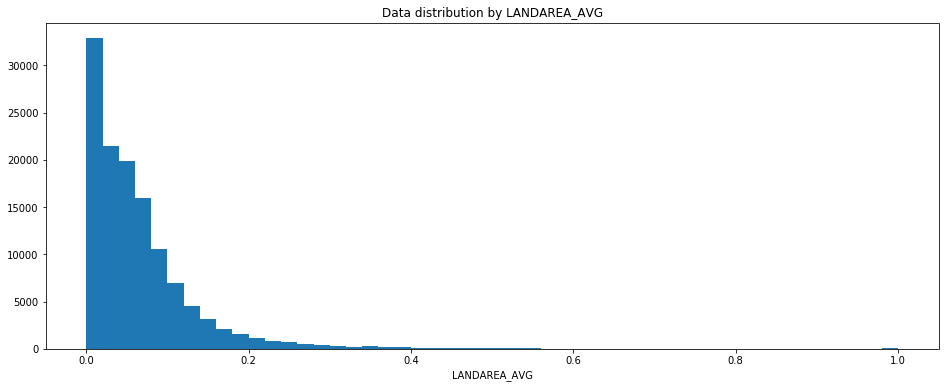

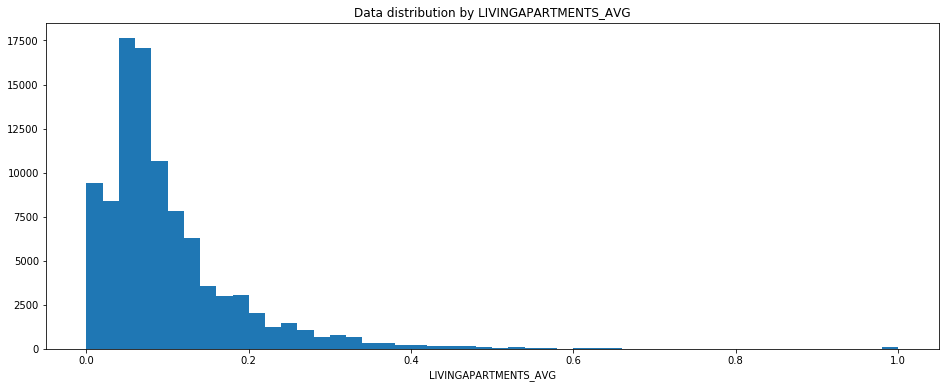

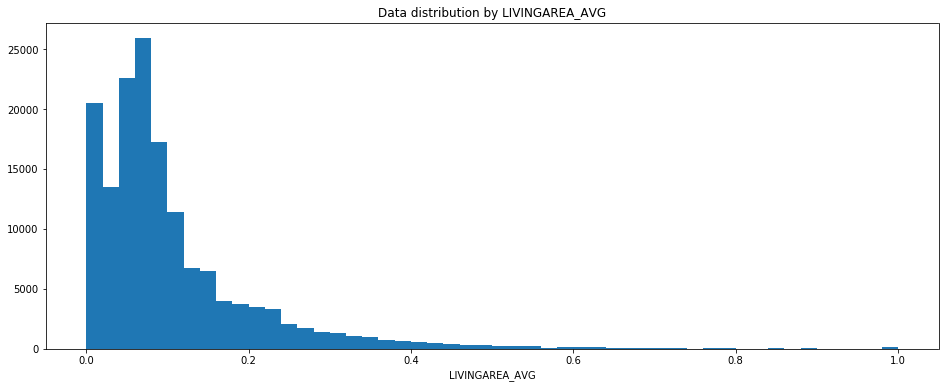

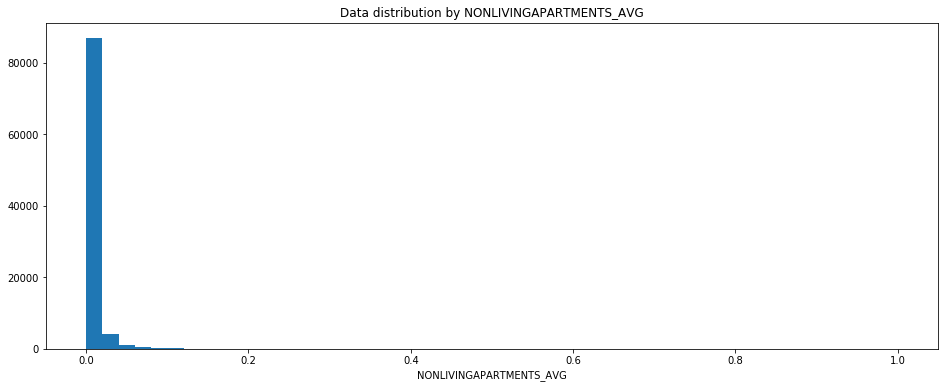

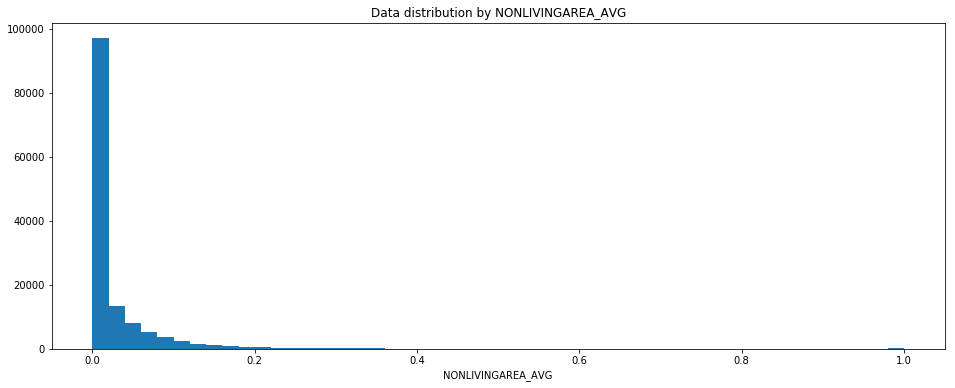

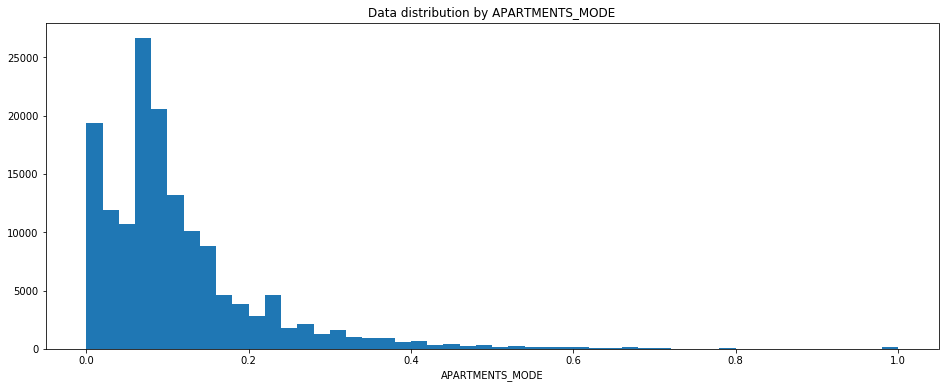

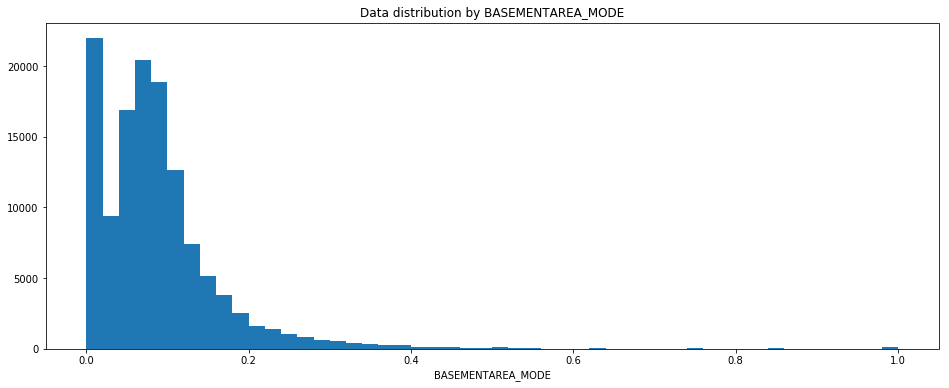

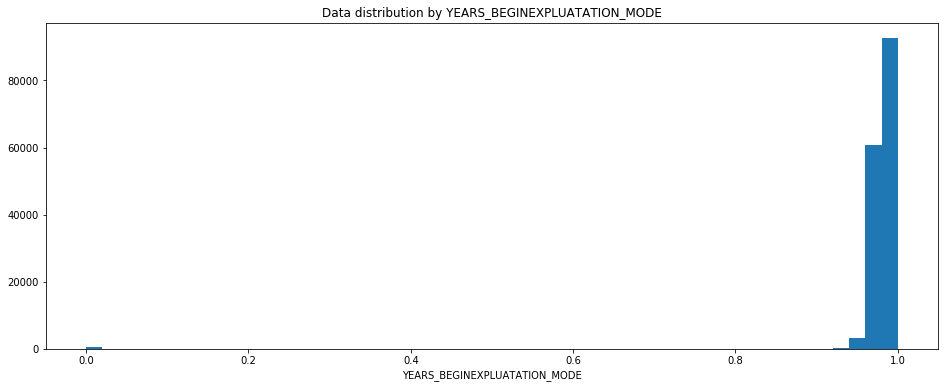

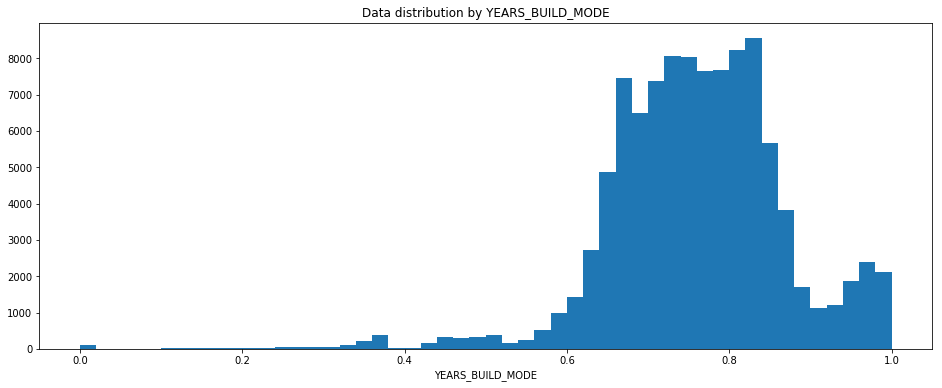

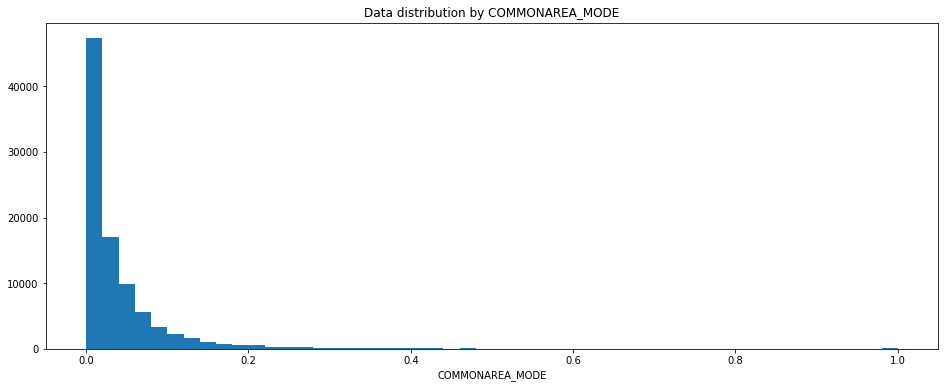

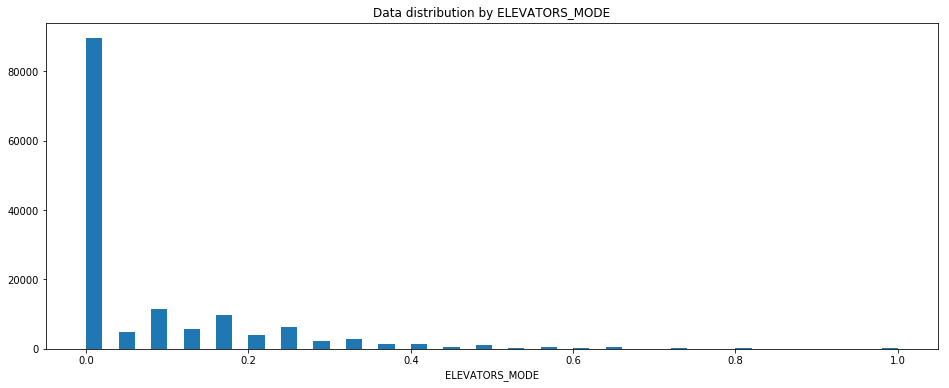

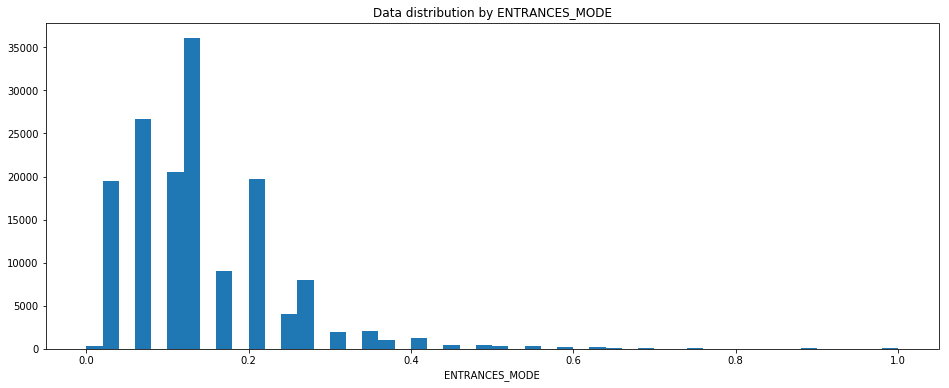

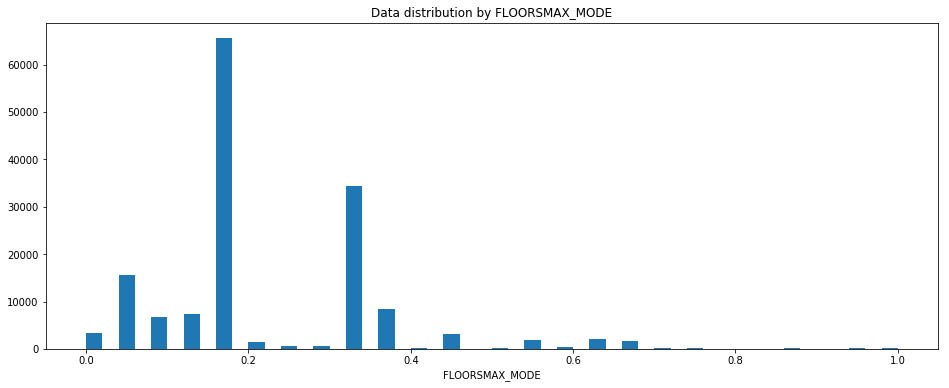

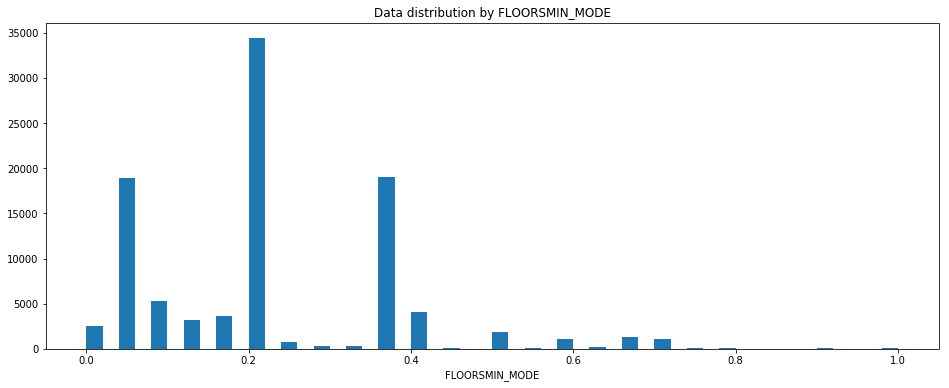

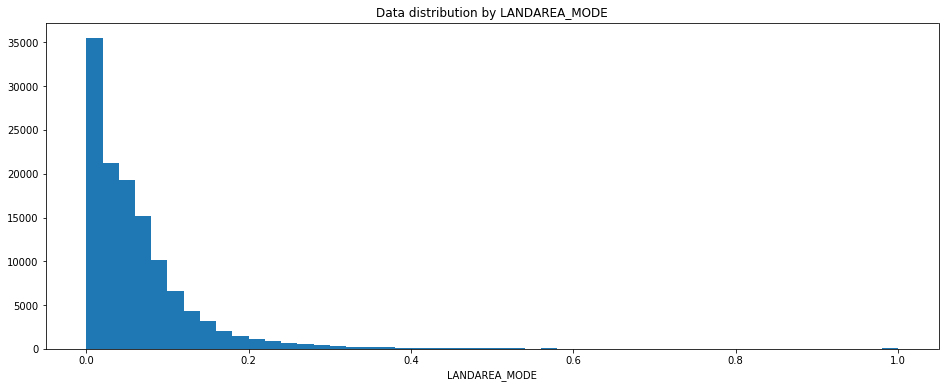

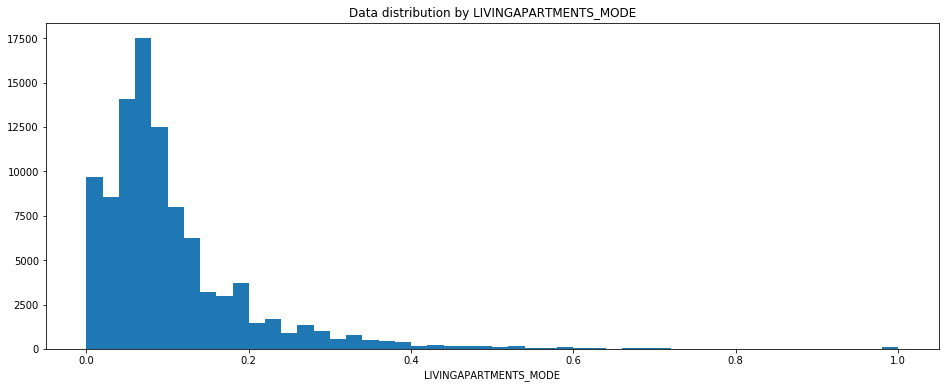

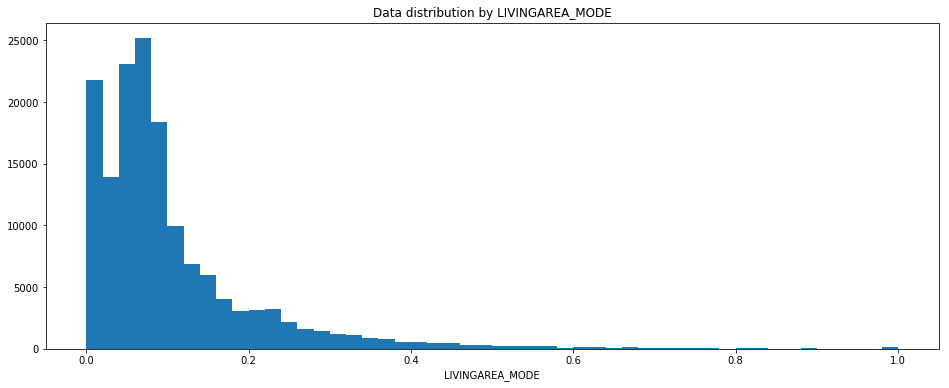

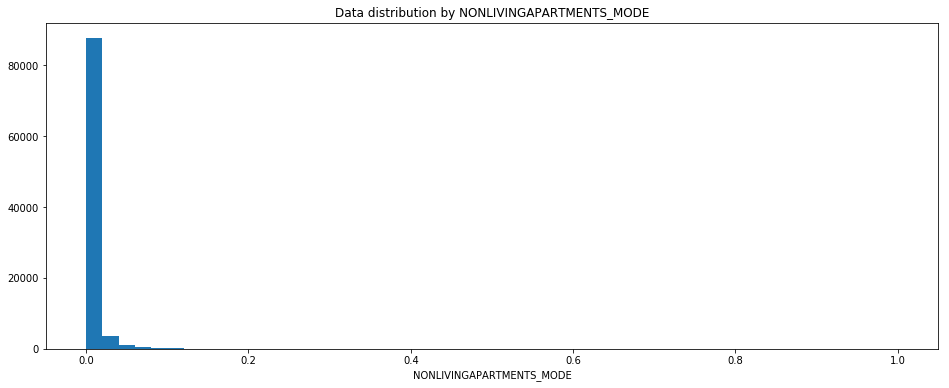

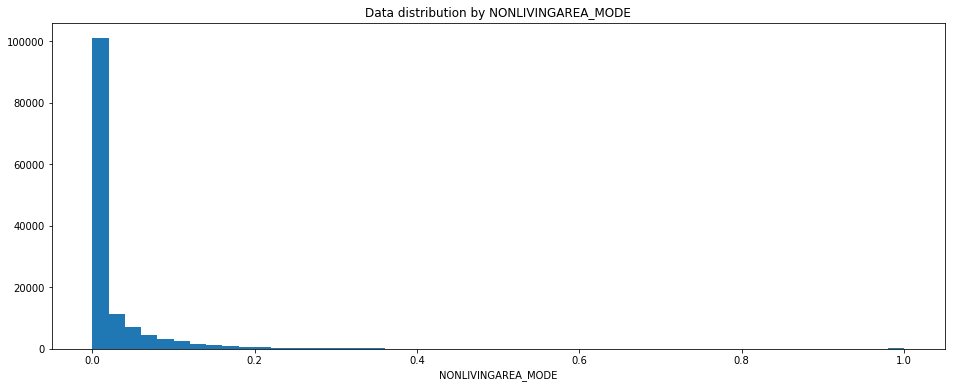

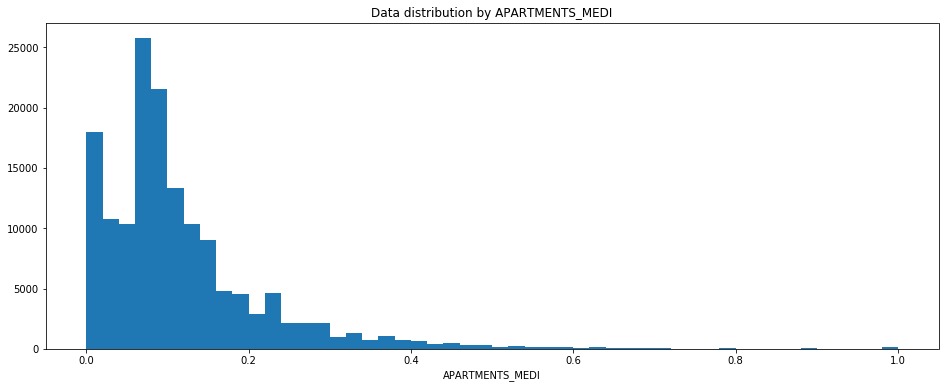

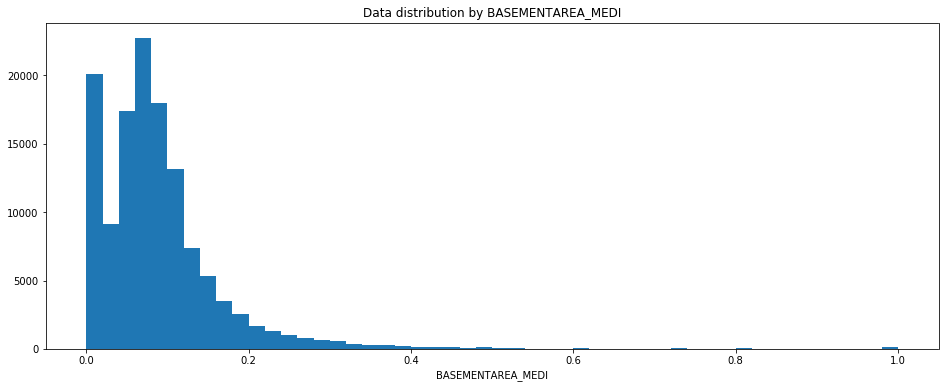

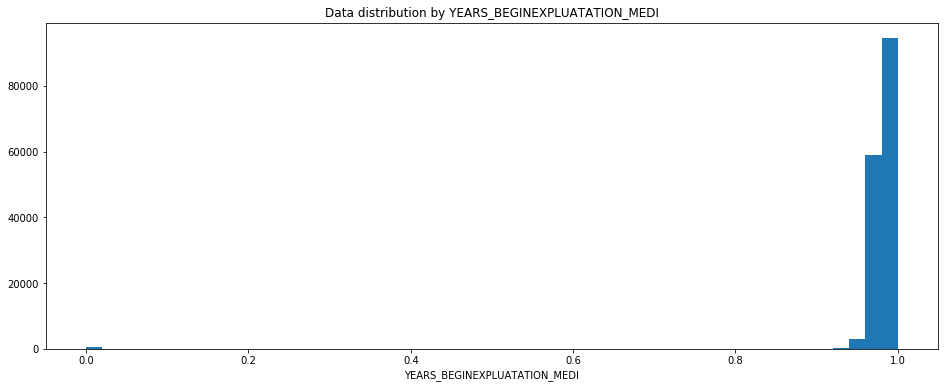

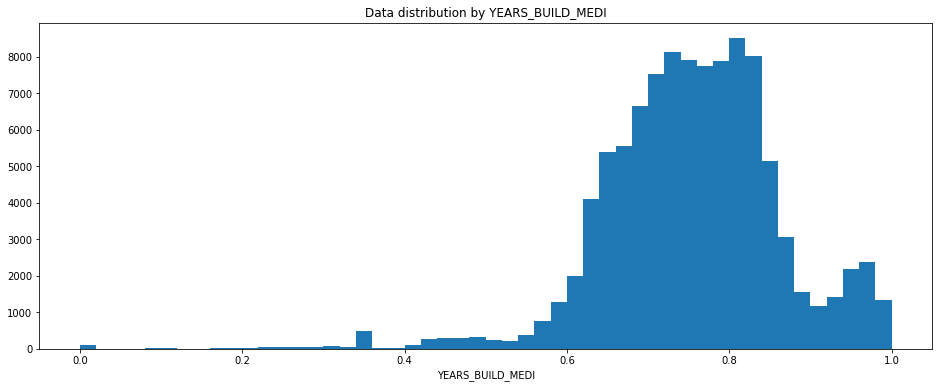

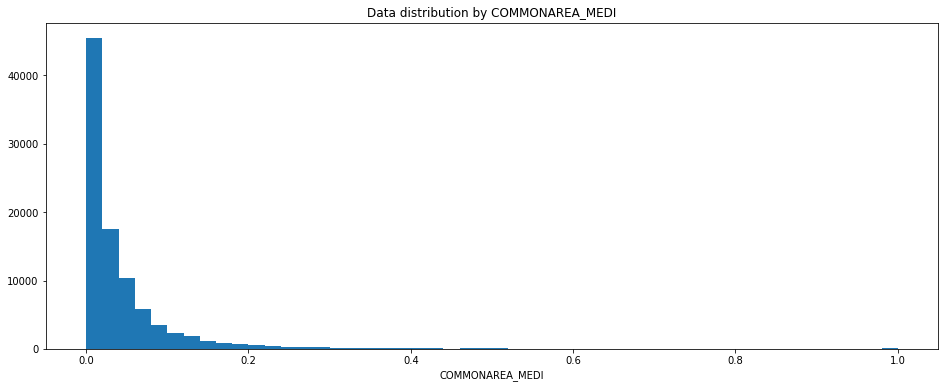

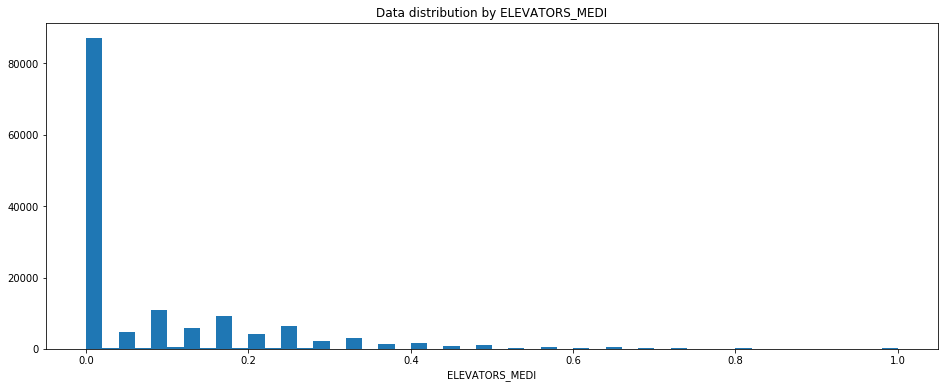

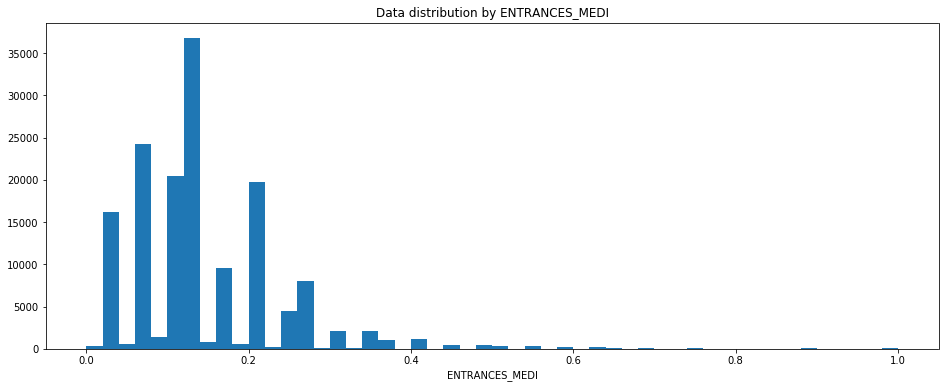

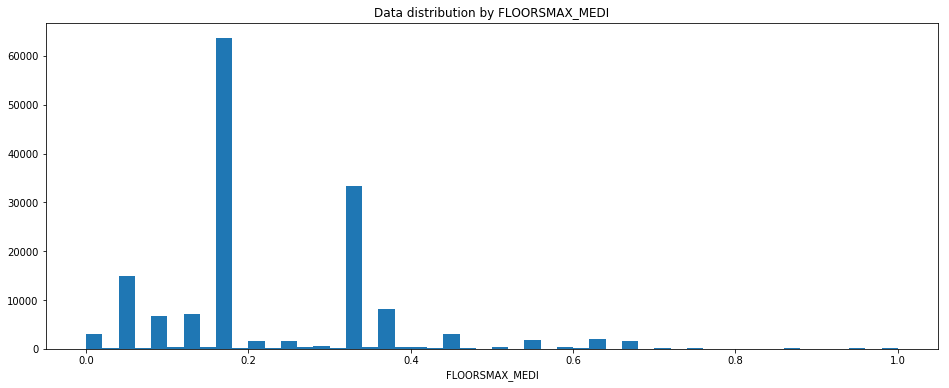

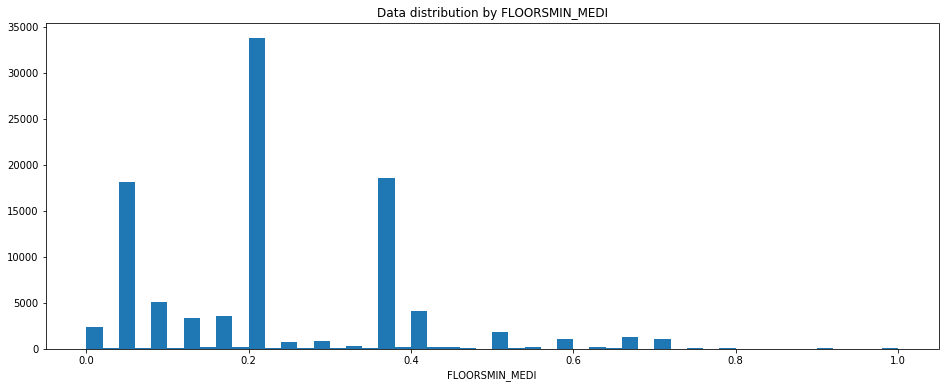

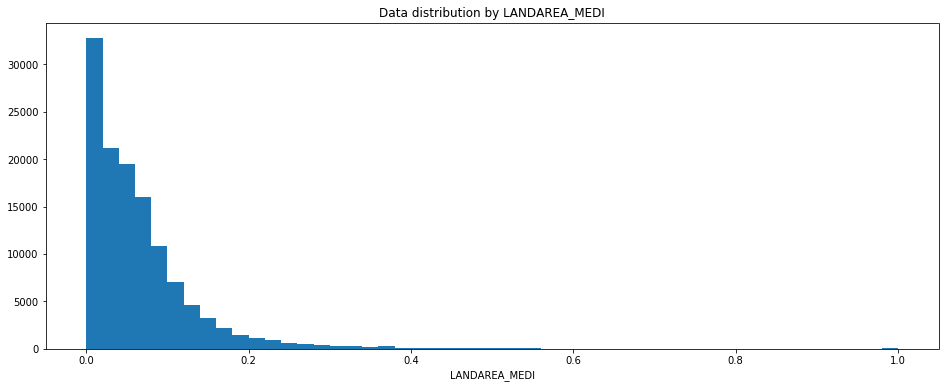

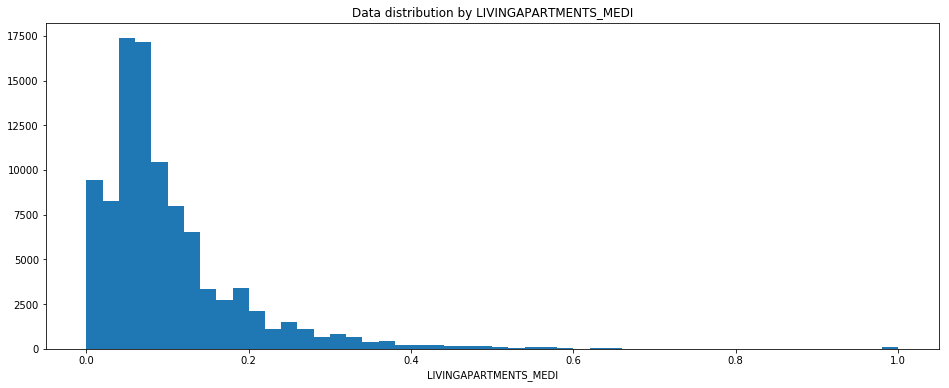

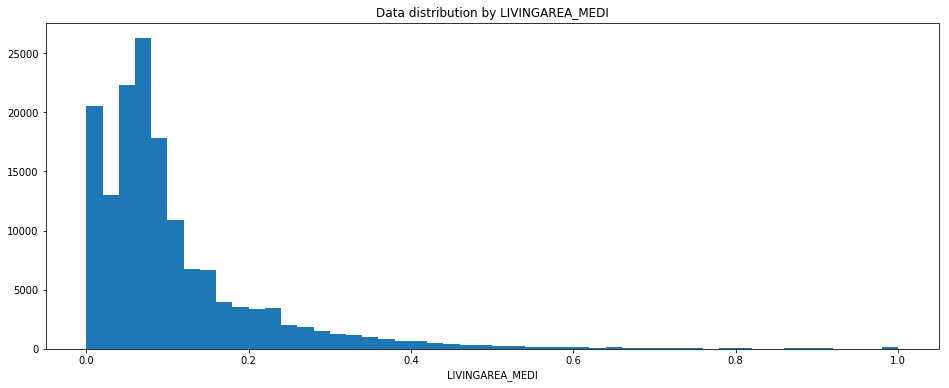

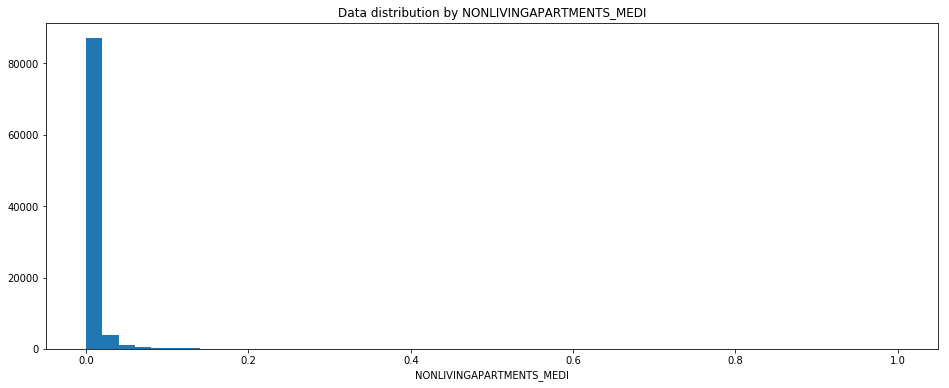

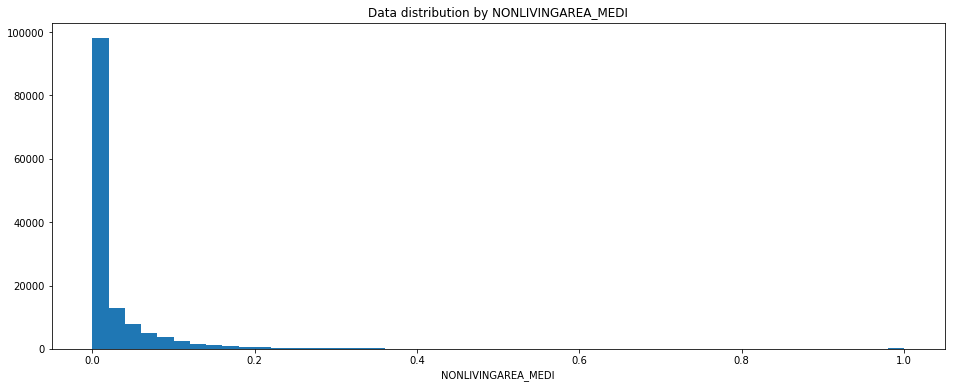

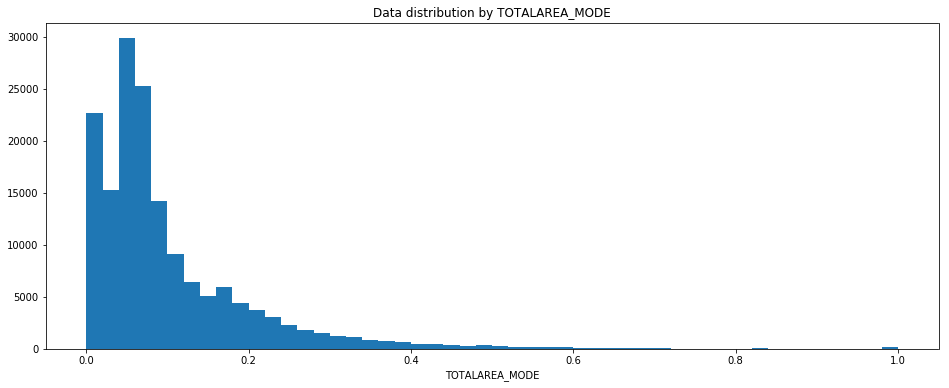

In [72]:
draw_hists_for_numerical_columns(APARTMENT_GROUP_NUMERIC, apartment_application)

### FLAG_DOCUMENT_GROUP

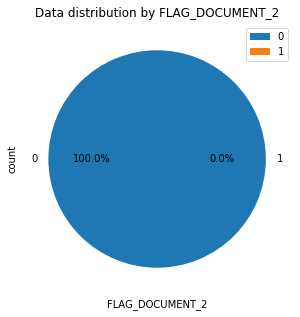

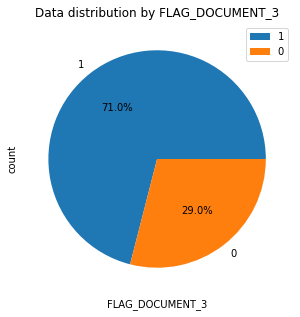

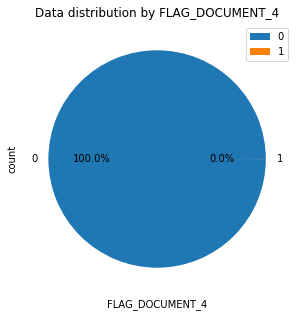

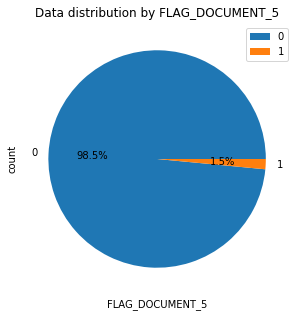

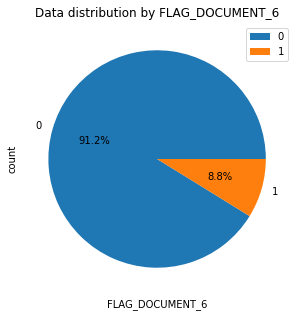

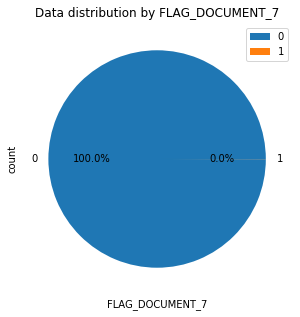

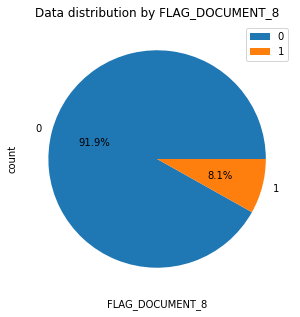

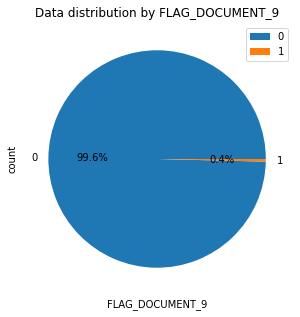

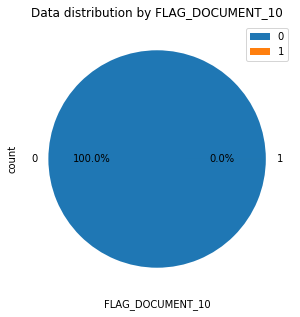

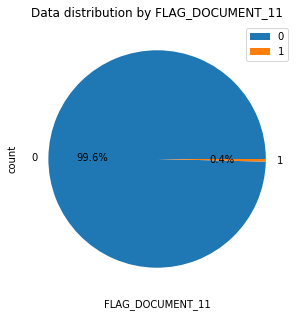

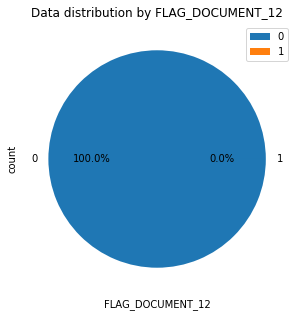

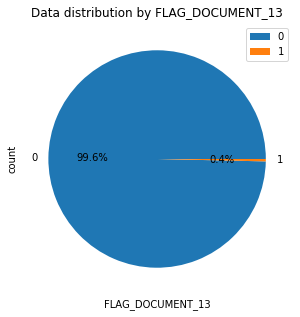

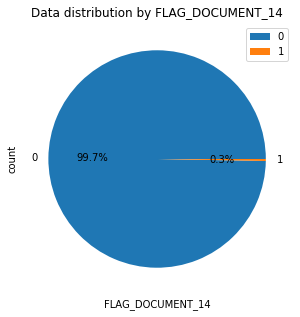

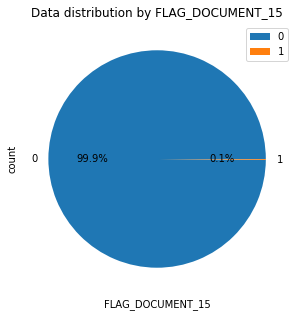

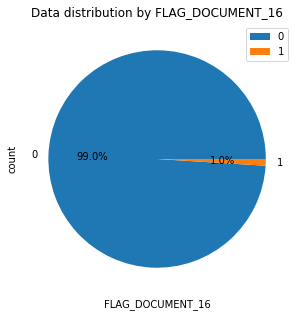

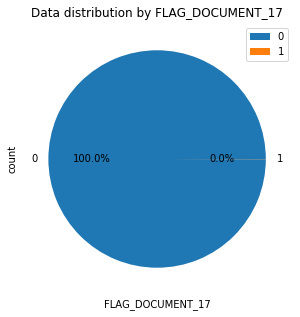

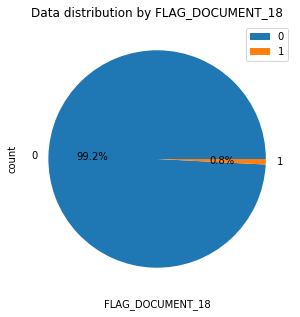

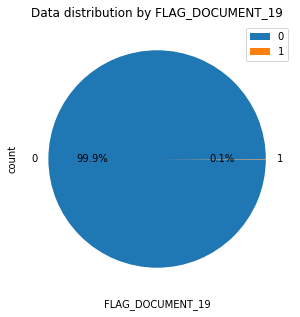

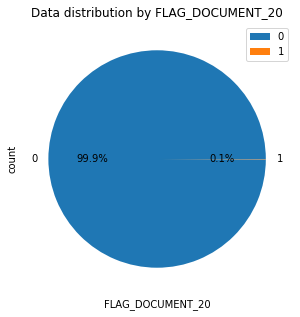

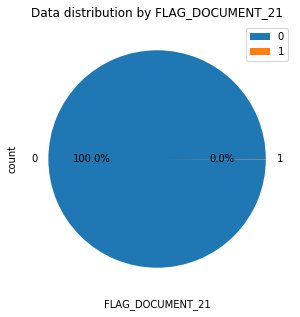

In [408]:
draw_pies_for_columns(FLAG_DOCUMENT_GROUP, application)

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


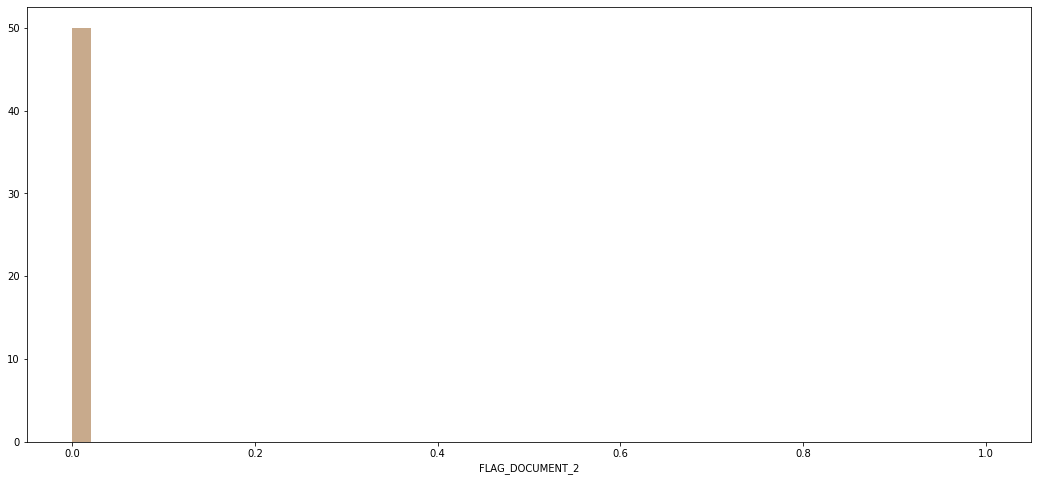

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


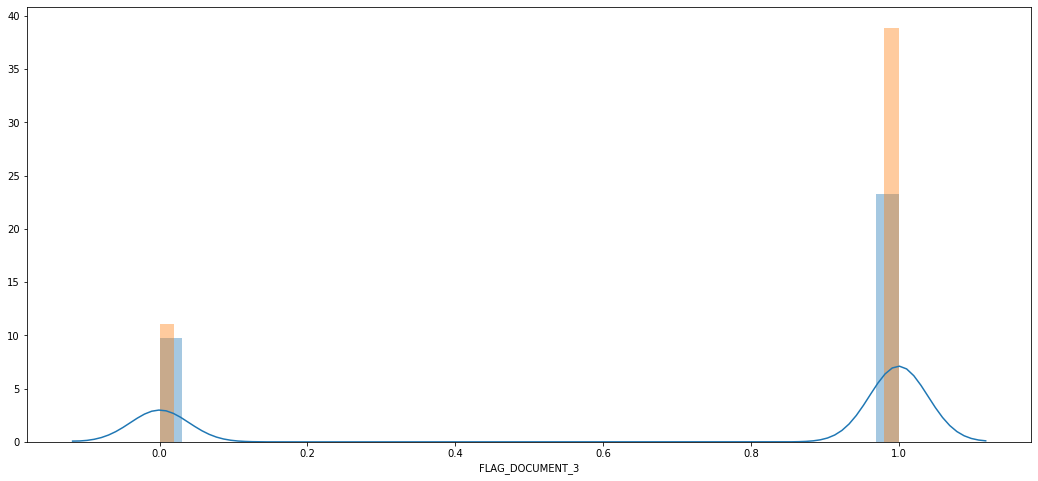

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


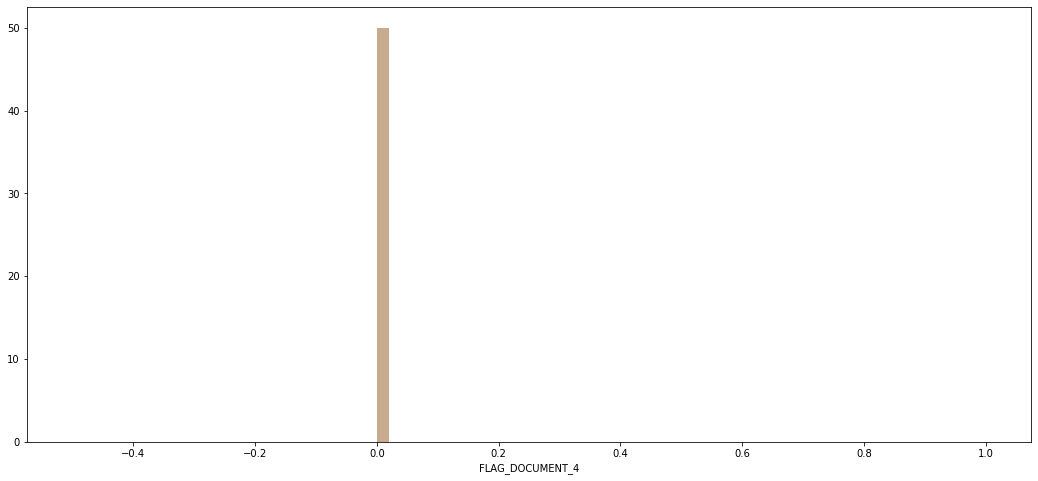

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


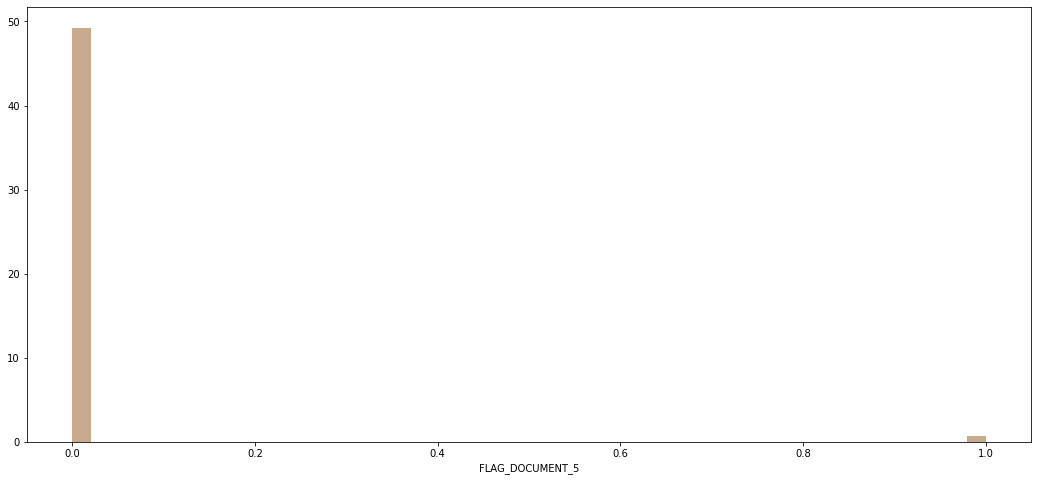

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


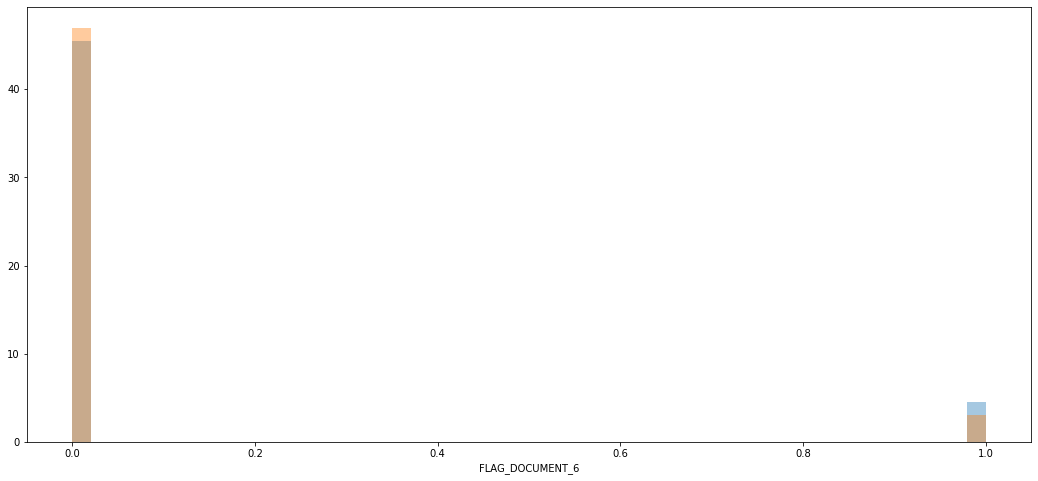

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


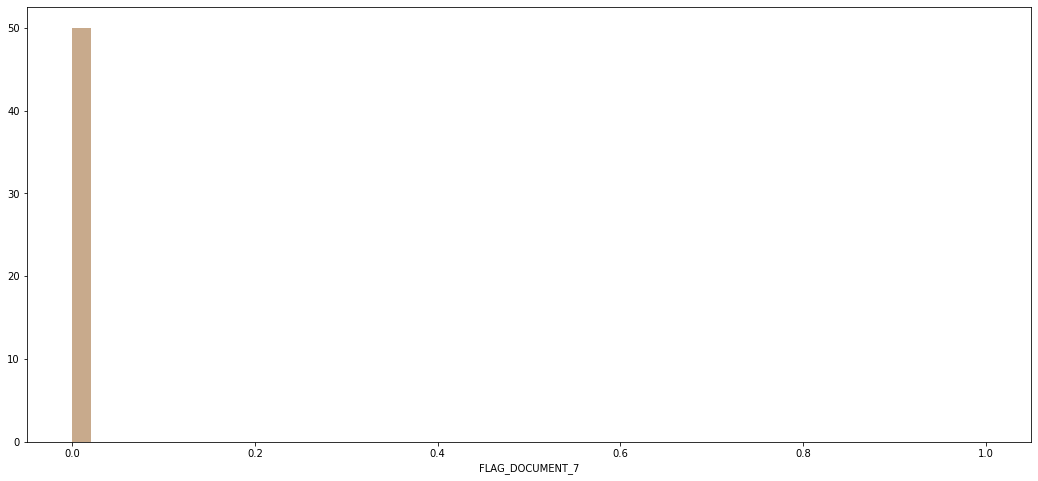

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


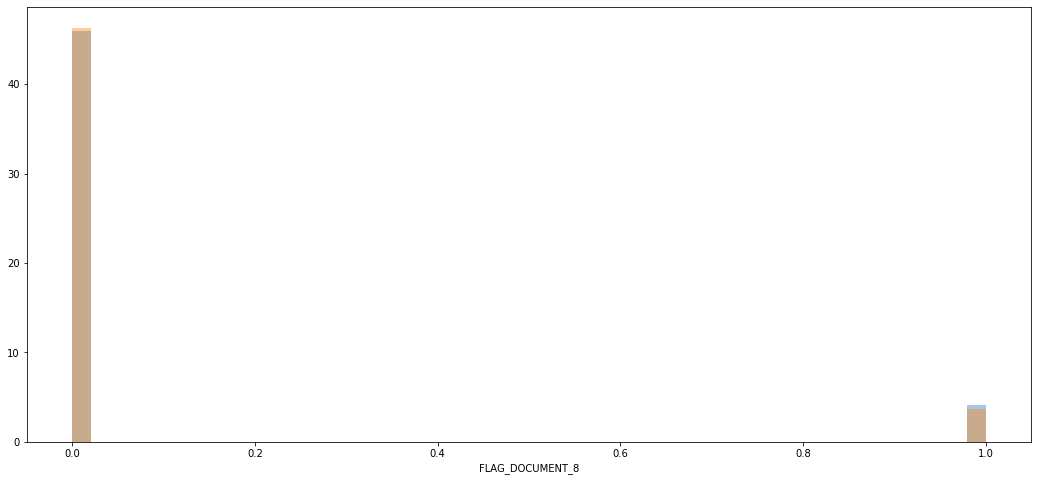

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


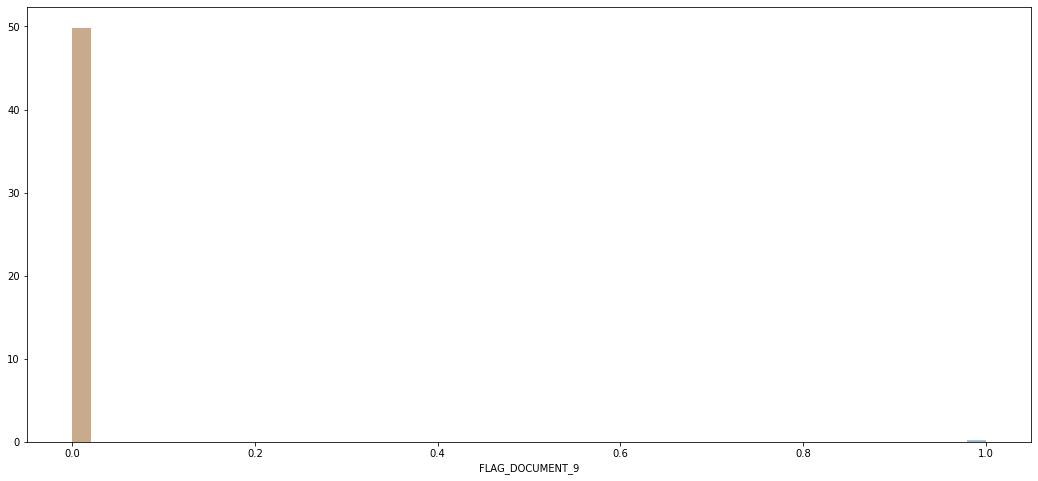

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


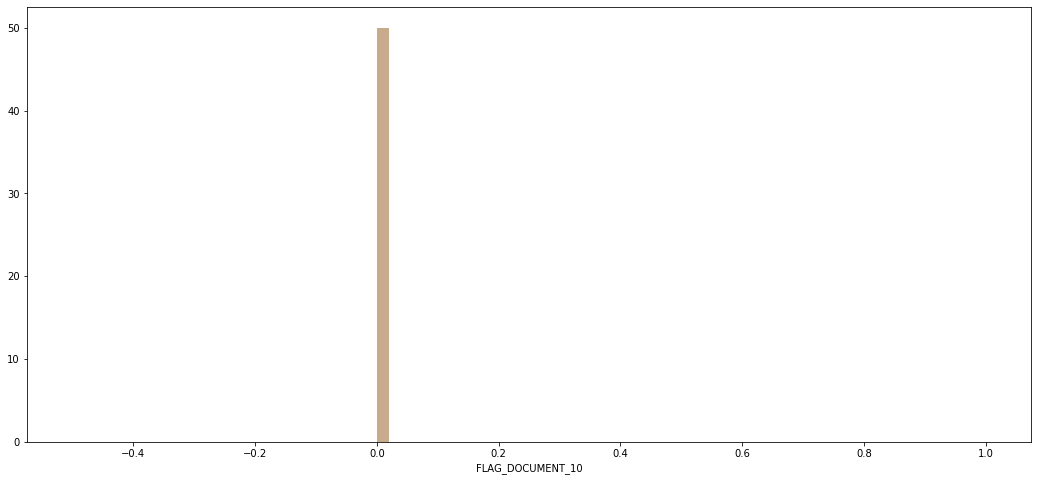

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


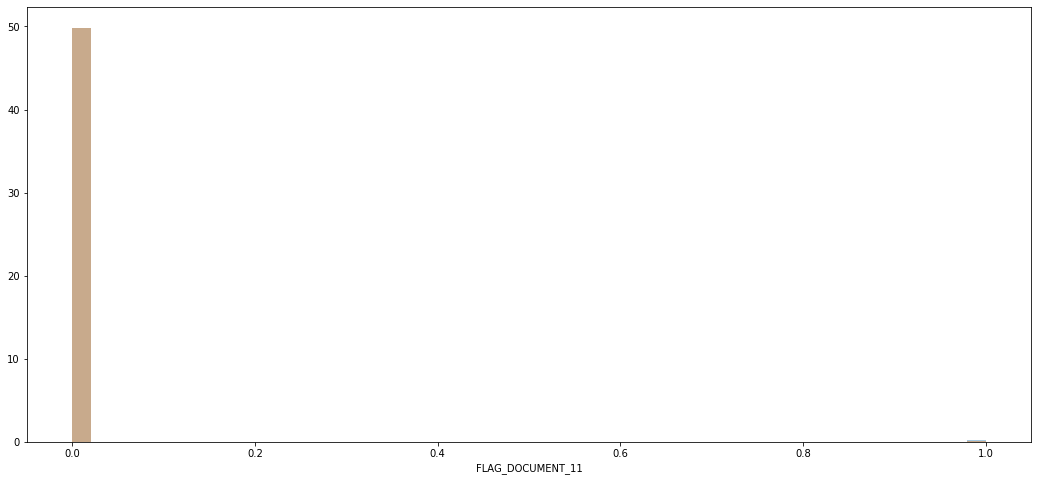

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


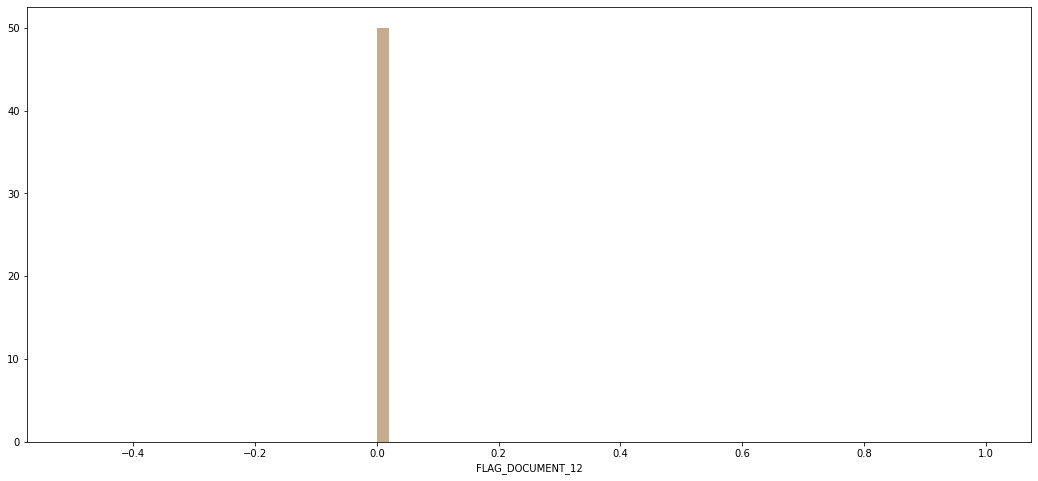

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


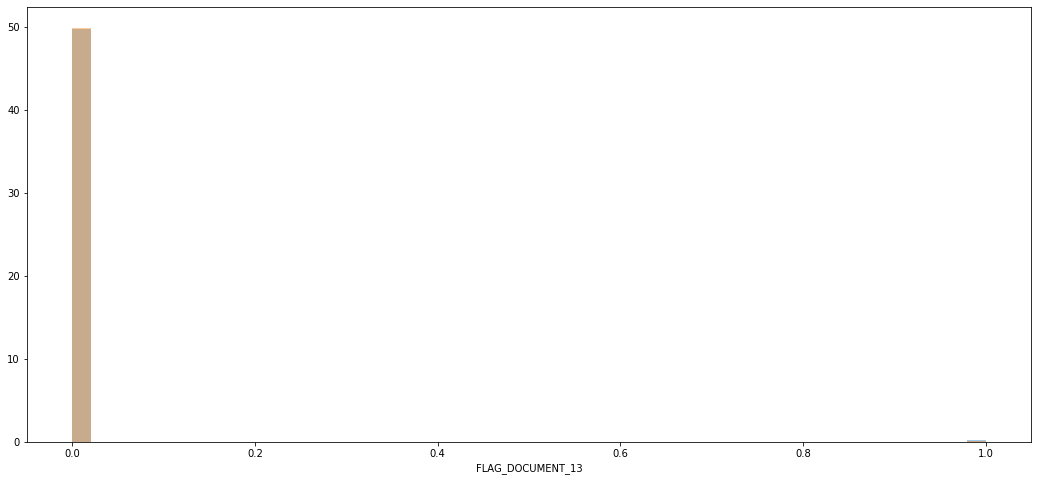

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


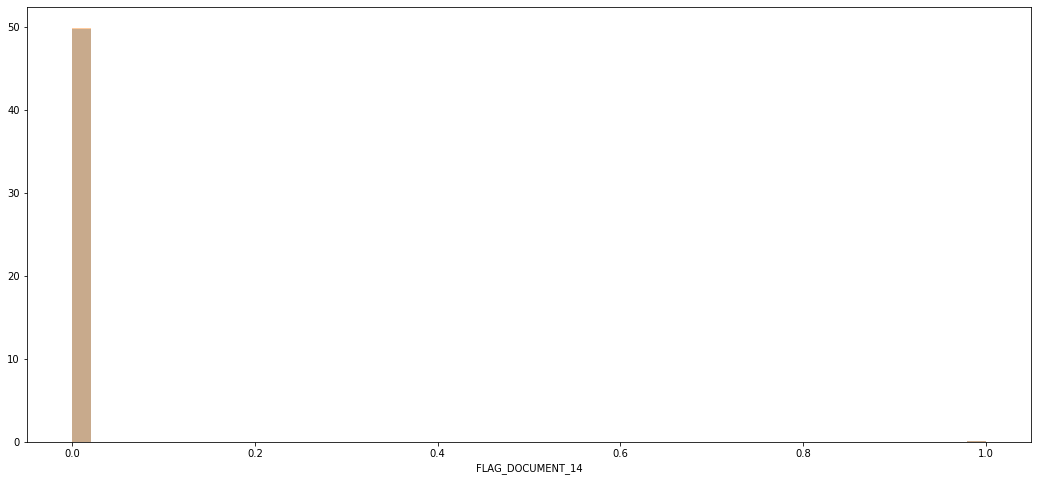

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


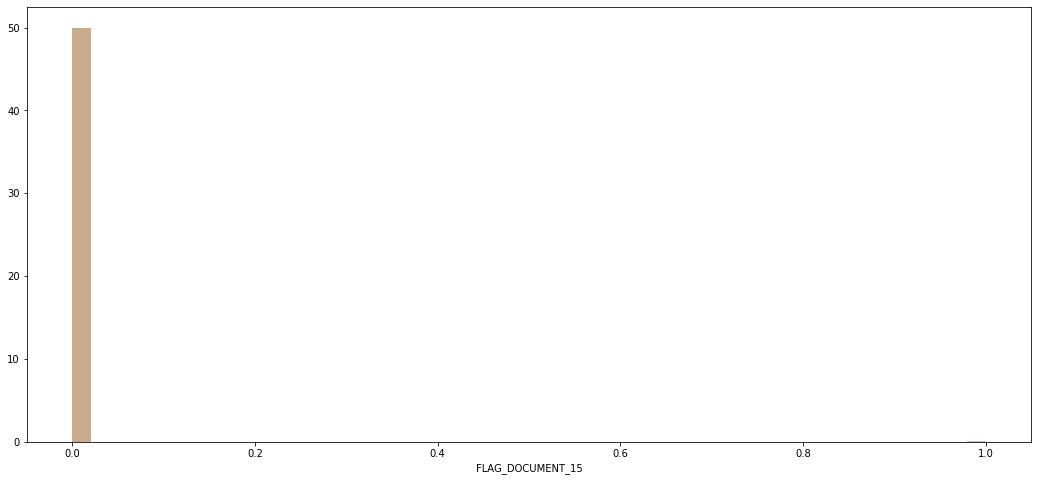

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


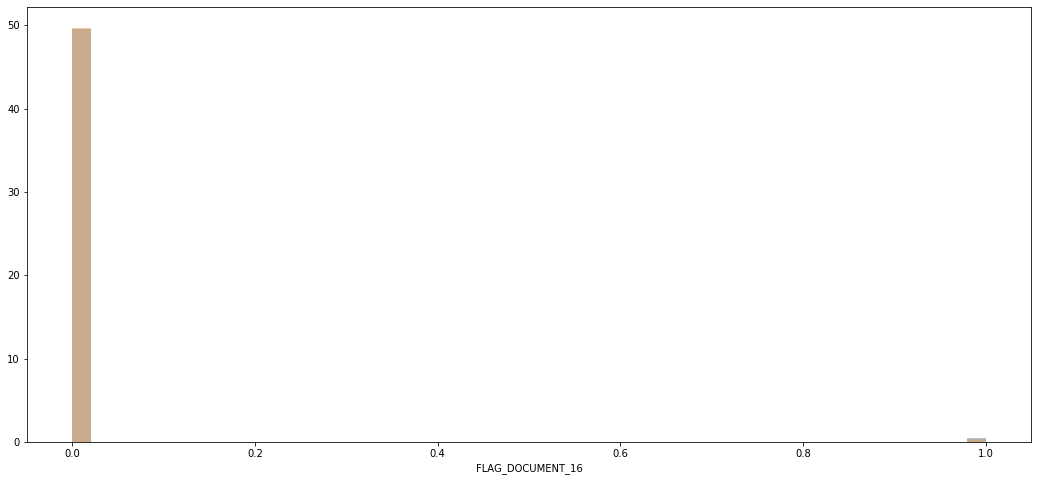

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


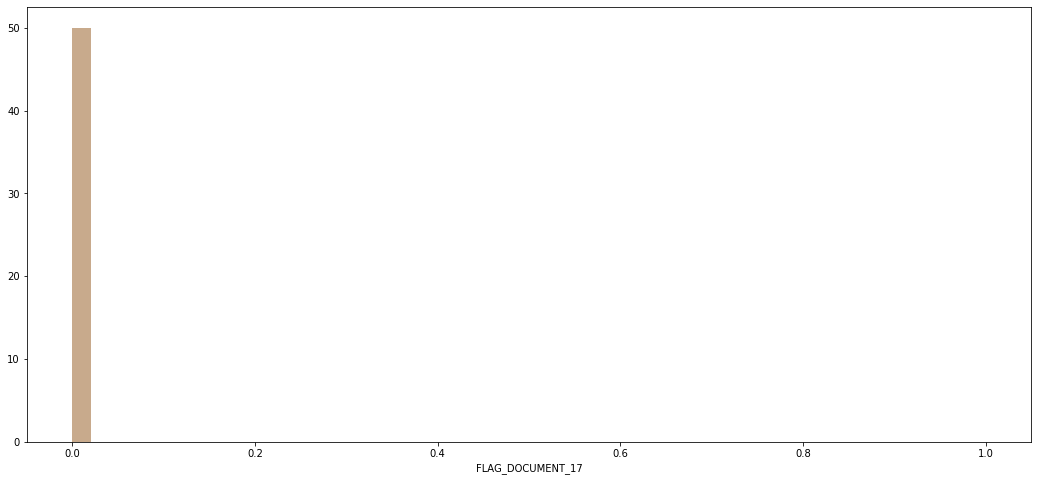

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


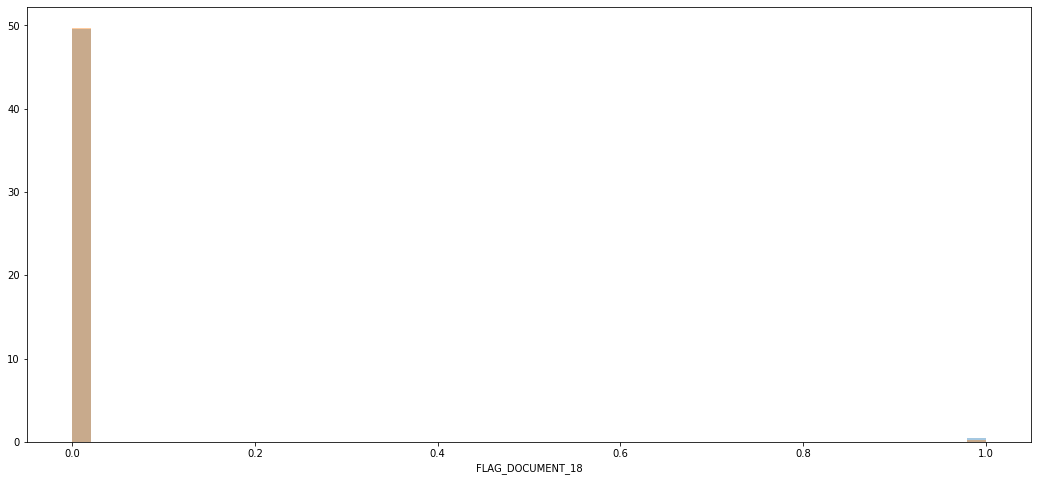

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


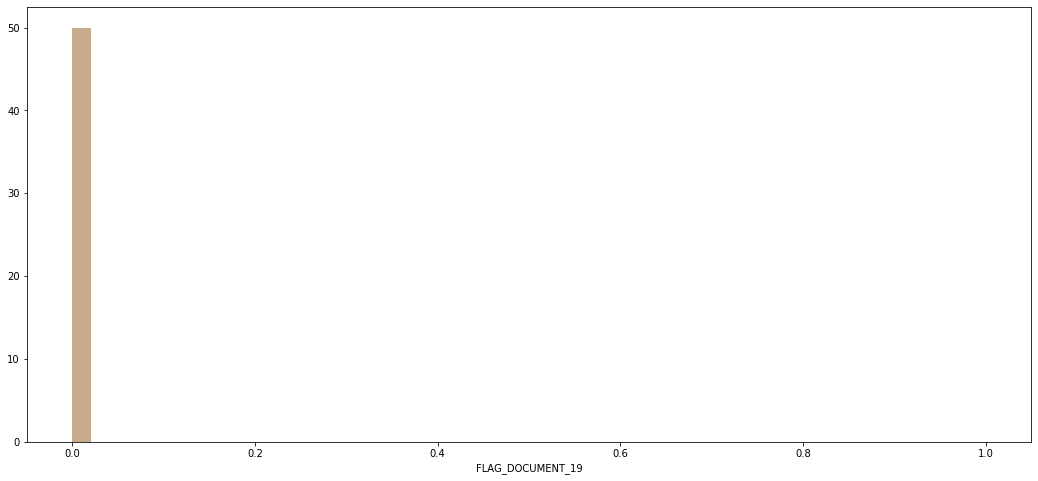

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


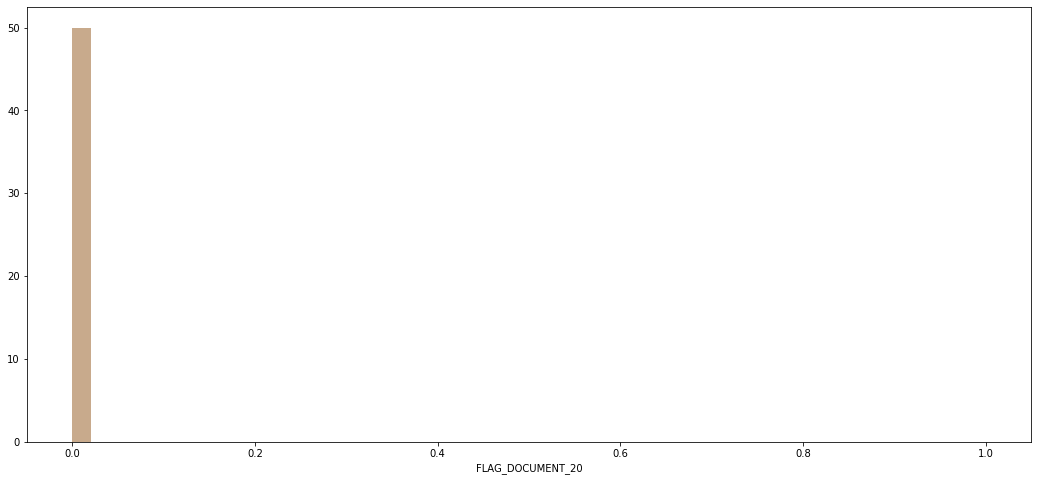

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


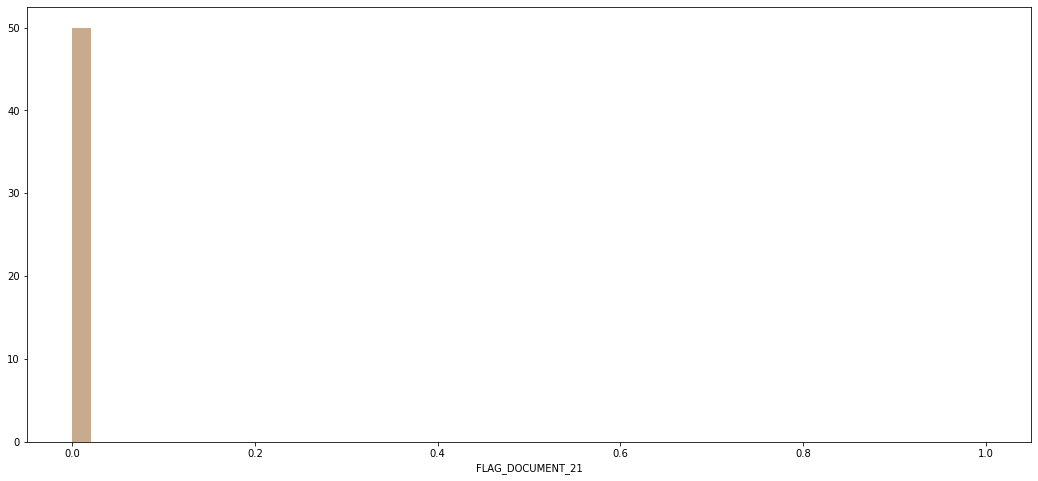

In [409]:
for feature in FLAG_DOCUMENT_GROUP:
    plt.figure(figsize=(18, 8))

    sns.distplot(application[application['TARGET'] == 0][feature], 
                 hist=True)
    sns.distplot(application[application['TARGET'] == 1][feature], 
                 hist=True)
    plt.show()

## WOE

In [48]:
column_statistics

CountNaN  RateNaN%  CountUnique      MinValue  \
SK_ID_CURR                           0         0       307511  1.000020e+05   
TARGET                               0         0            2  0.000000e+00   
NAME_CONTRACT_TYPE                   0         0            2           NaN   
CODE_GENDER                          0         0            3           NaN   
FLAG_OWN_CAR                         0         0            2           NaN   
FLAG_OWN_REALTY                      0         0            2           NaN   
CNT_CHILDREN                         0         0           15  0.000000e+00   
AMT_INCOME_TOTAL                     0         0         2548  2.565000e+04   
AMT_CREDIT                           0         0         5603  4.500000e+04   
AMT_ANNUITY                         12         0        13672  1.615500e+03   
AMT_GOODS_PRICE                    278         0         1002  4.050000e+04   
NAME_TYPE_SUITE                   1292         0            7           NaN   
NAME_INCOME_TYPE                     0         0            8           NaN   
NAME_EDUCATION_TYPE                  0         0            5           NaN   
NAME_FAMILY_STATUS                   0         0            6           NaN   
NAME_HOUSING_TYPE                    0         0            6           NaN   
REGION_POPULATION_RELATIVE           0         0           81  2.900000e-04   
DAYS_BIRTH                           0         0        17460 -2.522900e+04   
DAYS_EMPLOYED                        0         0        12574 -1.791200e+04   
DAYS_REGISTRATION                    0         0        15688 -2.467200e+04   
DAYS_ID_PUBLISH                      0         0         6168 -7.197000e+03   
OWN_CAR_AGE                     202929        65           62  0.000000e+00   
FLAG_MOBIL                           0         0            2  0.000000e+00   
FLAG_EMP_PHONE                       0         0            2  0.000000e+00   
FLAG_WORK_PHONE                      0         0            2  0.000000e+00   
FLAG_CONT_MOBILE                     0         0            2  0.000000e+00   
FLAG_PHONE                           0         0            2  0.000000e+00   
FLAG_EMAIL                           0         0            2  0.000000e+00   
OCCUPATION_TYPE                  96391        31           18           NaN   
CNT_FAM_MEMBERS                      2         0           17  1.000000e+00   
REGION_RATING_CLIENT                 0         0            3  1.000000e+00   
REGION_RATING_CLIENT_W_CITY          0         0            3  1.000000e+00   
WEEKDAY_APPR_PROCESS_START           0         0            7           NaN   
HOUR_APPR_PROCESS_START              0         0           24  0.000000e+00   
REG_REGION_NOT_LIVE_REGION           0         0            2  0.000000e+00   
REG_REGION_NOT_WORK_REGION           0         0            2  0.000000e+00   
LIVE_REGION_NOT_WORK_REGION          0         0            2  0.000000e+00   
REG_CITY_NOT_LIVE_CITY               0         0            2  0.000000e+00   
REG_CITY_NOT_WORK_CITY               0         0            2  0.000000e+00   
LIVE_CITY_NOT_WORK_CITY              0         0            2  0.000000e+00   
ORGANIZATION_TYPE                    0         0           58           NaN   
EXT_SOURCE_1                    173378        56       114584  1.456813e-02   
EXT_SOURCE_2                       660         0       119831  8.173617e-08   
EXT_SOURCE_3                     60965        19          814  5.272652e-04   
APARTMENTS_AVG                  156061        50         2339  0.000000e+00   
BASEMENTAREA_AVG                179943        58         3780  0.000000e+00   
YEARS_BEGINEXPLUATATION_AVG     150007        48          285  0.000000e+00   
YEARS_BUILD_AVG                 204488        66          149  0.000000e+00   
COMMONAREA_AVG                  214865        69         3181  0.000000e+00   
ELEVATORS_AVG                   163891        53          257  0.000000e+00   
E

In [49]:
CATEGORICAL_FEATURES = (column_statistics[column_statistics.CountUnique <= 25].index).tolist() + ['ORGANIZATION_TYPE']
NUMERIC_FEATURES = (column_statistics[column_statistics.CountUnique > 25].index).tolist()
NUMERIC_FEATURES.remove('ORGANIZATION_TYPE')

In [50]:
column_statistics[column_statistics.index.isin(CATEGORICAL_FEATURES)]

CountNaN  RateNaN%  CountUnique  MinValue  \
TARGET                              0         0            2       0.0   
NAME_CONTRACT_TYPE                  0         0            2       NaN   
CODE_GENDER                         0         0            3       NaN   
FLAG_OWN_CAR                        0         0            2       NaN   
FLAG_OWN_REALTY                     0         0            2       NaN   
CNT_CHILDREN                        0         0           15       0.0   
NAME_TYPE_SUITE                  1292         0            7       NaN   
NAME_INCOME_TYPE                    0         0            8       NaN   
NAME_EDUCATION_TYPE                 0         0            5       NaN   
NAME_FAMILY_STATUS                  0         0            6       NaN   
NAME_HOUSING_TYPE                   0         0            6       NaN   
FLAG_MOBIL                          0         0            2       0.0   
FLAG_EMP_PHONE                      0         0            2       0.0   
FLAG_WORK_PHONE                     0         0            2       0.0   
FLAG_CONT_MOBILE                    0         0            2       0.0   
FLAG_PHONE                          0         0            2       0.0   
FLAG_EMAIL                          0         0            2       0.0   
OCCUPATION_TYPE                 96391        31           18       NaN   
CNT_FAM_MEMBERS                     2         0           17       1.0   
REGION_RATING_CLIENT                0         0            3       1.0   
REGION_RATING_CLIENT_W_CITY         0         0            3       1.0   
WEEKDAY_APPR_PROCESS_START          0         0            7       NaN   
HOUR_APPR_PROCESS_START             0         0           24       0.0   
REG_REGION_NOT_LIVE_REGION          0         0            2       0.0   
REG_REGION_NOT_WORK_REGION          0         0            2       0.0   
LIVE_REGION_NOT_WORK_REGION         0         0            2       0.0   
REG_CITY_NOT_LIVE_CITY              0         0            2       0.0   
REG_CITY_NOT_WORK_CITY              0         0            2       0.0   
LIVE_CITY_NOT_WORK_CITY             0         0            2       0.0   
ORGANIZATION_TYPE                   0         0           58       NaN   
FLOORSMAX_MODE                 153020        49           25       0.0   
FLOORSMIN_MODE                 208642        67           25       0.0   
FONDKAPREMONT_MODE             210295        68            4       NaN   
HOUSETYPE_MODE                 154297        50            3       NaN   
WALLSMATERIAL_MODE             156341        50            7       NaN   
EMERGENCYSTATE_MODE            145755        47            2       NaN   
DEF_30_CNT_SOCIAL_CIRCLE         1021         0           10       0.0   
DEF_60_CNT_SOCIAL_CIRCLE         1021         0            9       0.0   
FLAG_DOCUMENT_2                     0         0            2       0.0   
FLAG_DOCUMENT_3                     0         0            2       0.0   
FLAG_DOCUMENT_4                     0         0            2       0.0   
FLAG_DOCUMENT_5                     0         0            2       0.0   
FLAG_DOCUMENT_6                     0         0            2       0.0   
FLAG_DOCUMENT_7                     0         0            2       0.0   
FLAG_DOCUMENT_8                     0         0            2       0.0   
FLAG_DOCUMENT_9                     0         0            2       0.0   
FLAG_DOCUMENT_10                    0         0            2       0.0   
FLAG_DOCUMENT_11                    0         0            2       0.0   
FLAG_DOCUMENT_12                    0         0            2       0.0   
FLAG_DOCUMENT_13                    0         0            2       0.0   
FLAG_DOCUMENT_14                    0         0            2       0.0   
FLAG_DOCUMENT_15                    0         0            2       0.0   
FLAG_DOCUMENT_16                    0         0            2       0.0   
FLAG_DOCUMENT_17                 

In [51]:
column_statistics[column_statistics.index.isin(NUMERIC_FEATURES)]

CountNaN  RateNaN%  CountUnique      MinValue  \
SK_ID_CURR                           0         0       307511  1.000020e+05   
AMT_INCOME_TOTAL                     0         0         2548  2.565000e+04   
AMT_CREDIT                           0         0         5603  4.500000e+04   
AMT_ANNUITY                         12         0        13672  1.615500e+03   
AMT_GOODS_PRICE                    278         0         1002  4.050000e+04   
REGION_POPULATION_RELATIVE           0         0           81  2.900000e-04   
DAYS_BIRTH                           0         0        17460 -2.522900e+04   
DAYS_EMPLOYED                        0         0        12574 -1.791200e+04   
DAYS_REGISTRATION                    0         0        15688 -2.467200e+04   
DAYS_ID_PUBLISH                      0         0         6168 -7.197000e+03   
OWN_CAR_AGE                     202929        65           62  0.000000e+00   
EXT_SOURCE_1                    173378        56       114584  1.456813e-02   
EXT_SOURCE_2                       660         0       119831  8.173617e-08   
EXT_SOURCE_3                     60965        19          814  5.272652e-04   
APARTMENTS_AVG                  156061        50         2339  0.000000e+00   
BASEMENTAREA_AVG                179943        58         3780  0.000000e+00   
YEARS_BEGINEXPLUATATION_AVG     150007        48          285  0.000000e+00   
YEARS_BUILD_AVG                 204488        66          149  0.000000e+00   
COMMONAREA_AVG                  214865        69         3181  0.000000e+00   
ELEVATORS_AVG                   163891        53          257  0.000000e+00   
ENTRANCES_AVG                   154828        50          285  0.000000e+00   
FLOORSMAX_AVG                   153020        49          403  0.000000e+00   
FLOORSMIN_AVG                   208642        67          305  0.000000e+00   
LANDAREA_AVG                    182590        59         3527  0.000000e+00   
LIVINGAPARTMENTS_AVG            210199        68         1868  0.000000e+00   
LIVINGAREA_AVG                  154350        50         5199  0.000000e+00   
NONLIVINGAPARTMENTS_AVG         213514        69          386  0.000000e+00   
NONLIVINGAREA_AVG               169682        55         3290  0.000000e+00   
APARTMENTS_MODE                 156061        50          760  0.000000e+00   
BASEMENTAREA_MODE               179943        58         3841  0.000000e+00   
YEARS_BEGINEXPLUATATION_MODE    150007        48          221  0.000000e+00   
YEARS_BUILD_MODE                204488        66          154  0.000000e+00   
COMMONAREA_MODE                 214865        69         3128  0.000000e+00   
ELEVATORS_MODE                  163891        53           26  0.000000e+00   
ENTRANCES_MODE                  154828        50           30  0.000000e+00   
LANDAREA_MODE                   182590        59         3563  0.000000e+00   
LIVINGAPARTMENTS_MODE           210199        68          736  0.000000e+00   
LIVINGAREA_MODE                 154350        50         5301  0.000000e+00   
NONLIVINGAPARTMENTS_MODE        213514        69          167  0.000000e+00   
NONLIVINGAREA_MODE              169682        55         3327  0.000000e+00   
APARTMENTS_MEDI                 156061        50         1148  0.000000e+00   
BASEMENTAREA_MEDI               179943        58         3772  0.000000e+00   
YEARS_BEGINEXPLUATATION_MEDI    150007        48          245  0.000000e+00   
YEARS_BUILD_MEDI                204488        66          151  0.000000e+00   
COMMONAREA_MEDI                 214865        69         3202  0.000000e+00   
ELEVATORS_MEDI                  163891        53           46  0.000000e+00   
ENTRANCES_MEDI                  154828        50           46  0.000000e+00   
FLOORSMAX_MEDI                  153020        49           49  0.000000e+00   
FLOORSMIN_MEDI                  208642        67           47  0.000000e+00   
LANDAREA_MEDI                   182590        59         3560  0.000000e+00   
L

In [52]:

def woe(df):
    target = df['TARGET']
    columns = df.columns
    woe_table = pd.DataFrame(columns=[
        'woe', 'iv', '%target=1', '%target=0', 'min', 'max', 'count', '%_of_data'])
    main_woe_table = pd.DataFrame(columns=[
        'woe', 'iv', '%target=1', '%target=0', 'min', 'max', 'count', '%_of_data'])
    description = df.describe()
    bad_cols = []
    count_1 = df[df.TARGET == 1]['TARGET'].count()
    count_0 = df[df.TARGET == 0]['TARGET'].count()
    for col in columns:
        print('\n', col, end=' ')
        try:
            if col in CATEGORICAL_FEATURES:
                values = np.unique(df[col])
                iv_total = 0
                if len(values) > 50:
                    bad_cols.append(col)
                    print('\n!!!!!', col)
                    continue
                for v in values:
#                     print(v, end=' ')
                    tmp = df[df[col] == v]
                    count = tmp[col].count()
                    tmp_min = tmp[col].min()
                    tmp_max = tmp[col].max()
                    percent_of_data = count / df.shape[0] * 100
                    percent_of_one = tmp[tmp.TARGET == 1][col].count() / count_1 * 100
                    percent_of_zero = tmp[tmp.TARGET == 0][col].count() / count_0 * 100
                    woe = np.log(percent_of_one / percent_of_zero)
                    iv = (percent_of_one - percent_of_zero) * woe
                    woe_table.loc[col + '_%s' % v] = {
                        'woe': woe, 'iv': iv, '%target=1': percent_of_one, '%target=0': percent_of_zero,
                        'min': tmp_min, 'max': tmp_max, 'count': count, '%_of_data': percent_of_data
                    }
                    iv_total += iv
                tmp = df
                count = tmp[col].count()
                tmp_min = tmp[col].min()
                tmp_max = tmp[col].max()
                iv = iv_total
                woe_table.loc[col] = {
                    'woe': None, 'iv': iv, '%target=1': None, '%target=0': None,
                    'min': tmp_min, 'max': tmp_max, 'count': count, '%_of_data': None
                }   
                main_woe_table.loc[col] = {
                    'woe': None, 'iv': iv, '%target=1': None, '%target=0': None,
                    'min': tmp_min, 'max': tmp_max, 'count': count, '%_of_data': None
                }  
            else:  # col in NUMERIC_FEATURES
                b1, b2, b3 = description.loc['25%', col], description.loc['50%', col], description.loc['75%', col]
                iv_total = 0
                old_left = None
                for b in [(df[col].min(), b1), (b1, b2), (b2, b3), (b3, df[col].max())]:
#                     print(b, end=' ')
                    left, right = b
                    if old_left == left:
                        continue
                    old_left = left
                    tmp = df[(df[col] >= left) & (df[col] < right)]
                    count = tmp[col].count()
                    tmp_min = tmp[col].min()
                    tmp_max = tmp[col].max()
                    percent_of_data = count / df.shape[0] * 100
                    percent_of_one = tmp[tmp.TARGET == 1][col].count() / count_1 * 100
                    percent_of_zero = tmp[tmp.TARGET == 0][col].count() / count_0 * 100
                    woe = np.log(percent_of_one / percent_of_zero)
                    iv = (percent_of_one - percent_of_zero) * woe
                    woe_table.loc[col + '_%s_%s' % (left, right)] = {
                        'woe': woe, 'iv': iv, '%target=1': percent_of_one, '%target=0': percent_of_zero,
                        'min': tmp_min, 'max': tmp_max, 'count': count, '%_of_data': percent_of_data
                    }
                    iv_total += iv
                tmp = df
                count = tmp[col].count()
                tmp_min = tmp[col].min()
                tmp_max = tmp[col].max()
                iv = iv_total
                woe_table.loc[col + '_%s_%s' % (left, right)] = {
                    'woe': None, 'iv': iv, '%target=1': None, '%target=0': None,
                    'min': tmp_min, 'max': tmp_max, 'count': count, '%_of_data': None
                }
                main_woe_table.loc[col + '_%s_%s' % (left, right)] = {
                    'woe': None, 'iv': iv, '%target=1': None, '%target=0': None,
                    'min': tmp_min, 'max': tmp_max, 'count': count, '%_of_data': None
                }
        except:
            bad_cols.append(col)
            print('\n!!!!!', col)
                
    return main_woe_table, woe_table, bad_cols



In [53]:
application[application.TARGET == 1]['TARGET'].count()

24825

In [54]:
main_woe_table, woe_table, bad_cols = woe(application)


 SK_ID_CURR 
 TARGET 

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in double_scalars



 NAME_CONTRACT_TYPE 
 CODE_GENDER 
 FLAG_OWN_CAR 
 FLAG_OWN_REALTY 
 CNT_CHILDREN 
 AMT_INCOME_TOTAL 
 AMT_CREDIT 
 AMT_ANNUITY 
 AMT_GOODS_PRICE 
 NAME_TYPE_SUITE 
!!!!! NAME_TYPE_SUITE

 NAME_INCOME_TYPE 
 NAME_EDUCATION_TYPE 
 NAME_FAMILY_STATUS 
 NAME_HOUSING_TYPE 
 REGION_POPULATION_RELATIVE 
 DAYS_BIRTH 
 DAYS_EMPLOYED 
 DAYS_REGISTRATION 
 DAYS_ID_PUBLISH 
 OWN_CAR_AGE 
 FLAG_MOBIL 
 FLAG_EMP_PHONE 
 FLAG_WORK_PHONE 
 FLAG_CONT_MOBILE 
 FLAG_PHONE 
 FLAG_EMAIL 
 OCCUPATION_TYPE 
!!!!! OCCUPATION_TYPE

 CNT_FAM_MEMBERS 

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in double_scalars



 REGION_RATING_CLIENT 
 REGION_RATING_CLIENT_W_CITY 
 WEEKDAY_APPR_PROCESS_START 
 HOUR_APPR_PROCESS_START 
 REG_REGION_NOT_LIVE_REGION 
 REG_REGION_NOT_WORK_REGION 
 LIVE_REGION_NOT_WORK_REGION 
 REG_CITY_NOT_LIVE_CITY 
 REG_CITY_NOT_WORK_CITY 
 LIVE_CITY_NOT_WORK_CITY 
 ORGANIZATION_TYPE 
!!!!! ORGANIZATION_TYPE

 EXT_SOURCE_1 
 EXT_SOURCE_2 
 EXT_SOURCE_3 
 APARTMENTS_AVG 
 BASEMENTAREA_AVG 
 YEARS_BEGINEXPLUATATION_AVG 
 YEARS_BUILD_AVG 
 COMMONAREA_AVG 
 ELEVATORS_AVG 

/Users/juliasemavina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: invalid value encountered in double_scalars



 ENTRANCES_AVG 
 FLOORSMAX_AVG 
 FLOORSMIN_AVG 
 LANDAREA_AVG 
 LIVINGAPARTMENTS_AVG 
 LIVINGAREA_AVG 
 NONLIVINGAPARTMENTS_AVG 
 NONLIVINGAREA_AVG 
 APARTMENTS_MODE 
 BASEMENTAREA_MODE 
 YEARS_BEGINEXPLUATATION_MODE 
 YEARS_BUILD_MODE 
 COMMONAREA_MODE 
 ELEVATORS_MODE 
 ENTRANCES_MODE 
 FLOORSMAX_MODE 
!!!!! FLOORSMAX_MODE

 FLOORSMIN_MODE 
!!!!! FLOORSMIN_MODE

 LANDAREA_MODE 
 LIVINGAPARTMENTS_MODE 
 LIVINGAREA_MODE 
 NONLIVINGAPARTMENTS_MODE 
 NONLIVINGAREA_MODE 
 APARTMENTS_MEDI 
 BASEMENTAREA_MEDI 
 YEARS_BEGINEXPLUATATION_MEDI 
 YEARS_BUILD_MEDI 
 COMMONAREA_MEDI 
 ELEVATORS_MEDI 
 ENTRANCES_MEDI 
 FLOORSMAX_MEDI 
 FLOORSMIN_MEDI 
 LANDAREA_MEDI 
 LIVINGAPARTMENTS_MEDI 
 LIVINGAREA_MEDI 
 NONLIVINGAPARTMENTS_MEDI 
 NONLIVINGAREA_MEDI 
 FONDKAPREMONT_MODE 
!!!!! FONDKAPREMONT_MODE

 HOUSETYPE_MODE 
!!!!! HOUSETYPE_MODE

 TOTALAREA_MODE 
 WALLSMATERIAL_MODE 
!!!!! WALLSMATERIAL_MODE

 EMERGENCYSTATE_MODE 
!!!!! EMERGENCYSTATE_MODE

 OBS_30_CNT_SOCIAL_CIRCLE 
 DEF_30_CNT_SOCIAL_C

In [55]:
main_woe_table

woe         iv %target=1  \
SK_ID_CURR_367142.5_456255                           NaN   0.027894       NaN   
TARGET                                               NaN        inf       NaN   
NAME_CONTRACT_TYPE                                  None   1.503877      None   
CODE_GENDER                                         None        inf      None   
FLAG_OWN_CAR                                        None   0.659655      None   
FLAG_OWN_REALTY                                     None   0.050545      None   
CNT_CHILDREN                                         NaN        inf       NaN   
AMT_INCOME_TOTAL_202500.0_117000000.0                NaN   0.695619       NaN   
AMT_CREDIT_808650.0_4050000.0                        NaN   2.987689       NaN   
AMT_ANNUITY_34596.0_258025.5                         NaN   1.577401       NaN   
AMT_GOODS_PRICE_679500.0_4050000.0                   NaN   4.542897       NaN   
NAME_INCOME_TYPE                                    None        inf      None   
NAME_EDUCATION_TYPE                                 None   5.083554      None   
NAME_FAMILY_STATUS                                  None        inf      None   
NAME_HOUSING_TYPE                                   None   1.573019      None   
REGION_POPULATION_RELATIVE_0.028663_0.072508         NaN   1.010692       NaN   
DAYS_BIRTH_-12413.0_-7489                            NaN   7.929794       NaN   
DAYS_EMPLOYED_-289.0_365243                          NaN   7.298354       NaN   
DAYS_REGISTRATION_-2010.0_0.0                        NaN   2.266590       NaN   
DAYS_ID_PUBLISH_-1720.0_0                            NaN   3.686023       NaN   
OWN_CAR_AGE_15.0_91.0                                NaN   1.920180       NaN   
FLAG_MOBIL                                           NaN        inf       NaN   
FLAG_EMP_PHONE                                       NaN   3.290713       NaN   
FLAG_WORK_PHONE                                      NaN   1.032857       NaN   
FLAG_CONT_MOBILE                                     NaN   0.000187       NaN   
FLAG_PHONE                                           NaN   0.794171       NaN   
FLAG_EMAIL                                           NaN   0.004210       NaN   
CNT_FAM_MEMBERS                                      NaN        NaN       NaN   
REGION_RATING_CLIENT                                 NaN   4.831690       NaN   
REGION_RATING_CLIENT_W_CITY                          NaN   5.120150       NaN   
WEEKDAY_APPR_PROCESS_START                          None   0.067669      None   
HOUR_APPR_PROCESS_START                              NaN   1.136985       NaN   
REG_REGION_NOT_LIVE_REGION                           NaN   0.039302       NaN   
REG_REGION_NOT_WORK_REGION                           NaN   0.062277       NaN   
LIVE_REGION_NOT_WORK_REGION                          NaN   0.010502       NaN   
REG_CITY_NOT_LIVE_CITY                               NaN   2.229869       NaN   
REG_CITY_NOT_WORK_CITY                               NaN   3.220724       NaN   
LIVE_CITY_NOT_WORK_CITY                              NaN   1.322838       NaN   
EXT_SOURCE_1_0.6750525982300696_0.962692770561306    NaN  13.143753       NaN   
EXT_SOURCE_2_0.6636170897493769_0.8549996664047012   NaN  27.034921       NaN   
EXT_SOURCE_3_0.6690566947824041_0.8960095494948396   NaN  28.664501       NaN   
APARTMENTS_AVG_0.1485_1.0                            NaN   2.086698       NaN   
BASEMENTAREA_AVG_0.1122_1.0                          NaN   1.419872       NaN   
YEARS_BEGINEXPLUATATION_AVG_0.9866_1.0               NaN   1.626165       NaN   
YEARS_BUILD_AVG_0.8232_1.0                           NaN   1.208283       NaN   
COMMONAREA_AVG_0.0515_1.0                            NaN   0.926676       NaN   
ELEVATORS_AVG_0.12_1.0                               NaN        NaN       NaN   
ENTRANCES_AVG_0.2069_1.0                             NaN   1.556479       NaN   
FLOORSMAX_AVG_0.3333_1.0                             NaN        NaN       NaN   
FLO

По iv бесполезными признаками являются:

In [56]:
main_woe_table[main_woe_table['iv'] < 0.02]

woe        iv %target=1 %target=0 min max  \
FLAG_CONT_MOBILE             NaN  0.000187       NaN       NaN   0   1   
FLAG_EMAIL                   NaN  0.004210       NaN       NaN   0   1   
LIVE_REGION_NOT_WORK_REGION  NaN  0.010502       NaN       NaN   0   1   
FLAG_DOCUMENT_5              NaN  0.000135       NaN       NaN   0   1   
FLAG_DOCUMENT_7              NaN  0.003819       NaN       NaN   0   1   
FLAG_DOCUMENT_19             NaN  0.002727       NaN       NaN   0   1   
FLAG_DOCUMENT_20             NaN  0.000062       NaN       NaN   0   1   
FLAG_DOCUMENT_21             NaN  0.014527       NaN       NaN   0   1   

                                count %_of_data  
FLAG_CONT_MOBILE             307511.0       NaN  
FLAG_EMAIL                   307511.0       NaN  
LIVE_REGION_NOT_WORK_REGION  307511.0       NaN  
FLAG_DOCUMENT_5              307511.0       NaN  
FLAG_DOCUMENT_7              307511.0       NaN  
FLAG_DOCUMENT_19             307511.0       NaN  
FLAG_DOCUMENT_20             307511.0       NaN  
FLAG_DOCUMENT_21             307511.0       NaN

слабые:

In [57]:
main_woe_table[(main_woe_table['iv'] >= 0.02) & (main_woe_table['iv'] < 0.1)]

woe        iv %target=1 %target=0     min  \
SK_ID_CURR_367142.5_456255   NaN  0.027894       NaN       NaN  100002   
FLAG_OWN_REALTY             None  0.050545      None      None       N   
WEEKDAY_APPR_PROCESS_START  None  0.067669      None      None  FRIDAY   
REG_REGION_NOT_LIVE_REGION   NaN  0.039302       NaN       NaN       0   
REG_REGION_NOT_WORK_REGION   NaN  0.062277       NaN       NaN       0   
FLAG_DOCUMENT_2              NaN  0.020967       NaN       NaN       0   
FLAG_DOCUMENT_8              NaN  0.090633       NaN       NaN       0   
FLAG_DOCUMENT_9              NaN  0.028773       NaN       NaN       0   
FLAG_DOCUMENT_11             NaN  0.027059       NaN       NaN       0   
FLAG_DOCUMENT_15             NaN  0.088341       NaN       NaN       0   
FLAG_DOCUMENT_17             NaN  0.025438       NaN       NaN       0   
FLAG_DOCUMENT_18             NaN  0.099585       NaN       NaN       0   

                                  max     count %_of_data  
SK_ID_CURR_367142.5_456255     456255  307511.0       NaN  
FLAG_OWN_REALTY                     Y  307511.0      None  
WEEKDAY_APPR_PROCESS_START  WEDNESDAY  307511.0      None  
REG_REGION_NOT_LIVE_REGION          1  307511.0       NaN  
REG_REGION_NOT_WORK_REGION          1  307511.0       NaN  
FLAG_DOCUMENT_2                     1  307511.0       NaN  
FLAG_DOCUMENT_8                     1  307511.0       NaN  
FLAG_DOCUMENT_9                     1  307511.0       NaN  
FLAG_DOCUMENT_11                    1  307511.0       NaN  
FLAG_DOCUMENT_15                    1  307511.0       NaN  
FLAG_DOCUMENT_17                    1  307511.0       NaN  
FLAG_DOCUMENT_18                    1  307511.0       NaN

средние:

In [58]:
main_woe_table[(main_woe_table['iv'] >= 0.1) & (main_woe_table['iv'] < 0.3)]

woe        iv %target=1 %target=0 min max     count  \
FLAG_DOCUMENT_13  NaN  0.284563       NaN       NaN   0   1  307511.0   
FLAG_DOCUMENT_14  NaN  0.176724       NaN       NaN   0   1  307511.0   
FLAG_DOCUMENT_16  NaN  0.225995       NaN       NaN   0   1  307511.0   

                 %_of_data  
FLAG_DOCUMENT_13       NaN  
FLAG_DOCUMENT_14       NaN  
FLAG_DOCUMENT_16       NaN

сильные

In [59]:
main_woe_table[(main_woe_table['iv'] >= 0.3) & (main_woe_table['iv'] < 0.5)]

Empty DataFrame
Columns: [woe, iv, %target=1, %target=0, min, max, count, %_of_data]
Index: []

очень сильные

In [60]:
main_woe_table[main_woe_table['iv'] >= 0.5]

woe         iv %target=1  \
TARGET                                               NaN        inf       NaN   
NAME_CONTRACT_TYPE                                  None   1.503877      None   
CODE_GENDER                                         None        inf      None   
FLAG_OWN_CAR                                        None   0.659655      None   
CNT_CHILDREN                                         NaN        inf       NaN   
AMT_INCOME_TOTAL_202500.0_117000000.0                NaN   0.695619       NaN   
AMT_CREDIT_808650.0_4050000.0                        NaN   2.987689       NaN   
AMT_ANNUITY_34596.0_258025.5                         NaN   1.577401       NaN   
AMT_GOODS_PRICE_679500.0_4050000.0                   NaN   4.542897       NaN   
NAME_INCOME_TYPE                                    None        inf      None   
NAME_EDUCATION_TYPE                                 None   5.083554      None   
NAME_FAMILY_STATUS                                  None        inf      None   
NAME_HOUSING_TYPE                                   None   1.573019      None   
REGION_POPULATION_RELATIVE_0.028663_0.072508         NaN   1.010692       NaN   
DAYS_BIRTH_-12413.0_-7489                            NaN   7.929794       NaN   
DAYS_EMPLOYED_-289.0_365243                          NaN   7.298354       NaN   
DAYS_REGISTRATION_-2010.0_0.0                        NaN   2.266590       NaN   
DAYS_ID_PUBLISH_-1720.0_0                            NaN   3.686023       NaN   
OWN_CAR_AGE_15.0_91.0                                NaN   1.920180       NaN   
FLAG_MOBIL                                           NaN        inf       NaN   
FLAG_EMP_PHONE                                       NaN   3.290713       NaN   
FLAG_WORK_PHONE                                      NaN   1.032857       NaN   
FLAG_PHONE                                           NaN   0.794171       NaN   
REGION_RATING_CLIENT                                 NaN   4.831690       NaN   
REGION_RATING_CLIENT_W_CITY                          NaN   5.120150       NaN   
HOUR_APPR_PROCESS_START                              NaN   1.136985       NaN   
REG_CITY_NOT_LIVE_CITY                               NaN   2.229869       NaN   
REG_CITY_NOT_WORK_CITY                               NaN   3.220724       NaN   
LIVE_CITY_NOT_WORK_CITY                              NaN   1.322838       NaN   
EXT_SOURCE_1_0.6750525982300696_0.962692770561306    NaN  13.143753       NaN   
EXT_SOURCE_2_0.6636170897493769_0.8549996664047012   NaN  27.034921       NaN   
EXT_SOURCE_3_0.6690566947824041_0.8960095494948396   NaN  28.664501       NaN   
APARTMENTS_AVG_0.1485_1.0                            NaN   2.086698       NaN   
BASEMENTAREA_AVG_0.1122_1.0                          NaN   1.419872       NaN   
YEARS_BEGINEXPLUATATION_AVG_0.9866_1.0               NaN   1.626165       NaN   
YEARS_BUILD_AVG_0.8232_1.0                           NaN   1.208283       NaN   
COMMONAREA_AVG_0.0515_1.0                            NaN   0.926676       NaN   
ENTRANCES_AVG_0.2069_1.0                             NaN   1.556479       NaN   
FLOORSMIN_AVG_0.375_1.0                              NaN   1.439743       NaN   
LANDAREA_AVG_0.0856_1.0                              NaN   1.112620       NaN   
LIVINGAPARTMENTS_AVG_0.121_1.0                       NaN   1.294915       NaN   
LIVINGAREA_AVG_0.1299_1.0                            NaN   2.277717       NaN   
APARTMENTS_MODE_0.1439_1.0                           NaN   1.990312       NaN   
BASEMENTAREA_MODE_0.1124_1.0                         NaN   1.337074       NaN   
YEARS_BEGINEXPLUATATION_MODE_0.9866_1.0              NaN   1.624350       NaN   
YEARS_BUILD_MODE_0.8236_1.0                          NaN   1.192232       NaN   
COMMONAREA_MODE_0.049_1.0                            NaN   0.903040       NaN   
ENTRANCES_MODE_0.2069_1.0                            NaN   1.514132       NaN   
LANDAREA_MODE_0.0841_1.0                             NaN   1.096659       NaN   
LIV

In [61]:
woe_table

woe           iv  \
SK_ID_CURR_100002_189145.5                          -0.00602197   0.00090432   
SK_ID_CURR_189145.5_278202.0                          0.0282018    0.0201199   
SK_ID_CURR_278202.0_367142.5                        -0.00813783   0.00164997   
SK_ID_CURR_367142.5_456255                                  woe           iv   
TARGET_0                                                   -inf          inf   
TARGET_1                                                    inf          inf   
TARGET                                                      NaN          inf   
NAME_CONTRACT_TYPE_Cash loans                         0.0362359     0.120622   
NAME_CONTRACT_TYPE_Revolving loans                    -0.415543      1.38326   
NAME_CONTRACT_TYPE                                         None      1.50388   
CODE_GENDER_F                                         -0.154307      1.46957   
CODE_GENDER_M                                          0.250931      2.39014   
CODE_GENDER_XNA                                            -inf          inf   
CODE_GENDER                                                None          inf   
FLAG_OWN_CAR_N                                        0.0562419     0.213717   
FLAG_OWN_CAR_Y                                        -0.117353     0.445938   
FLAG_OWN_CAR                                               None     0.659655   
FLAG_OWN_REALTY_N                                     0.0334896    0.0348421   
FLAG_OWN_REALTY_Y                                    -0.0150934     0.015703   
FLAG_OWN_REALTY                                            None    0.0505452   
CNT_CHILDREN_0                                       -0.0496779     0.169283   
CNT_CHILDREN_1                                         0.109483     0.249439   
CNT_CHILDREN_2                                        0.0844019    0.0641994   
CNT_CHILDREN_3                                          0.19362    0.0491505   
CNT_CHILDREN_4                                         0.515563    0.0460133   
CNT_CHILDREN_5                                        0.0345903  3.31609e-05   
CNT_CHILDREN_6                                          1.51619    0.0285999   
CNT_CHILDREN_7                                             -inf          inf   
CNT_CHILDREN_8                                             -inf          inf   
CNT_CHILDREN_9                                              inf          inf   
CNT_CHILDREN_10                                            -inf          inf   
CNT_CHILDREN_11                                             inf          inf   
CNT_CHILDREN_12                                            -inf          inf   
CNT_CHILDREN_14                                            -inf          inf   
CNT_CHILDREN_19                                            -inf          inf   
CNT_CHILDREN                                                NaN          inf   
AMT_INCOME_TOTAL_25650.0_112500.0                     0.0206614   0.00974034   
AMT_INCOME_TOTAL_112500.0_147150.0                    0.0714651     0.144089   
AMT_INCOME_TOTAL_147150.0_202500.0                    0.0513794    0.0577863   
AMT_INCOME_TOTAL_202500.0_117000000.0                       NaN     0.695619   
AMT_CREDIT_45000.0_270000.0                           -0.101381     0.228022   
AMT_CREDIT_270000.0_513531.0                           0.165157     0.784129   
AMT_CREDIT_513531.0_808650.0                           0.135594     0.467226   
AMT_CREDIT_808650.0_4050000.0                               NaN      2.98769   
AMT_ANNUITY_1615.5_16524.0                             -0.14532     0.496428   
AMT_ANNUITY_16524.0_24903.0                           0.0883233     0.202263   
AMT_ANNUITY_24903.0_34596.0                            0.145716     0.564063   
AMT_ANNUITY_34596.0_258025.5                                NaN       1.5774   
AMT_GOODS_PRICE_40500.0_238500.0                     -0.0103098   0.00258743   
AMT_GOODS_PRICE_238500.0_450000.0                      0.162

In [62]:
bad_cols

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'ORGANIZATION_TYPE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [63]:
get_df_general_stats(application[bad_cols])

CountNaN  RateNaN%  CountUnique  MinValue  \
NAME_TYPE_SUITE                 1292         0            7       NaN   
OCCUPATION_TYPE                96391        31           18       NaN   
ORGANIZATION_TYPE                  0         0           58       NaN   
FLOORSMAX_MODE                153020        49           25       0.0   
FLOORSMIN_MODE                208642        67           25       0.0   
FONDKAPREMONT_MODE            210295        68            4       NaN   
HOUSETYPE_MODE                154297        50            3       NaN   
WALLSMATERIAL_MODE            156341        50            7       NaN   
EMERGENCYSTATE_MODE           145755        47            2       NaN   
DEF_30_CNT_SOCIAL_CIRCLE        1021         0           10       0.0   
DEF_60_CNT_SOCIAL_CIRCLE        1021         0            9       0.0   
AMT_REQ_CREDIT_BUREAU_HOUR     41519        13            5       0.0   
AMT_REQ_CREDIT_BUREAU_DAY      41519        13            9       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK     41519        13            9       0.0   
AMT_REQ_CREDIT_BUREAU_MON      41519        13           24       0.0   
AMT_REQ_CREDIT_BUREAU_QRT      41519        13           11       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR     41519        13           25       0.0   

                            MaxValue      Mean       Std  Median  
NAME_TYPE_SUITE                  NaN       NaN       NaN     NaN  
OCCUPATION_TYPE                  NaN       NaN       NaN     NaN  
ORGANIZATION_TYPE                NaN       NaN       NaN     NaN  
FLOORSMAX_MODE                   1.0  0.222315  0.143709  0.1667  
FLOORSMIN_MODE                   1.0  0.228058  0.161160  0.2083  
FONDKAPREMONT_MODE               NaN       NaN       NaN     NaN  
HOUSETYPE_MODE                   NaN       NaN       NaN     NaN  
WALLSMATERIAL_MODE               NaN       NaN       NaN     NaN  
EMERGENCYSTATE_MODE              NaN       NaN       NaN     NaN  
DEF_30_CNT_SOCIAL_CIRCLE        34.0  0.143421  0.446698  0.0000  
DEF_60_CNT_SOCIAL_CIRCLE        24.0  0.100049  0.362291  0.0000  
AMT_REQ_CREDIT_BUREAU_HOUR       4.0  0.006402  0.083849  0.0000  
AMT_REQ_CREDIT_BUREAU_DAY        9.0  0.007000  0.110757  0.0000  
AMT_REQ_CREDIT_BUREAU_WEEK       8.0  0.034362  0.204685  0.0000  
AMT_REQ_CREDIT_BUREAU_MON       27.0  0.267395  0.916002  0.0000  
AMT_REQ_CREDIT_BUREAU_QRT      261.0  0.265474  0.794056  0.0000  
AMT_REQ_CREDIT_BUREAU_YEAR      25.0  1.899974  1.869295  1.0000